# Statystyczna analiza danych

In [ ]:
# @title
from IPython.display import display, HTML

pretty_header = """
<div style="
    margin-top: 40px;
    padding: 20px 10px;
    text-align: center;
    font-family: 'Segoe UI', sans-serif;
    color: #2c3e50;
">

    <h1 style="
        font-size: 28px;
        margin-bottom: 10px;
        background: linear-gradient(90deg, #1d70b8, #00a8e8);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        font-weight: 700;
    ">
        Statystyczna Analiza Danych
    </h1>

    <h2 style="
        font-size: 20px;
        font-weight: 400;
        margin-top: 0;
        color: #555;
    ">
        Kierunek: Sztuczna Inteligencja i Automatyzacja Procesów Biznesowych w ujęciu technicznym
    </h2>

    <p style="
        font-size: 16px;
        margin-top: 15px;
    ">
        Projekt słuchaczy studiów podyplomowych
    </p>

    <p style="
        font-size: 16px;
        font-style: italic;
        margin-bottom: 0;
    ">
        Autorzy (kolejność alfabetyczna):
    </p>
    <p style="font-size: 16px; font-weight: 500;">
        Kinga Kaza, Krzysztof Lachs, Joanna Mackiewicz
    </p>
</div>
"""

display(HTML(pretty_header))


<h1 style="text-align: center;">📚 Spis Treści</h1>

<div style="display: flex; justify-content: center;">
  <div style="text-align: left; background-color: #f9f9f9; padding: 20px 30px; border-radius: 10px; border: 1px solid #ddd; width: fit-content; font-size: 16px; line-height: 1.8;">

<ol>
  <li><a href="#wprowadzenie">Wprowadzenie</a></li>
  <li><a href="#import-bibliotek-i-danych">Import bibliotek i danych</a></li>
  <li><a href="#diagnostyka-danych">Diagnostyka danych</a></li>
  <li><a href="#czyszczenie-i-porządkowanie-danych">Czyszczenie i porządkowanie danych</a></li>
  <li><a href="#wizualizacje">Wizualizacje</a></li>
  <li><a href="#analiza-opisowa">Analiza opisowa</a></li>
  <li><a href="#wnioski">Wnioski</a></li>
</ol>

  </div>
</div>

<p style="text-align: center; font-size: 14px; color: gray;">⬆️ Kliknij linki, aby przejść do wybranej sekcji</p>


## Wprowadzenie



> **Temat projektu:**
> Analiza zbioru danych dotyczących poziomu szczęścia na świecie z wykorzystaniem raportu **World Happiness Report**, dostępnego na platformie [Kaggle](https://www.kaggle.com).

<p align="center">
  <img src="world_happiness_report.png" width="450"/>
</p>


---
<div align="center">


 **🧾 Opis zbioru danych**

Zbiór danych zawiera informacje o poziomie szczęścia w różnych krajach oraz o czynnikach, które mogą na nie wpływać, takich jak:

💰 **PKB na mieszkańca**  
🤝 **Wsparcie społeczne**  
🧬 **Oczekiwana długość życia w zdrowiu**  
🕊️ **Poczucie wolności w podejmowaniu decyzji życiowych**  
🎁 **Hojność**  
🧑‍⚖️ **Postrzeganie korupcji**

Raport opiera się na danych z **Gallup World Poll** i na tzw. *drabinie Cantrila*, w której respondenci oceniają swoje życie w skali od 0 do 10:

`0` → najgorsze możliwe życie  
`10` → najlepsze możliwe życie

---

**🧪 Metodologia raportu**

Wartości te są porównywane z fikcyjnym krajem **Dystopia**, który reprezentuje najniższe możliwe wyniki w każdej kategorii. Służy on jako punkt odniesienia i nie wpływa bezpośrednio na ocenę danego kraju.

---

**🎯 Cele analizy**
W ramach projektu przeprowadzimy:

📊 **Analizę statystyczną**
📈 **Wizualizacje danych**
🌐 **Porównania regionalne**

Rozważymy kontenkst **pandemii COVID-19** na poziom szczęścia na świecie.

---

**⚙️ Przygotowanie środowiska**

Na początku:

Zainstalowaliśmy bibliotekę **`kagglehub`** – do pobierania danych z Kaggle.  
Wykorzystaliśmy także znane z wykładów biblioteki do analizy danych i wizualizacji w Pythonie:
    `pandas`, `numpy`  
    `matplotlib`, `seaborn`  
    `plotly`, `missingno`

---

> 🔎 Celem tego projektu jest **lepsze zrozumienie czynników wpływających na dobrostan ludzi na całym świecie**, przy pomocy danych i metod analizy statystycznej.

Badaną zmienną zależną jest `Happiness Score`.

---
</div>

**Ramka techniczna: Szczegółowe informacje o predyktorach uwzględnionych w naszej analizie**

- PKB per capita(PPP, stałe dolary z 2017 r.) pochodzi z bazy WDI Banku Światowego (16.12.2021). Dane za 2021 r. uzupełniono prognozami OECD lub Banku Światowego, skorygowanymi o przyrost ludności. W analizie zastosowano logarytm PKB per capita.
- Oczekiwana długość życia w zdrowiu została oszacowana na podstawie danych WHO dla lat 2000, 2010, 2015, 2019, z zastosowaniem interpolacji i ekstrapolacji.
- Wsparcie społeczne: średnia odpowiedzi (0/1) na pytanie GWP o możliwość uzyskania pomocy od bliskich w razie potrzeby.
- Swoboda wyboru średnia odpowiedzi (0/1) na pytanie GWP o zadowolenie z możliwości decydowania o własnym życiu.
- Hojność: reszta regresji odpowiedzi na pytanie o darowiznę w ostatnim miesiącu na log PKB per capita.
- Postrzeganie korupcji: średnia odpowiedzi (0/1) na pytania o korupcję w rządzie i biznesie. Przy braku danych rządowych – wykorzystano dane dot. biznesu.
---
**W surowych danych World Happiness Report znajdowały się kolumny oznaczone jako „explained by:”, np.:**

- Explained by: GDP per capita

- Explained by: Social support

- Explained by: Healthy life expectancy

- Explained by: Freedom to make life choices

- Explained by: Generosity

- Explained by: Perceptions of corruption

- Dystopia + residual



---
``Co oznaczają te dane?``

Kolumny „explained by” przedstawiają statystyczną dekompozycję ogólnego wyniku szczęścia (Happiness Score) – czyli wskazują, jak dużą część tego wyniku można przypisać konkretnym czynnikom w modelu regresji liniowej użytym przez autorów raportu. Te wartości nie są bezpośrednio mierzone ani deklarowane przez respondentów – są one wynikiem modelowania statystycznego i mogą różnić się w zależności od przyjętych założeń lub metod regresji.
Dlaczego nie wykorzystaliśmy tych danych w naszej analizie?
Redundancja informacji:
Te kolumny stanowią przekształcenie już dostępnych danych (np. GDP per capita, Social support itd.) i nie wnoszą nowych zmiennych – tylko wskazują, w jakim stopniu dana cecha tłumaczy wynik Happiness Score.

- ``Brak niezależności``:
Wartości „explained by” są współzależne – suma wszystkich składników + „Dystopia + residual” ≈ Happiness Score. Uwzględnienie ich w analizie prowadziłoby do błędnego wniosku o niezależności tych zmiennych.

- ``Zmienność metodologiczna``:
Metody obliczania wkładów „explained by” mogą różnić się pomiędzy edycjami raportu – co utrudnia porównania między latami i może prowadzić do niejednoznacznych interpretacji.

- ``Brak pełnej transparentności modeli``:
Dokładne założenia statystyczne leżące u podstaw tych składników nie są w pełni udostępnione – dlatego trudno je interpretować bez znajomości wewnętrznej metodologii zespołu WHR.

- ``Wniosek``:
Zamiast używać pochodnych wartości „explained by”, w naszej analizie skupiliśmy się na rzeczywistych wskaźnikach społeczno-gospodarczych (np. surowych danych GDP per capita, Social support, Generosity itp.), ponieważ są bardziej przejrzyste i bezpośrednie, umożliwiają porównania między latami i regionami, nadają się do analizy korelacji, PCA i standaryzacji.

</p>







---

---

## Import bibliotek i danych

Poniższy kod stanowi wprowadzenie do analizy danych opartych na raporcie World Happiness Report. Najpierw importowane są wszystkie niezbędne biblioteki do analizy danych, wizualizacji oraz statystyki — takie jak ``pandas, numpy, matplotlib, seaborn, plotly, scipy i inne``. Następnie, za pomocą biblioteki kagglehub, pobierany jest zestaw danych z platformy ``Kaggle`` — konkretnie zbiór ``"World Happiness Report"``, który zawiera informacje na temat poziomu szczęścia w różnych krajach świata. Ścieżka do pobranych plików jest wyświetlana w celu dalszego ich załadowania i przetwarzania.

In [ ]:
#import wszystkich potrzebnych bibliotek
import pandas as pd                         # praca z danymi tabelarycznymi (DataFrame)
import numpy as np                          # obliczenia matematyczne i tablice
import matplotlib.pyplot as plt             # tworzenie wykresów
import seaborn as sns                       # atrakcyjne wizualizacje
import scipy.stats as stats                 # testy statystyczne
import math                                 # funkcje matematyczne
import kagglehub                            # pobieranie datasetu z Kaggle (jeśli zainstalowany)
import plotly.express as px                 # do tworzenia interaktywnych wykresów, która jest częścią większego pakietu plotly
from matplotlib.ticker import MaxNLocator   # wymuszanie całkowitych wartości na osiach
from scipy.stats.mstats import winsorize    # winsoryzacja danych (ograniczanie wartości ekstremalnych)

import warnings
warnings.filterwarnings('ignore')


path = kagglehub.dataset_download("mathurinache/world-happiness-report") # Zaimportowanie ramek danych z Kaggle
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/world-happiness-report


---

---

## Diagnostyka danych

Niniejsza rozdział przedstawia wstępne rozpoznanie charakterystyk zbiorów danych dla Happiness World Index z lat 2015-2022.
- Wstępne grupowanie danych
- Macierz braków danych dla wszystich ramek

---

### Wstępne grupowanie danych.

W celu przeprowadzenia analizy szczęścia na świecie w latach 2015 - 2022 wczytamy ramki danych, a nastepnie je połączymy i umieścimy ją w jednym slowniku.. Następnie inizjujemy utworzenie zakresu lat od 2015 do 2022 (2023 jest wykluczone, bo range działa do "n-1").
Dla każdego roku w zakresie:
- Wczytujemy plik CSV z danymi dla danego roku i zapisujemy go w słowniku 'dfs'
- Kluczem będzie rok, a wartością wczytana ramka danych

In [ ]:

years = range(2015, 2023)       # Tworzymy zakres lat od 2015 do 2022 (2023 jest wykluczone, bo range działa do "n-1")
dfs = {}                        # Inicjalizujemy pusty słownik, w którym będą przechowywane ramki danych z poszczególnych lat

for year in years:
    dfs[year] = pd.read_csv(f"{path}/{year}.csv")


W ramach wstępnej diagnostyki danych postanowilismy przejrzeć dane z każdego zbioru licząc od 2015 do 2022 roku:
 - ogólny podgląd danych
 - statytyki opisowe,
 - liczbe brakujących wartości,
 - liczbe unikalne wartosci, typy danych,
 - typy danych
 - liczba duplikatów
 - kształt danych.

In [ ]:
from IPython.display import display


lata = sorted(dfs.keys())                                                                           # Zakładamy, że masz dfs jako słownik {rok: df}


print("Poniżej znajduje się PODGLĄD DANYCH (head) dla wszystkich zbiorów danych:")                  # Podgląd danych (head)
for rok in lata:
    print(f"\n📅 ROK {rok}")
    display(dfs[rok].head())


print("\n Poniżej znajdują się STATYSTYKI OPISOWE (describe) dla wszystkich zbiorów danych:")       # Statystyki opisowe
for rok in lata:
    print(f"\n📅 ROK {rok}")
    display(dfs[rok].describe())


print("\n Poniżej znajdują się BRAKUJĄCE WARTOŚCI (nulls per column) dla wszystkich zbiorów danych:") # Liczba brakujących wartości
for rok in lata:
    print(f"\n📅 ROK {rok}")
    display(dfs[rok].isnull().sum())


print("\n Poniżej znajduje się LICZBA UNIKALNYCH WARTOŚCI (nunique) dla wszystkich zbiorów danych:") # Liczba unikalnych wartości
for rok in lata:
    print(f"\n📅 ROK {rok}")
    display(dfs[rok].nunique())


print("\n Poniżej znajdują się TYPY DANYCH (dtypes) dla wszystkich zbiorów danych:")                # Typy danych
for rok in lata:
    print(f"\n📅 ROK {rok}")
    print(dfs[rok].dtypes)


print("\n Poniżej znajdują się DUPLIKATY dla wszystkich zbiorów danych:")                           # Liczba duplikatów
for rok in lata:
    print(f"\n📅 ROK {rok}: {dfs[rok].duplicated().sum()} duplikatów")


print("\n Poniżej znajduje się KSZTAŁT DANYCH (shape) dla wszystkich zbiorów danych:")              # Kształt danych
for rok in lata:
    print(f"📅 ROK {rok}: {dfs[rok].shape[0]} wierszy, {dfs[rok].shape[1]} kolumn")

Poniżej znajduje się PODGLĄD DANYCH (head) dla wszystkich zbiorów danych:

📅 ROK 2015


Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176


📅 ROK 2016


Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596


📅 ROK 2017


Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182


📅 ROK 2018


Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357


📅 ROK 2019


Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298


📅 ROK 2020


Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559        0.974670                73.000000   
4              11.087804        0.952487                73.200783   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.949172   -0.059482                   0.195445   
1                      0.951444    0.066202                   0.168489   
2                      0.921337    0.105911                   0.303728   
3                      0.948892    0.246944                   0.711710   
4                      0.955750    0.134533                   0.263218   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                  1.972317                          1.285190   
1                  1.972317                          1.326949   
2                  1.972317                          1.390774   
3                  1.972317                          1.326502   
4                  1.972317                          1.424207   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                      1.499526                               0.961271   
1                      1.503449                               0.979333   
2                      1.472403                               1.040533   
3                      1.547567                               1.000843   
4                      1.495173                               1.008072   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.662317                  0.159670   
1                                    0.665040                  0.242793   
2                                    0.628954                  0.269056   
3                                    0.661981                  0.362330   
4                                    0.670201                  0.287985   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                 0.477857             2.762835  
1                                 0.495260             2.432741  
2                                 0.407946             2.350267  
3                                 0.144541             2.460688  
4                                 0.434101             2.168266


📅 ROK 2021


Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798


📅 ROK 2022


RANK      Country Happiness score Whisker-high Whisker-low  \
0     1      Finland           7,821        7,886       7,756   
1     2      Denmark           7,636        7,710       7,563   
2     3      Iceland           7,557        7,651       7,464   
3     4  Switzerland           7,512        7,586       7,437   
4     5  Netherlands           7,415        7,471       7,359   

  Dystopia (1.83) + residual Explained by: GDP per capita  \
0                      2,518                        1,892   
1                      2,226                        1,953   
2                      2,320                        1,936   
3                      2,153                        2,026   
4                      2,137                        1,945   

  Explained by: Social support Explained by: Healthy life expectancy  \
0                        1,258                                 0,775   
1                        1,243                                 0,777   
2                        1,320                                 0,803   
3                        1,226                                 0,822   
4                        1,206                                 0,787   

  Explained by: Freedom to make life choices Explained by: Generosity  \
0                                      0,736                    0,109   
1                                      0,719                    0,188   
2                                      0,718                    0,270   
3                                      0,677                    0,147   
4                                      0,651                    0,271   

  Explained by: Perceptions of corruption  
0                                   0,534  
1                                   0,532  
2                                   0,191  
3                                   0,461  
4                                   0,419


 Poniżej znajdują się STATYSTYKI OPISOWE (describe) dla wszystkich zbiorów danych:

📅 ROK 2015


Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140


📅 ROK 2016


Happiness Rank  Happiness Score  Lower Confidence Interval  \
count      157.000000       157.000000                 157.000000   
mean        78.980892         5.382185                   5.282395   
std         45.466030         1.141674                   1.148043   
min          1.000000         2.905000                   2.732000   
25%         40.000000         4.404000                   4.327000   
50%         79.000000         5.314000                   5.237000   
75%        118.000000         6.269000                   6.154000   
max        157.000000         7.526000                   7.460000   

       Upper Confidence Interval  Economy (GDP per Capita)      Family  \
count                 157.000000                157.000000  157.000000   
mean                    5.481975                  0.953880    0.793621   
std                     1.136493                  0.412595    0.266706   
min                     3.078000                  0.000000    0.000000   
25%                     4.465000                  0.670240    0.641840   
50%                     5.419000                  1.027800    0.841420   
75%                     6.434000                  1.279640    1.021520   
max                     7.669000                  1.824270    1.183260   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                157.000000  157.000000                     157.000000   
mean                   0.557619    0.370994                       0.137624   
std                    0.229349    0.145507                       0.111038   
min                    0.000000    0.000000                       0.000000   
25%                    0.382910    0.257480                       0.061260   
50%                    0.596590    0.397470                       0.105470   
75%                    0.729930    0.484530                       0.175540   
max                    0.952770    0.608480                       0.505210   

       Generosity  Dystopia Residual  
count  157.000000         157.000000  
mean     0.242635           2.325807  
std      0.133756           0.542220  
min      0.000000           0.817890  
25%      0.154570           2.031710  
50%      0.222450           2.290740  
75%      0.311850           2.664650  
max      0.819710           3.837720


📅 ROK 2017


Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
count      155.000000       155.000000    155.000000   155.000000   
mean        78.000000         5.354019      5.452326     5.255713   
std         44.888751         1.131230      1.118542     1.145030   
min          1.000000         2.693000      2.864884     2.521116   
25%         39.500000         4.505500      4.608172     4.374955   
50%         78.000000         5.279000      5.370032     5.193152   
75%        116.500000         6.101500      6.194600     6.006527   
max        155.000000         7.537000      7.622030     7.479556   

       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                155.000000  155.000000                155.000000   
mean                   0.984718    1.188898                  0.551341   
std                    0.420793    0.287263                  0.237073   
min                    0.000000    0.000000                  0.000000   
25%                    0.663371    1.042635                  0.369866   
50%                    1.064578    1.253918                  0.606042   
75%                    1.318027    1.414316                  0.723008   
max                    1.870766    1.610574                  0.949492   

          Freedom  Generosity  Trust..Government.Corruption.  \
count  155.000000  155.000000                     155.000000   
mean     0.408786    0.246883                       0.123120   
std      0.149997    0.134780                       0.101661   
min      0.000000    0.000000                       0.000000   
25%      0.303677    0.154106                       0.057271   
50%      0.437454    0.231538                       0.089848   
75%      0.516561    0.323762                       0.153296   
max      0.658249    0.838075                       0.464308   

       Dystopia.Residual  
count         155.000000  
mean            1.850238  
std             0.500028  
min             0.377914  
25%             1.591291  
50%             1.832910  
75%             2.144654  
max             3.117485


📅 ROK 2018


Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.375917        0.891449        1.213237   
std       45.177428    1.119506        0.391921        0.302372   
min        1.000000    2.905000        0.000000        0.000000   
25%       39.750000    4.453750        0.616250        1.066750   
50%       78.500000    5.378000        0.949500        1.255000   
75%      117.250000    6.168500        1.197750        1.463000   
max      156.000000    7.632000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.597346                      0.454506    0.181006   
std                   0.247579                      0.162424    0.098471   
min                   0.000000                      0.000000    0.000000   
25%                   0.422250                      0.356000    0.109500   
50%                   0.644000                      0.487000    0.174000   
75%                   0.777250                      0.578500    0.239000   
max                   1.030000                      0.724000    0.598000   

       Perceptions of corruption  
count                 155.000000  
mean                    0.112000  
std                     0.096492  
min                     0.000000  
25%                     0.051000  
50%                     0.082000  
75%                     0.137000  
max                     0.457000


📅 ROK 2019


Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000


📅 ROK 2020


Ladder score  Standard error of ladder score  upperwhisker  \
count     153.00000                      153.000000    153.000000   
mean        5.47324                        0.053538      5.578175   
std         1.11227                        0.018183      1.096823   
min         2.56690                        0.025902      2.628270   
25%         4.72410                        0.040698      4.826248   
50%         5.51500                        0.050606      5.607728   
75%         6.22850                        0.060677      6.363886   
max         7.80870                        0.120590      7.869766   

       lowerwhisker  Logged GDP per capita  Social support  \
count    153.000000             153.000000      153.000000   
mean       5.368304               9.295706        0.808721   
std        1.128631               1.201588        0.121453   
min        2.505530               6.492642        0.319460   
25%        4.603149               8.350645        0.737217   
50%        5.430644               9.456313        0.829204   
75%        6.138881              10.265124        0.906747   
max        7.747634              11.450681        0.974670   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               153.000000                    153.000000  153.000000   
mean                 64.445529                      0.783360   -0.014568   
std                   7.057848                      0.117786    0.151809   
min                  45.200001                      0.396573   -0.300907   
25%                  58.961712                      0.714839   -0.127015   
50%                  66.305145                      0.799805   -0.033665   
75%                  69.289192                      0.877709    0.085429   
max                  76.804581                      0.974998    0.560664   

       Perceptions of corruption  Ladder score in Dystopia  \
count                 153.000000              1.530000e+02   
mean                    0.733120              1.972317e+00   
std                     0.175172              1.559417e-15   
min                     0.109784              1.972317e+00   
25%                     0.683019              1.972317e+00   
50%                     0.783122              1.972317e+00   
75%                     0.849151              1.972317e+00   
max                     0.935585              1.972317e+00   

       Explained by: Log GDP per capita  Explained by: Social support  \
count                        153.000000                    153.000000   
mean                           0.868771                      1.155607   
std                            0.372416                      0.286866   
min                            0.000000                      0.000000   
25%                            0.575862                      0.986718   
50%                            0.918549                      1.203987   
75%                            1.169229                      1.387139   
max                            1.536676                      1.547567   

       Explained by: Healthy life expectancy  \
count                             153.000000   
mean                                0.692869   
std                                 0.254094   
min                                 0.000000   
25%                                 0.495443   
50%                                 0.759818   
75%                                 0.867249   
max                                 1.137814   

       Explained by: Freedom to make life choices  Explained by: Generosity  \
count                                  153.000000                153.000000   
mean                                     0.463583                  0.189375   
std                                      0.141172                  0.100401   
min                                      0.000000                  0.000000   
25%                                      0.381457                  0.115006   
50%              


📅 ROK 2021


Ladder score  Standard error of ladder score  upperwhisker  \
count    149.000000                      149.000000    149.000000   
mean       5.532839                        0.058752      5.648007   
std        1.073924                        0.022001      1.054330   
min        2.523000                        0.026000      2.596000   
25%        4.852000                        0.043000      4.991000   
50%        5.534000                        0.054000      5.625000   
75%        6.255000                        0.070000      6.344000   
max        7.842000                        0.173000      7.904000   

       lowerwhisker  Logged GDP per capita  Social support  \
count    149.000000             149.000000      149.000000   
mean       5.417631               9.432208        0.814745   
std        1.094879               1.158601        0.114889   
min        2.449000               6.635000        0.463000   
25%        4.706000               8.541000        0.750000   
50%        5.413000               9.569000        0.832000   
75%        6.128000              10.421000        0.905000   
max        7.780000              11.647000        0.983000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               149.000000                    149.000000  149.000000   
mean                 64.992799                      0.791597   -0.015134   
std                   6.762043                      0.113332    0.150657   
min                  48.478000                      0.382000   -0.288000   
25%                  59.802000                      0.718000   -0.126000   
50%                  66.603000                      0.804000   -0.036000   
75%                  69.600000                      0.877000    0.079000   
max                  76.953000                      0.970000    0.542000   

       Perceptions of corruption  Ladder score in Dystopia  \
count                 149.000000              1.490000e+02   
mean                    0.727450              2.430000e+00   
std                     0.179226              5.347044e-15   
min                     0.082000              2.430000e+00   
25%                     0.667000              2.430000e+00   
50%                     0.781000              2.430000e+00   
75%                     0.845000              2.430000e+00   
max                     0.939000              2.430000e+00   

       Explained by: Log GDP per capita  Explained by: Social support  \
count                        149.000000                    149.000000   
mean                           0.977161                      0.793315   
std                            0.404740                      0.258871   
min                            0.000000                      0.000000   
25%                            0.666000                      0.647000   
50%                            1.025000                      0.832000   
75%                            1.323000                      0.996000   
max                            1.751000                      1.172000   

       Explained by: Healthy life expectancy  \
count                             149.000000   
mean                                0.520161   
std                                 0.213019   
min                                 0.000000   
25%                                 0.357000   
50%                                 0.571000   
75%                                 0.665000   
max                                 0.897000   

       Explained by: Freedom to make life choices  Explained by: Generosity  \
count                                  149.000000                149.000000   
mean                                     0.498711                  0.178047   
std                                      0.137888                  0.098270   
min                                      0.000000                  0.000000   
25%                                      0.409000                  0.105000   
50%              


📅 ROK 2022


RANK
count  147.000000
mean    74.000000
std     42.579338
min      1.000000
25%     37.500000
50%     74.000000
75%    110.500000
max    147.000000


 Poniżej znajdują się BRAKUJĄCE WARTOŚCI (nulls per column) dla wszystkich zbiorów danych:

📅 ROK 2015


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


📅 ROK 2016


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


📅 ROK 2017


Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64


📅 ROK 2018


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64


📅 ROK 2019


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


📅 ROK 2020


Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64


📅 ROK 2021


Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64


📅 ROK 2022


RANK                                          0
Country                                       0
Happiness score                               1
Whisker-high                                  1
Whisker-low                                   1
Dystopia (1.83) + residual                    1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64


 Poniżej znajduje się LICZBA UNIKALNYCH WARTOŚCI (nunique) dla wszystkich zbiorów danych:

📅 ROK 2015


Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64


📅 ROK 2016


Country                          157
Region                            10
Happiness Rank                   154
Happiness Score                  154
Lower Confidence Interval        154
Upper Confidence Interval        154
Economy (GDP per Capita)         157
Family                           157
Health (Life Expectancy)         156
Freedom                          157
Trust (Government Corruption)    156
Generosity                       157
Dystopia Residual                157
dtype: int64


📅 ROK 2017


Country                          155
Happiness.Rank                   155
Happiness.Score                  151
Whisker.high                     155
Whisker.low                      155
Economy..GDP.per.Capita.         155
Family                           155
Health..Life.Expectancy.         155
Freedom                          155
Generosity                       155
Trust..Government.Corruption.    155
Dystopia.Residual                155
dtype: int64


📅 ROK 2018


Overall rank                    156
Country or region               156
Score                           154
GDP per capita                  147
Social support                  146
Healthy life expectancy         143
Freedom to make life choices    136
Generosity                      122
Perceptions of corruption       110
dtype: int64


📅 ROK 2019


Overall rank                    156
Country or region               156
Score                           155
GDP per capita                  146
Social support                  145
Healthy life expectancy         119
Freedom to make life choices    130
Generosity                      118
Perceptions of corruption       113
dtype: int64


📅 ROK 2020


Country name                                  153
Regional indicator                             10
Ladder score                                  153
Standard error of ladder score                153
upperwhisker                                  153
lowerwhisker                                  153
Logged GDP per capita                         152
Social support                                153
Healthy life expectancy                       152
Freedom to make life choices                  153
Generosity                                    153
Perceptions of corruption                     153
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              152
Explained by: Social support                  153
Explained by: Healthy life expectancy         152
Explained by: Freedom to make life choices    153
Explained by: Generosity                      153
Explained by: Perceptions of corruption       153
Dystopia + residual                           153
dtype: int64


📅 ROK 2021


Country name                                  149
Regional indicator                             10
Ladder score                                  147
Standard error of ladder score                 65
upperwhisker                                  146
lowerwhisker                                  143
Logged GDP per capita                         148
Social support                                119
Healthy life expectancy                       135
Freedom to make life choices                  126
Generosity                                    130
Perceptions of corruption                     130
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              138
Explained by: Social support                  135
Explained by: Healthy life expectancy         119
Explained by: Freedom to make life choices    130
Explained by: Generosity                      119
Explained by: Perceptions of corruption       117
Dystopia + residual                           142
dtype: int64


📅 ROK 2022


RANK                                          147
Country                                       147
Happiness score                               141
Whisker-high                                  144
Whisker-low                                   141
Dystopia (1.83) + residual                    138
Explained by: GDP per capita                  141
Explained by: Social support                  133
Explained by: Healthy life expectancy         134
Explained by: Freedom to make life choices    128
Explained by: Generosity                      116
Explained by: Perceptions of corruption       116
dtype: int64


 Poniżej znajdują się TYPY DANYCH (dtypes) dla wszystkich zbiorów danych:

📅 ROK 2015
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

📅 ROK 2016
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                   

---

### Macierz braków danych dla wszystkich ramek

Poniżej znajduje się kod przedstawiający macierz braków danych dla każdego z zbiorów danych dla lat 2015-2022.

📈 Brak danych – rok 2015


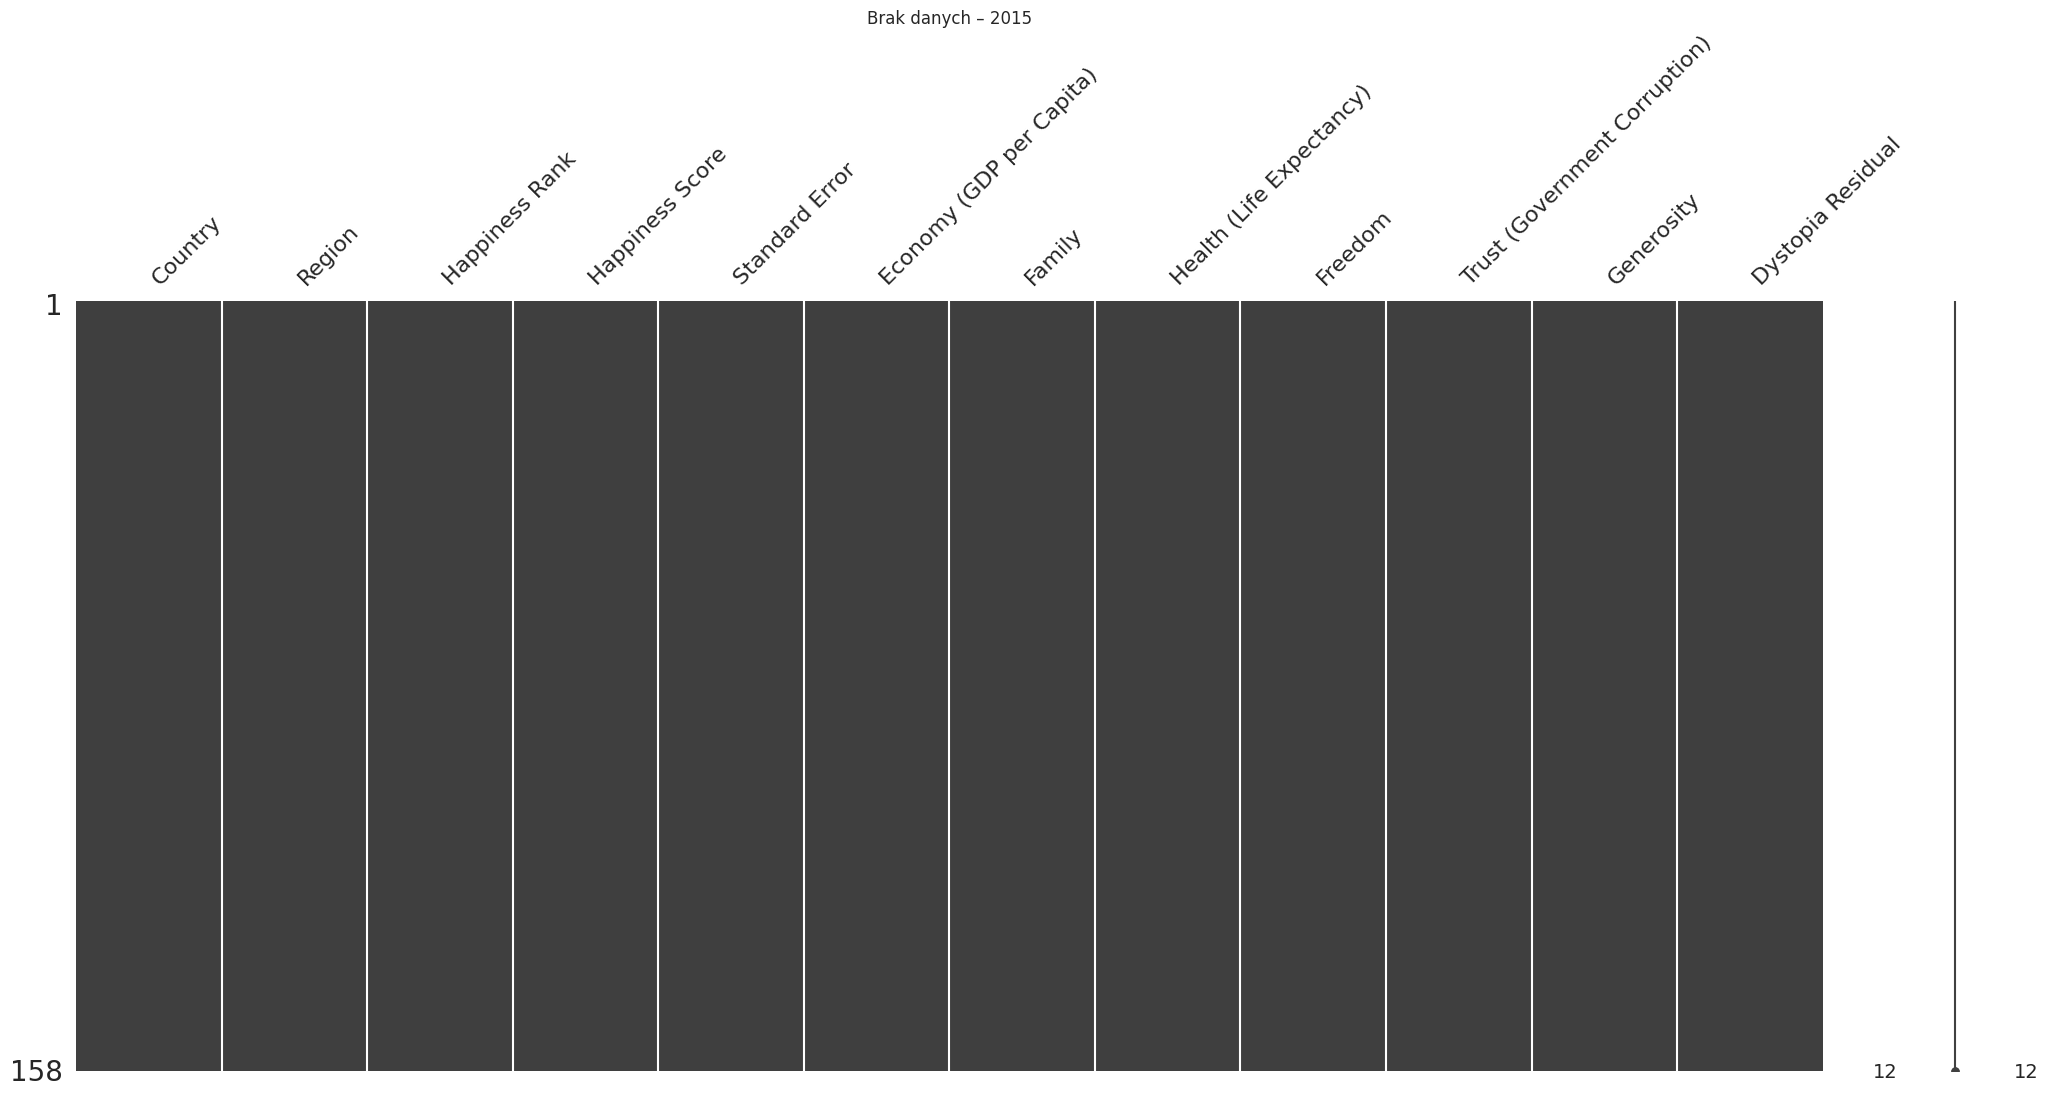

📈 Brak danych – rok 2016


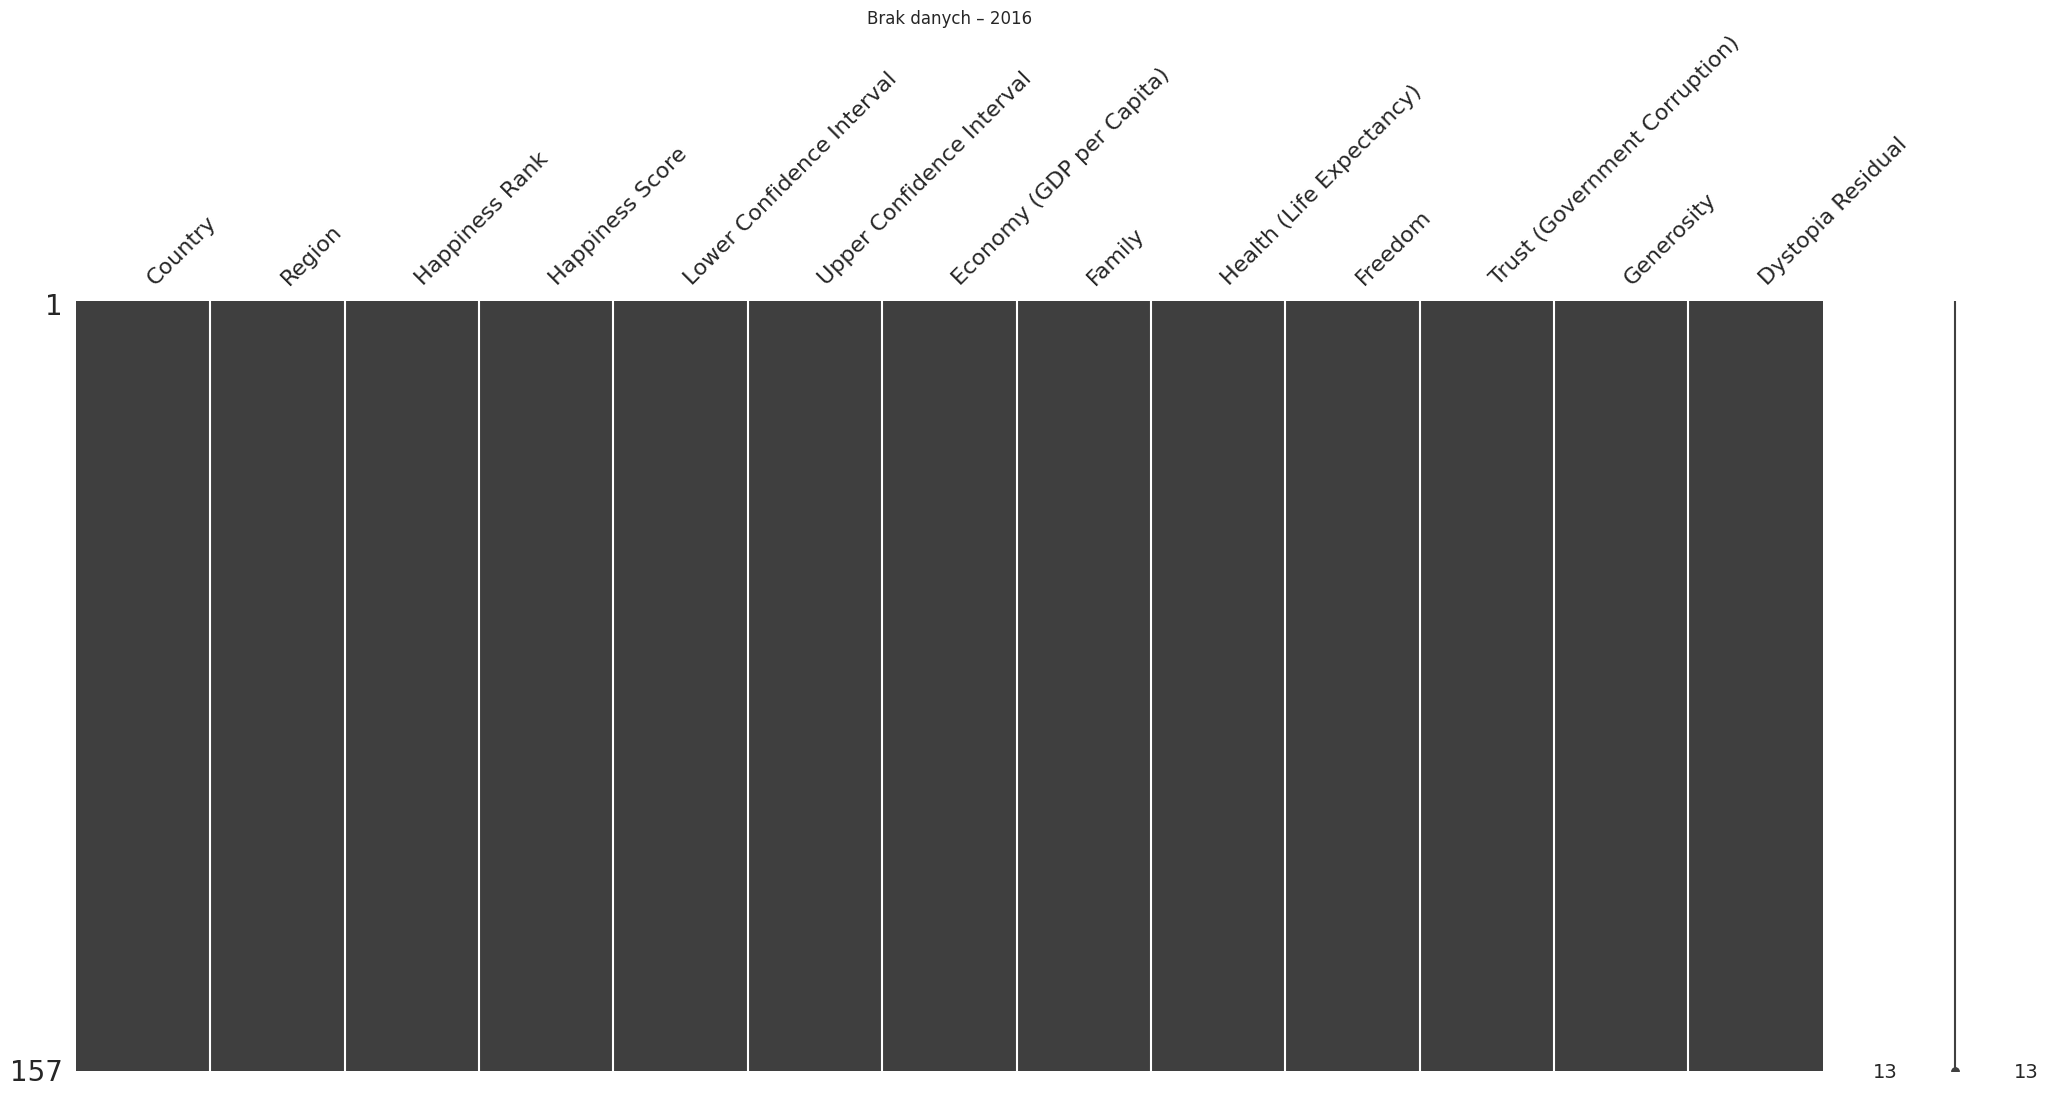

📈 Brak danych – rok 2017


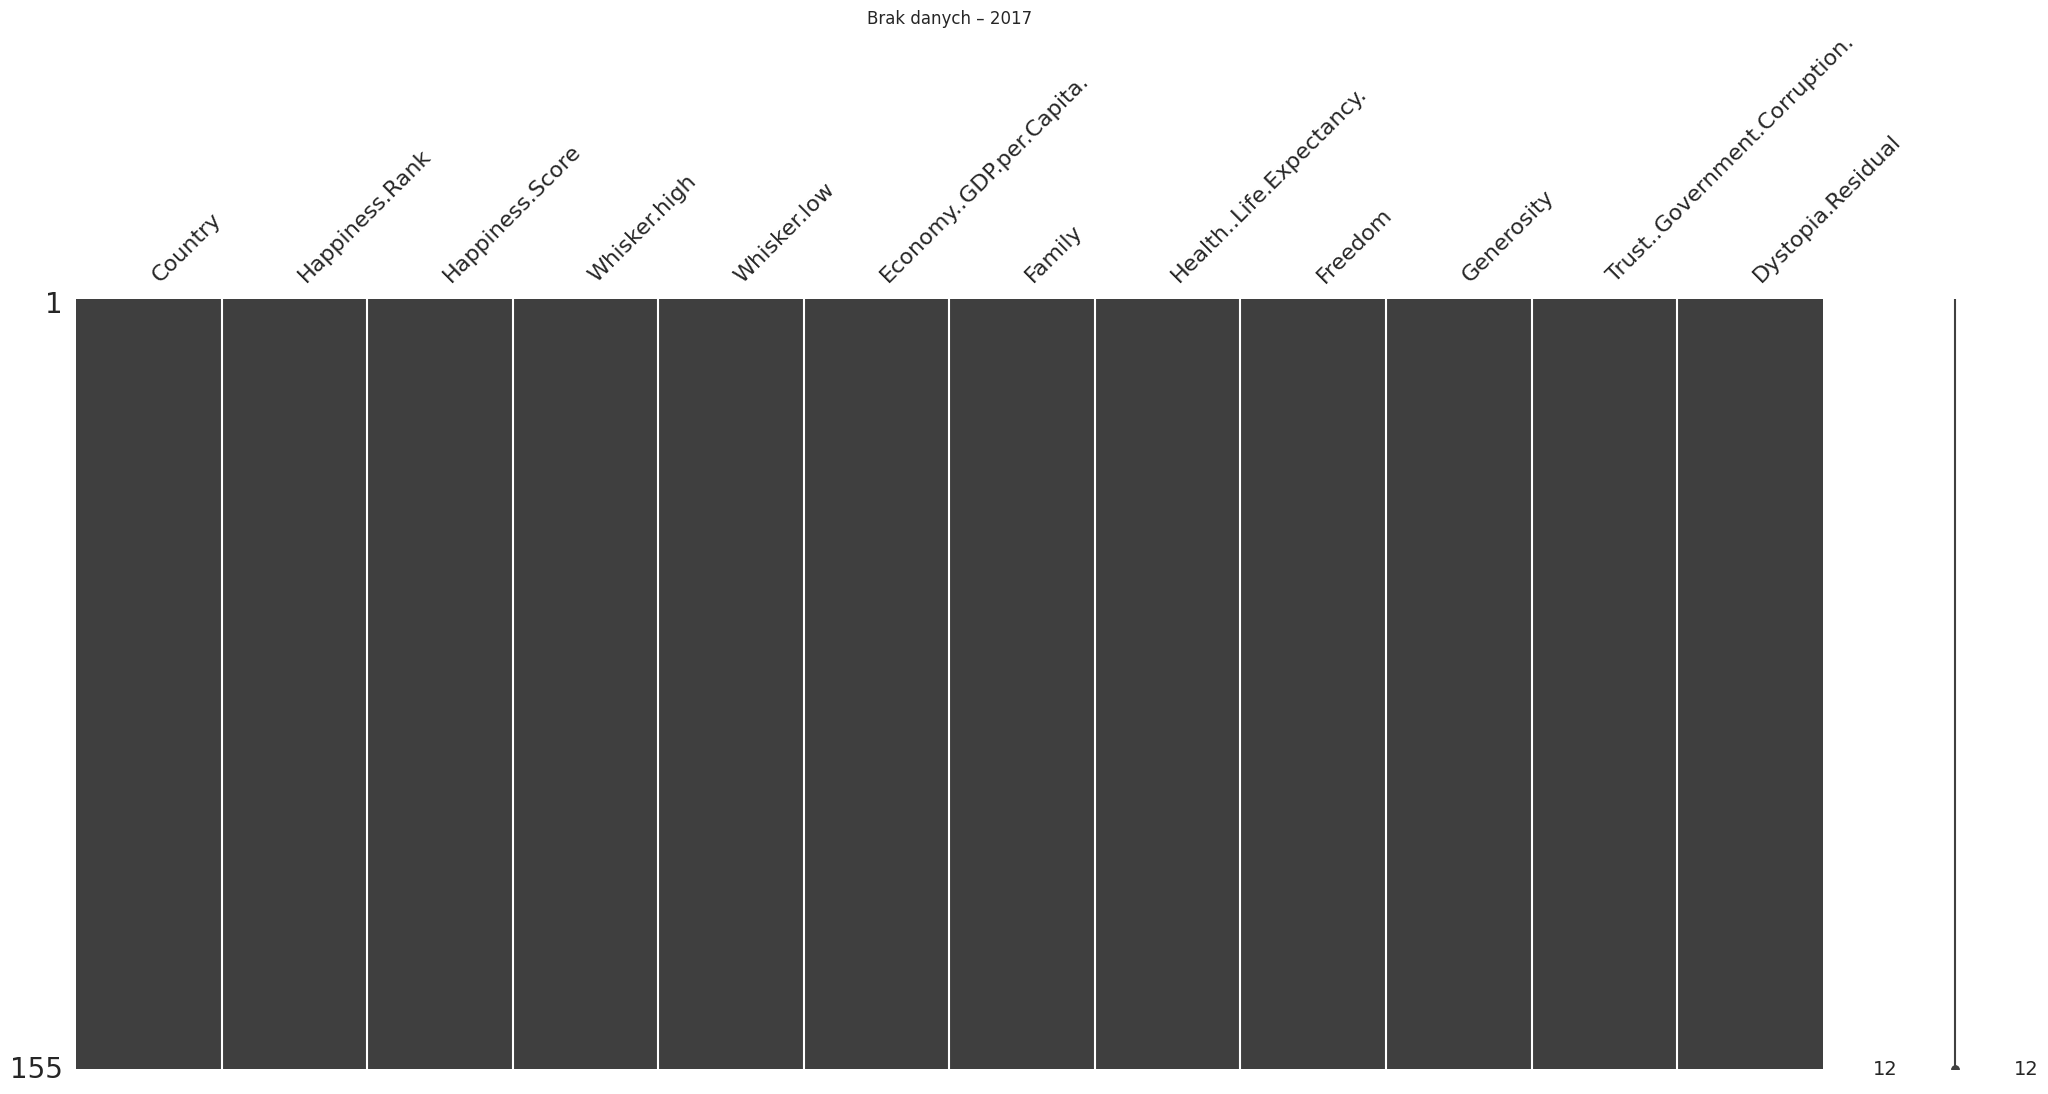

📈 Brak danych – rok 2018


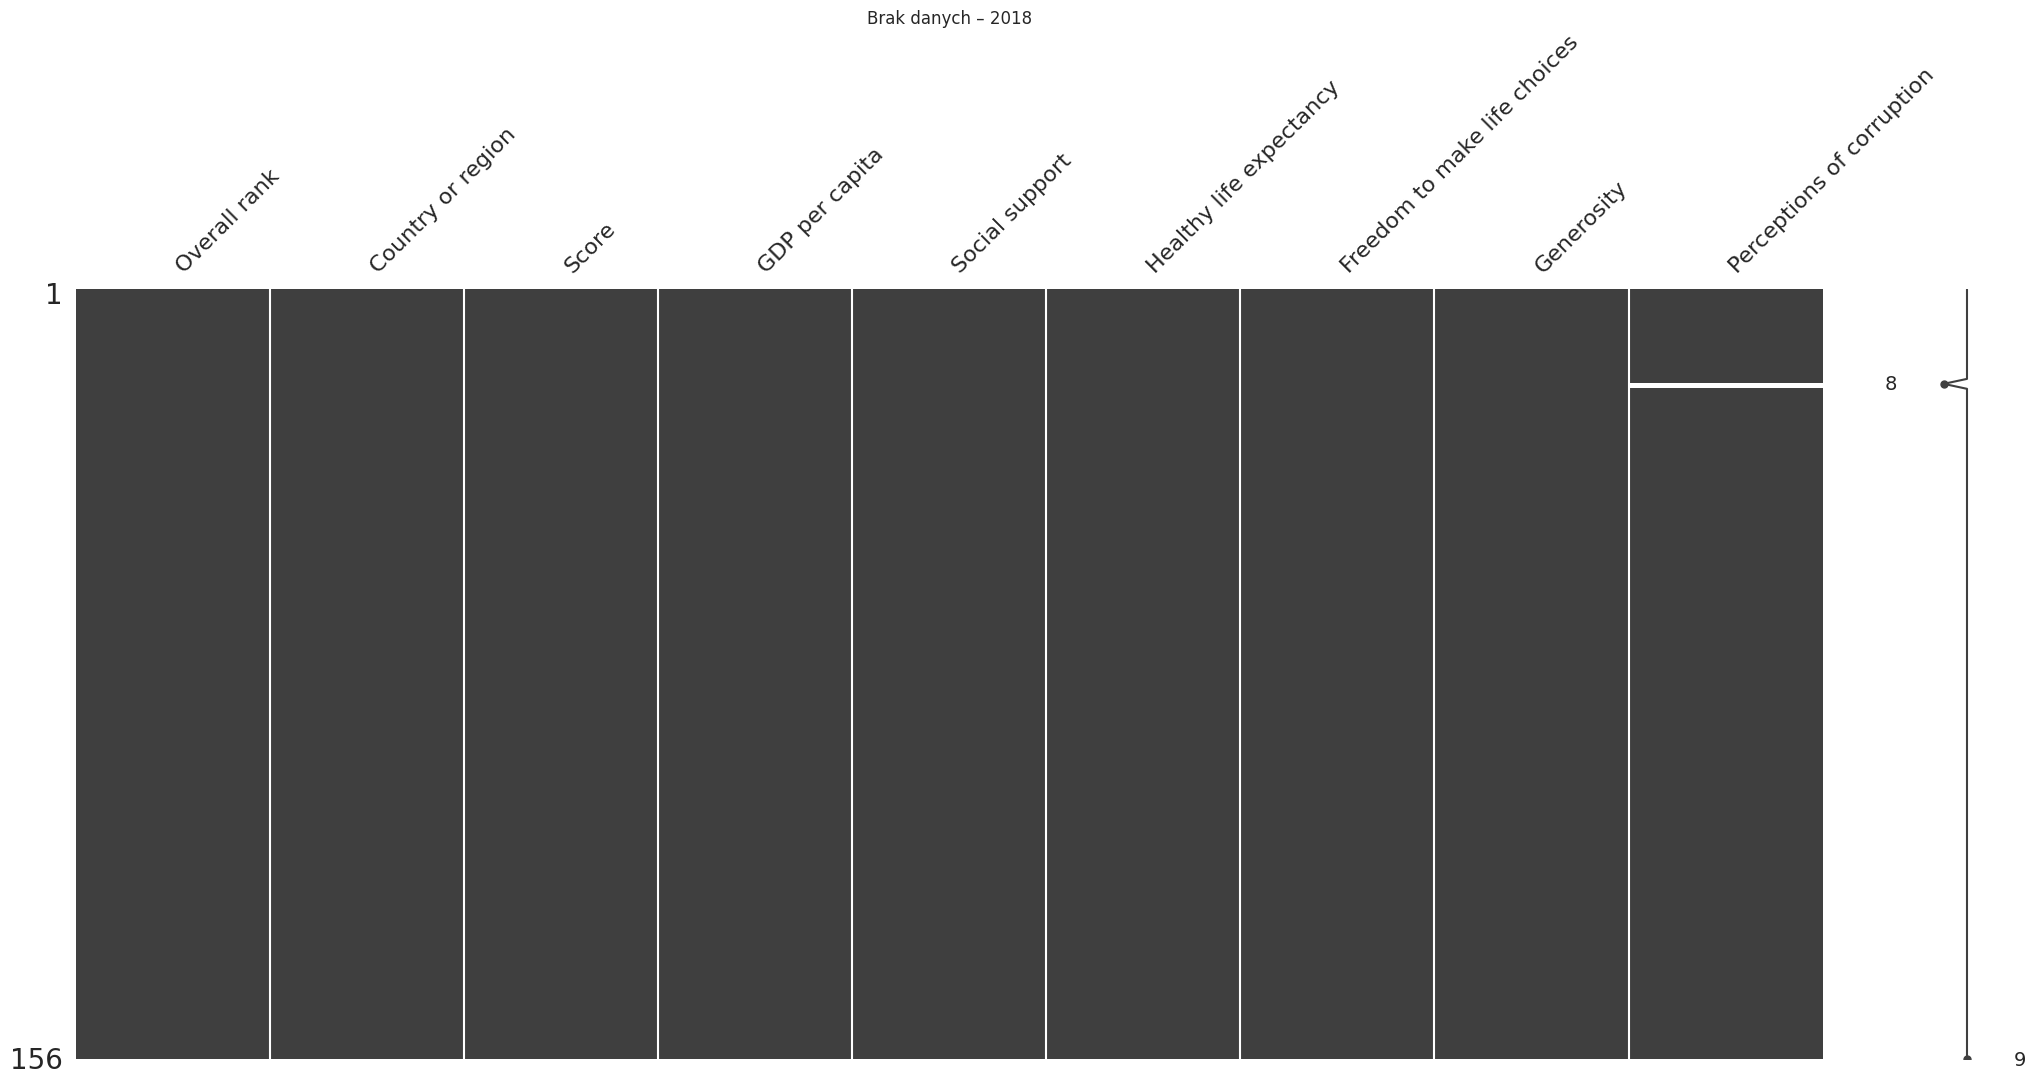

📈 Brak danych – rok 2019


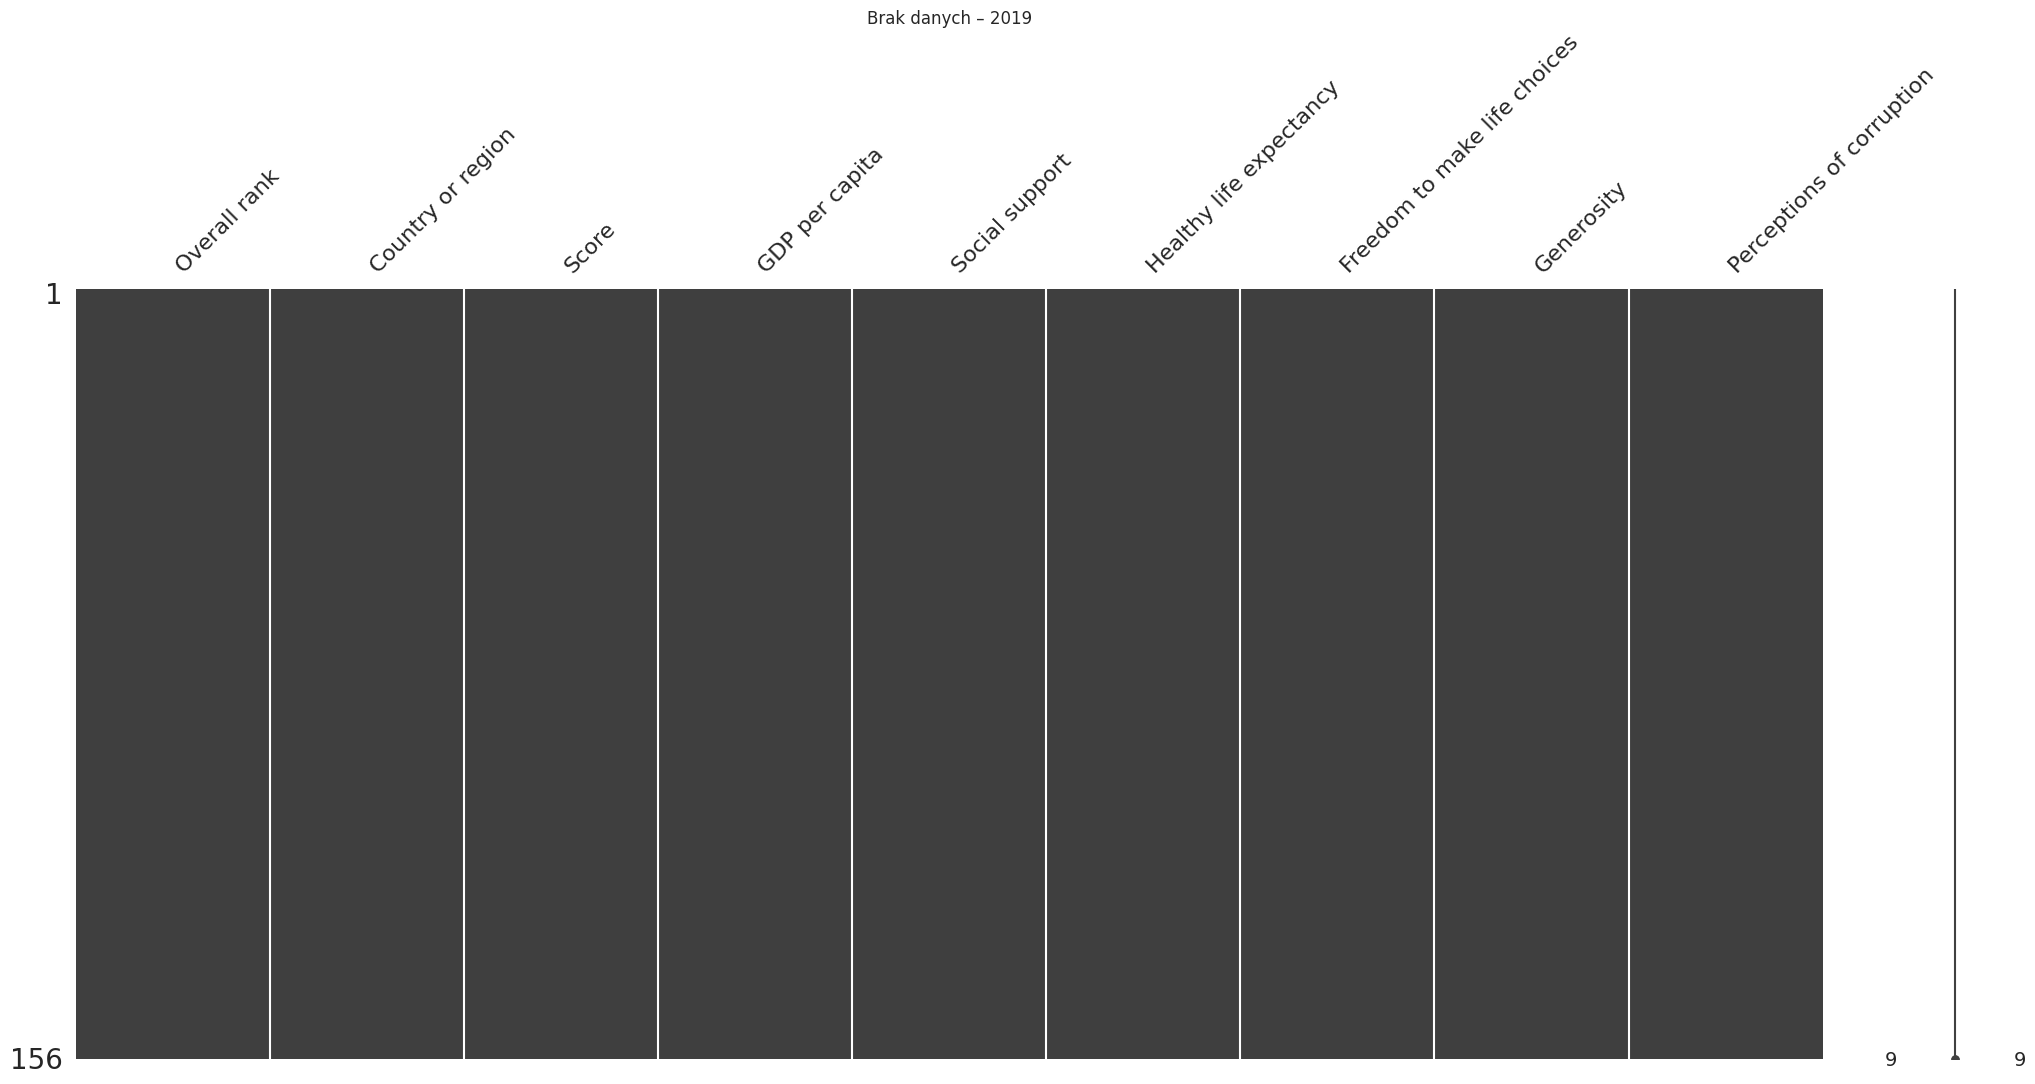

📈 Brak danych – rok 2020


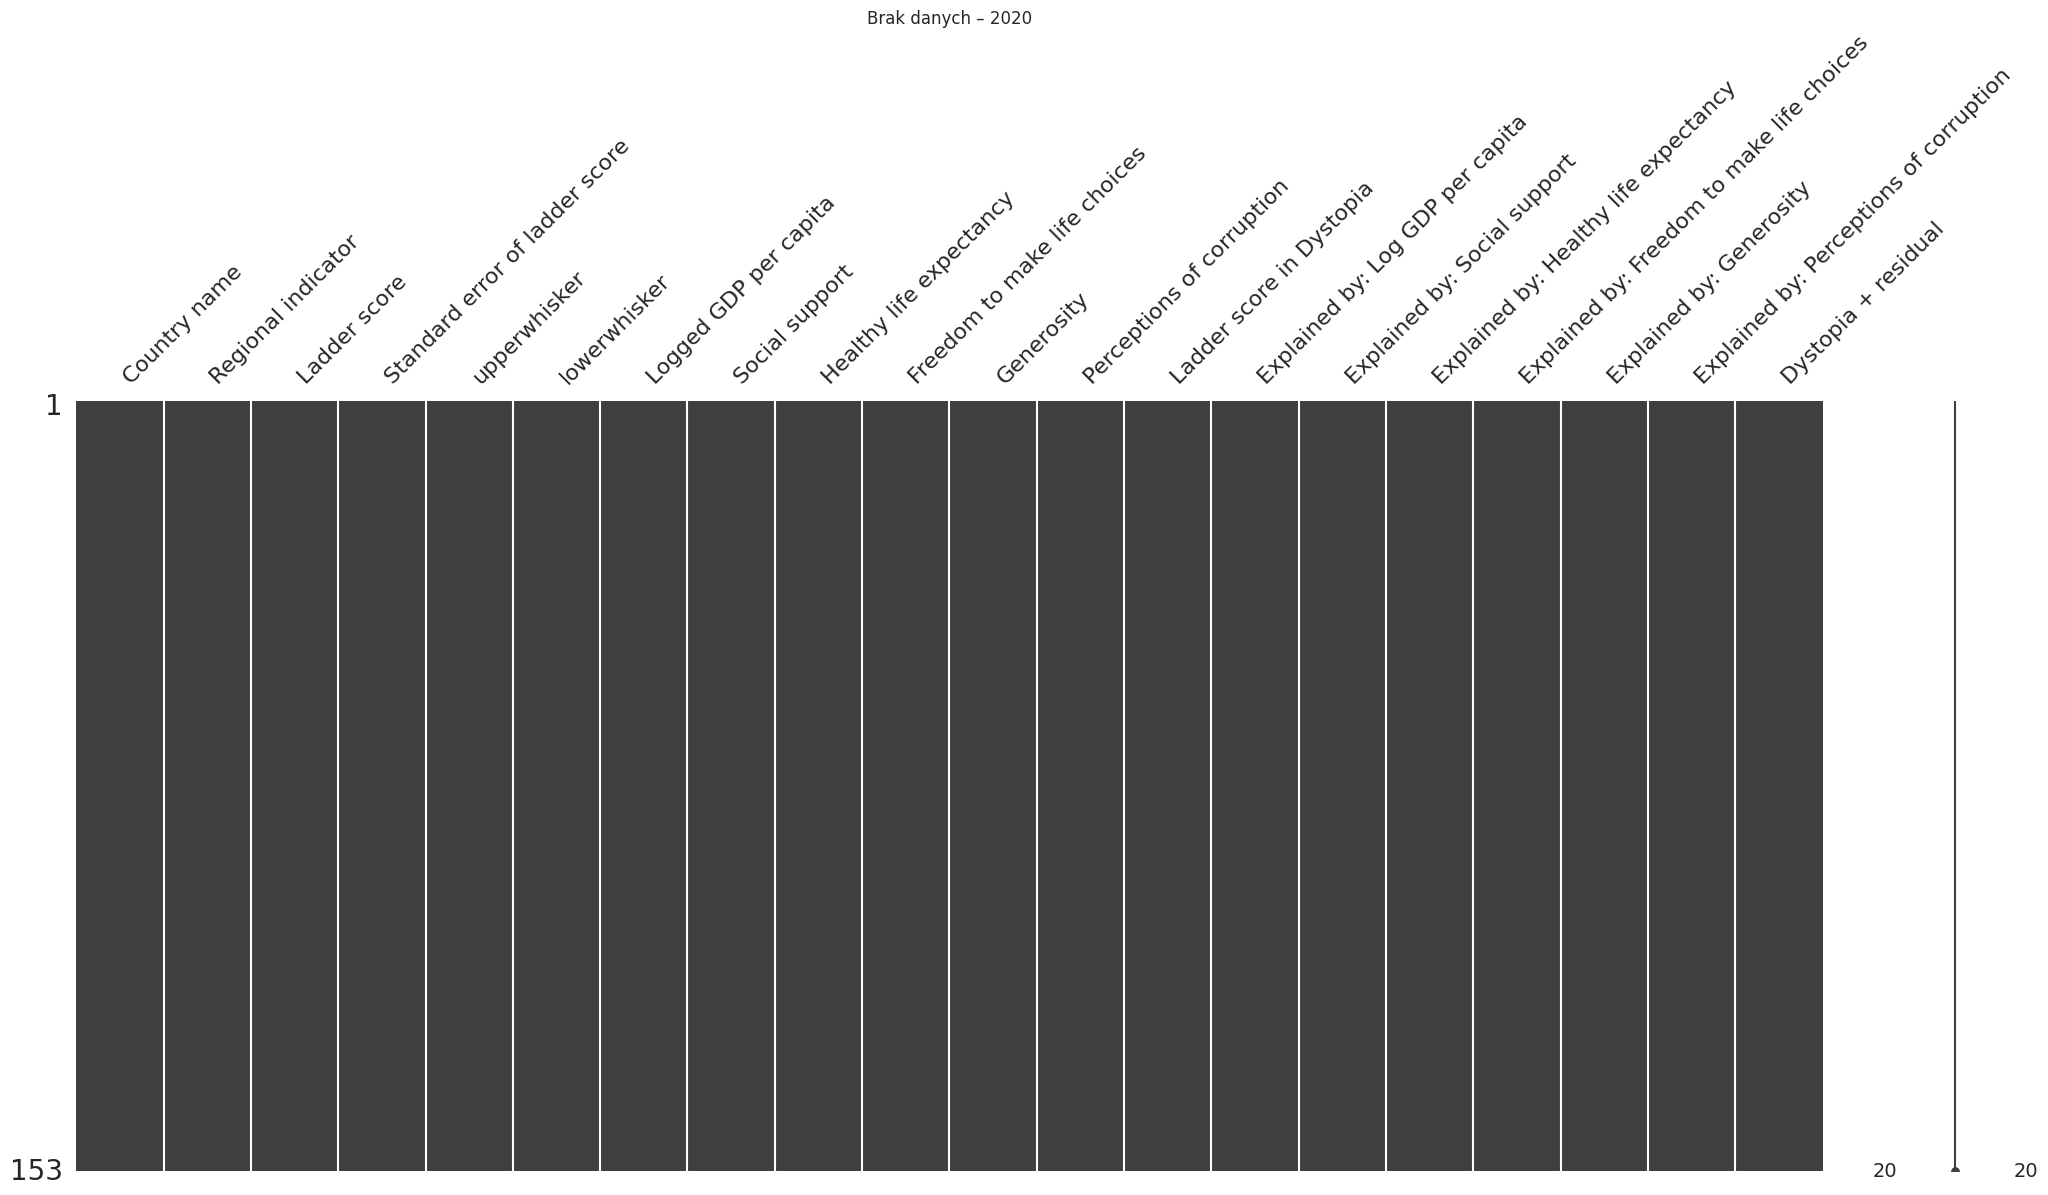

📈 Brak danych – rok 2021


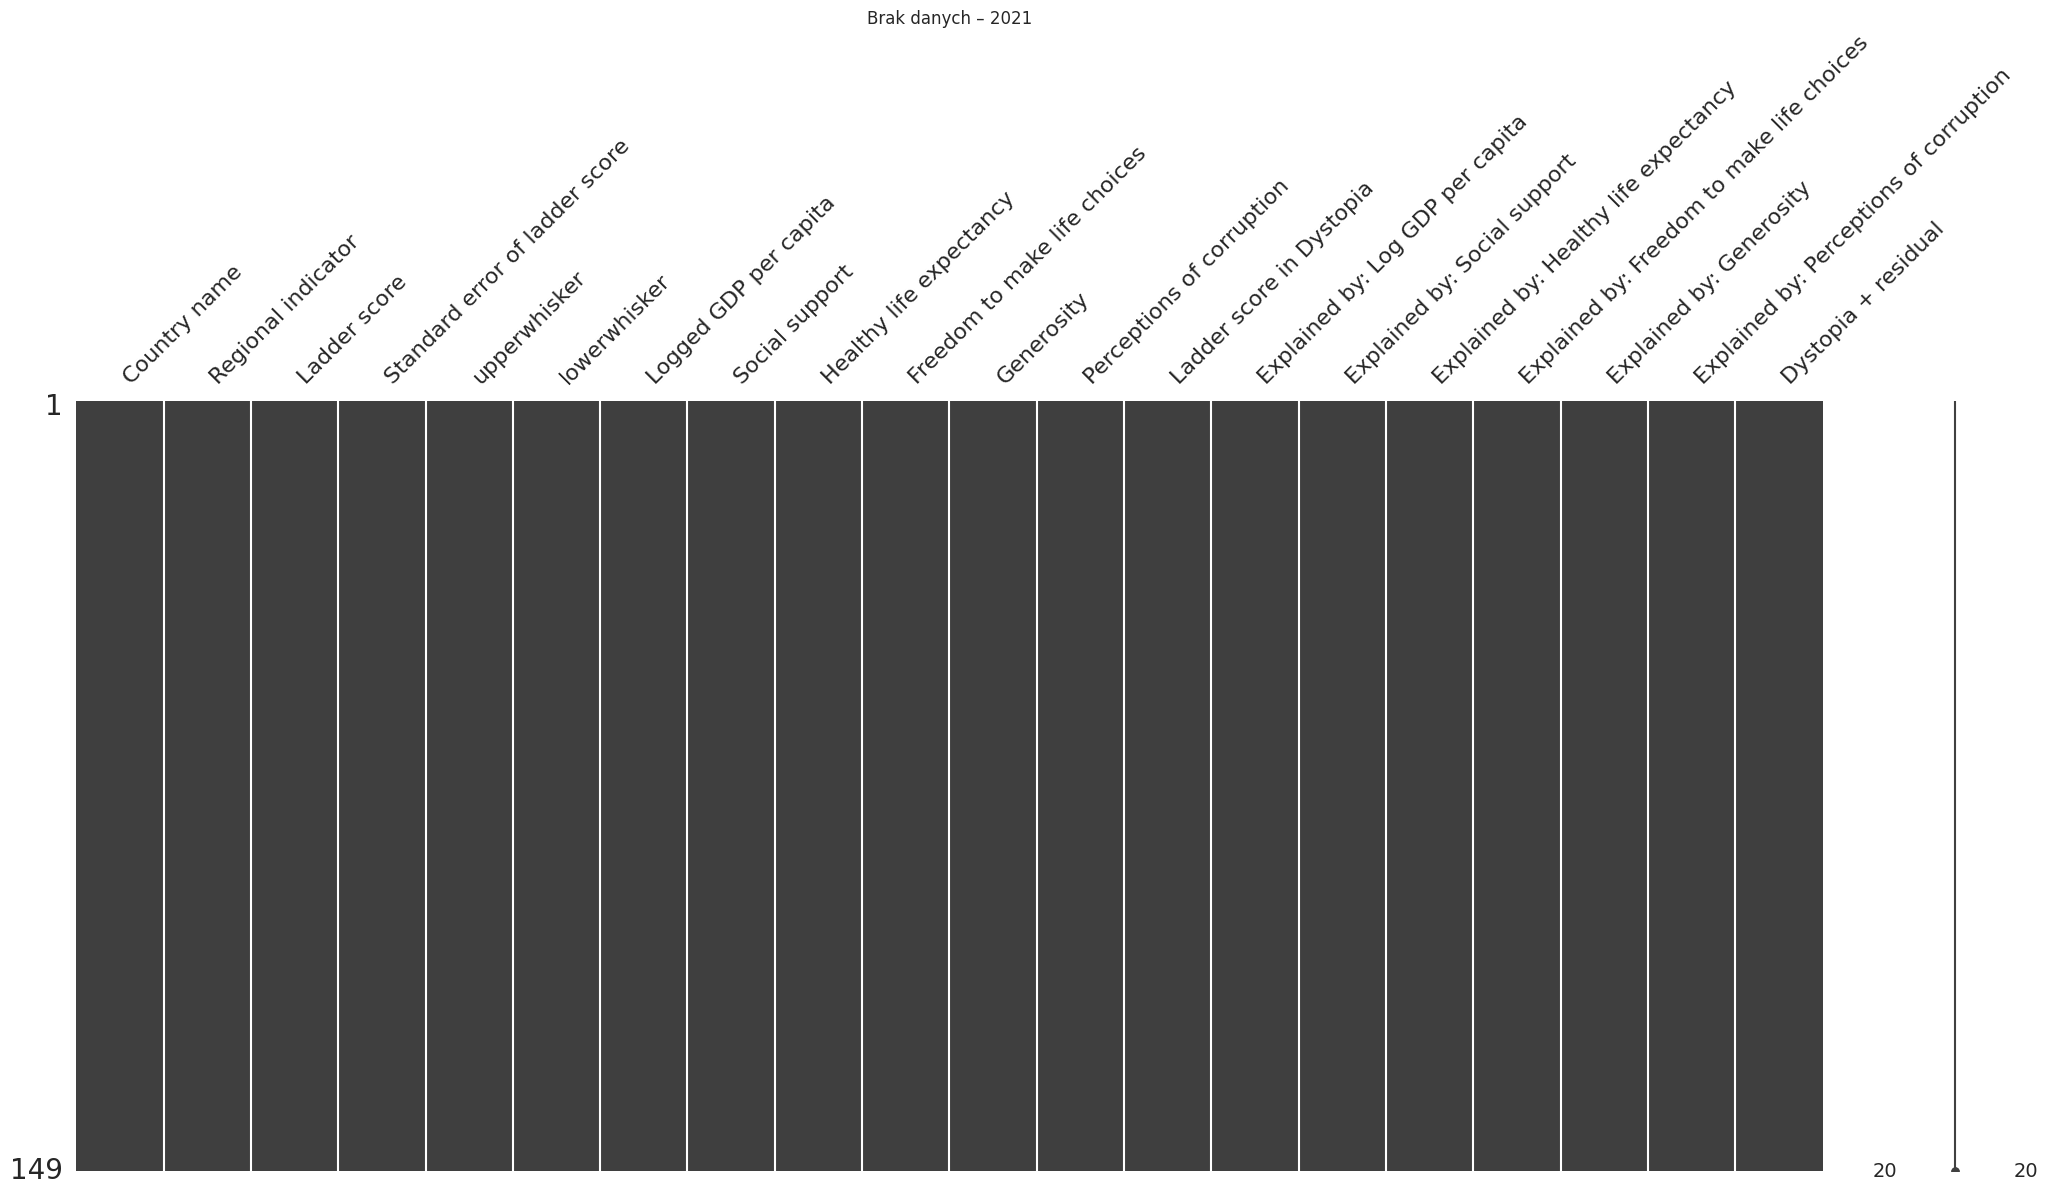

📈 Brak danych – rok 2022


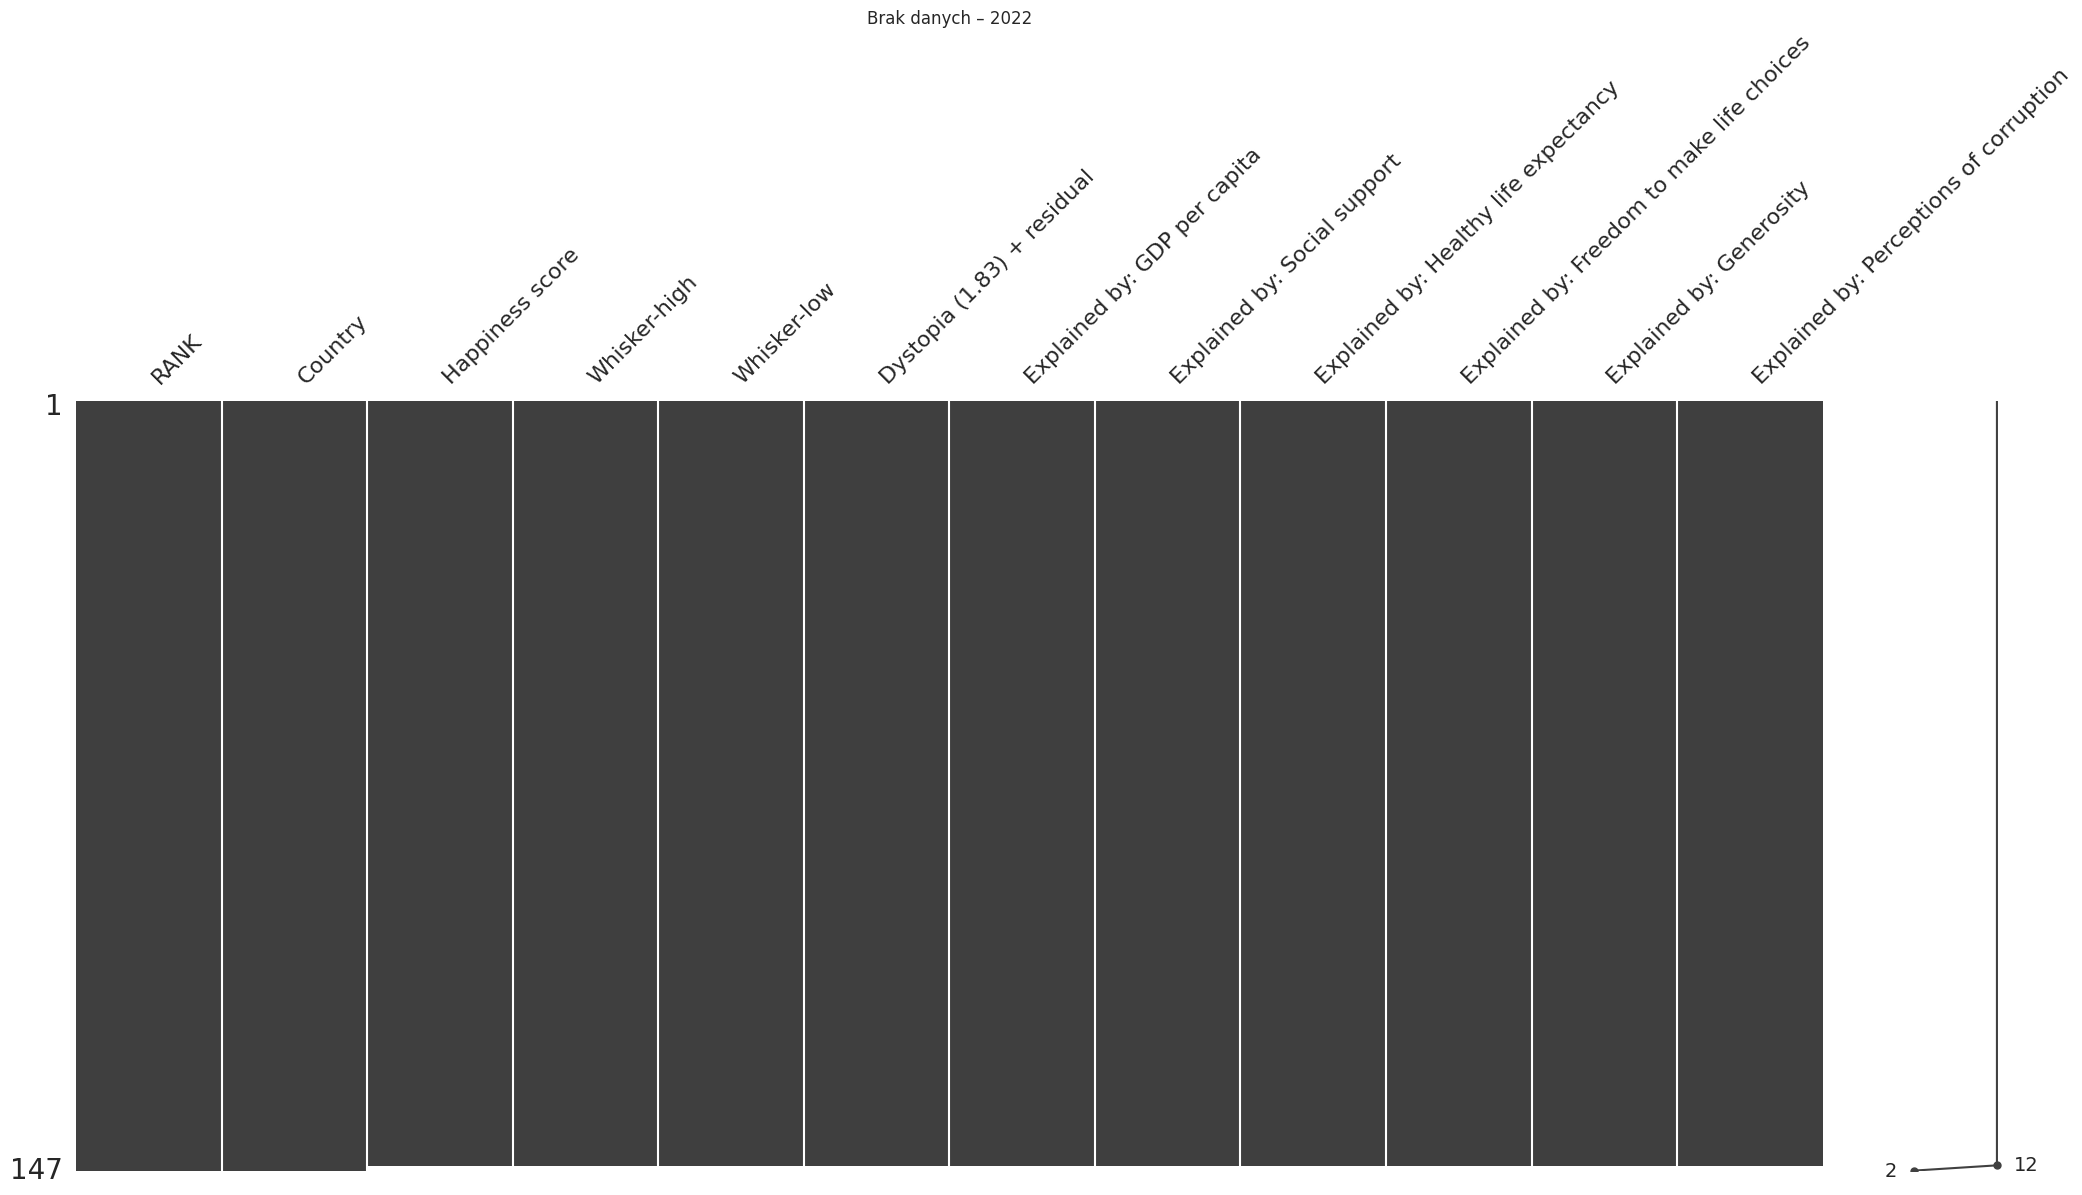

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt


# Iteracja po wszystkich latach
for rok in sorted(dfs.keys()):
    df = dfs[rok]
    print(f"📈 Brak danych – rok {rok}")

    # Macierz braków danych
    msno.matrix(df)
    plt.title(f"Brak danych – {rok}")
    plt.show()

---

---

## Czyszczenie i porządkowanie danych

W niniejszym rozdziale przeanalizujemy w sposób szczegółowy zbiór danych w celu wybrania danych przydatnych do analizy interesujących nas problemów oraz ujednolicenia tych danych.
Dokonamy również czyszczenia i identyfikacji braków danych.

- Identyfikacja nazw kolumn
- Analiza brakujących wartości
- Ujdenolicenie nazw kolumn
- Ujednolicenie nazw krajów
- Uzupełnienie regionów

---

### Identyfikacja nazw kolumn

Poniżej znajduję się kod rozpoczynający utworzenie podsumowania struktury danych wczytanych z różnych lat (przechowywanych w słowniku dfs) w kilku krokach:

- Tworzony jest pusty zbiór danych (summary_data), który będzie zawierał informacje o każdym roku.

- Kod przechodzi przez wszystkie ramki danych (DataFrame) w słowniku dfs — każda odpowiada innemu rokowi.

Dla każdego roku sprawdza:

- czy obiekt jest poprawną ramką danych,

- jeśli tak, zapisuje liczbę kolumn i ich nazwy,
- jeśli nie, wpisuje wartości zastępcze „N/A”.

Na koniec tworzona jest zbiorcza tabela (summary_df_str) z podsumowaniem lat, liczby kolumn i nazw kolumn. Tabela jest estetycznie sformatowana i wyświetlana w notebooku za pomocą stylizacji HTML (display(...)).

In [ ]:
from IPython.display import display, HTML

summary_data = []

# Iteracja po słowniku dfs gdzie kluczem jest rok, a wartością DataFrame
for year, df in dfs.items():
    if isinstance(df, pd.DataFrame):
        summary_data.append({
            "Rok": year,
            "Liczba kolumn": len(df.columns),
            "Nazwy kolumn": ", ".join(df.columns.tolist())
        })
    else:
        summary_data.append({
            "Rok": year,
            "Liczba kolumn": "N/A (Not a DataFrame)",
            "Nazwy kolumn": "N/A"
        })

# Utworzenie DataFrame z podsumowaniem
summary_df_str = pd.DataFrame(summary_data)

# Edycja estetyczna poprzez stylowanie tabeli dla lepszej czytelności
styles = [
    dict(selector="th", props=[("text-align", "left")]),
    dict(selector="td", props=[("text-align", "left")]),
    dict(selector="td:nth-child(3)", props=[("min-width", "100px")])
]

# Wyświetlenie stylizowanej tabeli
display(summary_df_str.style.set_table_styles(styles))


Na podstawie powyższego można zaobserwować, że wiele kolumn ma:

- identyczne znaczenie, ale różne nazwy (np. "Happiness Score" vs "Score" vs "Ladder score")
- różne formaty (np. "Trust..Government.Corruption." vs "Perceptions of corruption")
- różne style: CamelCase, snake_case, dot.notation

Dodatkowo można również zauważyc, że dane nie są jednolite. w zależności od roku df posiada od 9 do 20 kolumn

---

## Sprawdźmy brakujące wartości

Poniżej znajduję sie kod opisujący ujednolicenie nazw kolumn w danych z różnych lat i wizualizacji brakujących danych w każdym roku raportu o szczęściu.Słownik mapa_kolumn zawiera mapowanie różnych nazw kolumn (które mogą się różnić między latami, np. „Score”, „Ladder score” czy „Happiness Score”) na wspólne, ujednolicone nazwy – np. wszystkie kolumny związane ze szczęściem są mapowane na „Happiness Score”.

W części wizualizacyjnej:

- Tworzone są sub-wykresy (subploty) w układzie 4x2, aby pokazać dane z 8 lat.
- Dla każdego roku dane są wczytywane i kolumny są przemianowywane zgodnie z mapa_kolumn.
- Następnie liczone są braki danych (NaN) dla każdej kolumny.

Dla każdego roku tworzony jest osobny wykres słupkowy, pokazujący liczbę brakujących wartości w każdej kolumnie.
Wykresy są automatycznie podpisywane i układane estetycznie przy pomocy plt.tight_layout().

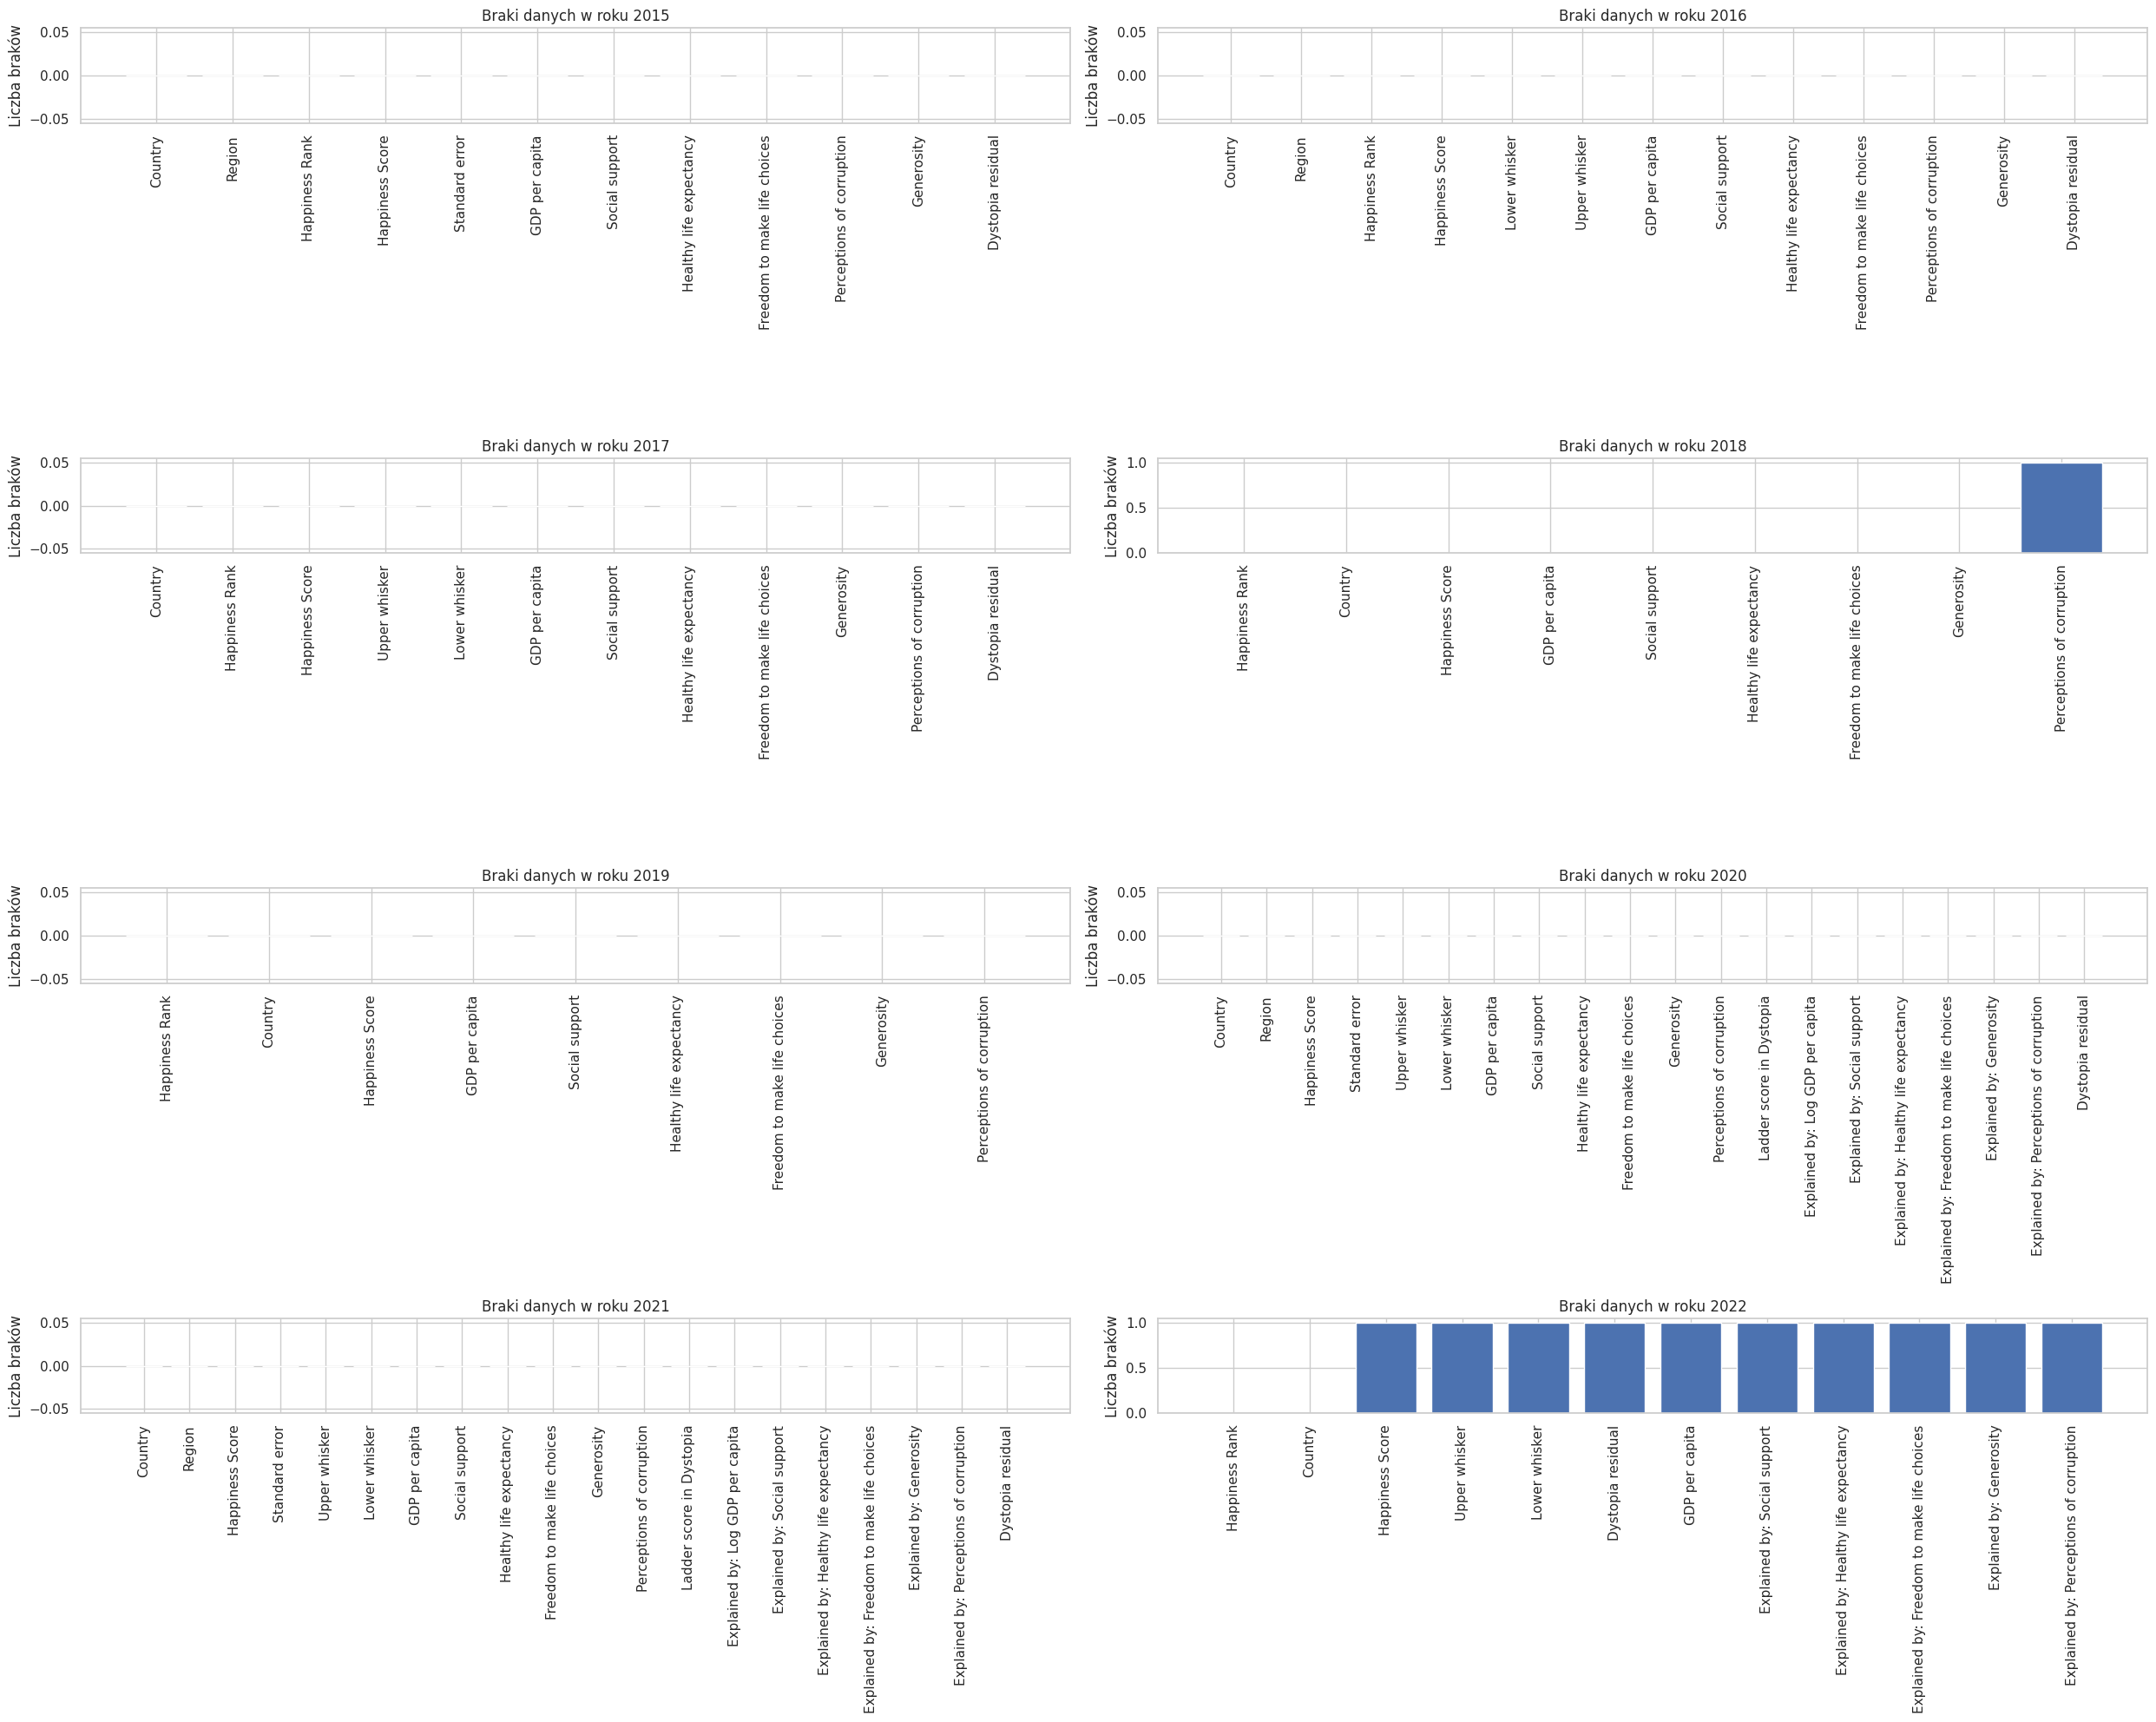

In [ ]:
mapa_kolumn = {
    # Kraje i regiony
    'Country or region': 'Country',
    'Country name': 'Country',
    'Regional indicator': 'Region',

    # Rankingi i oceny
    'Happiness Rank': 'Happiness Rank',
    'Happiness.Rank': 'Happiness Rank',
    'RANK': 'Happiness Rank',
    'Overall rank': 'Happiness Rank',

    'Happiness Score': 'Happiness Score',
    'Happiness.Score': 'Happiness Score',
    'Happiness score': 'Happiness Score',
    'Score': 'Happiness Score',
    'Ladder score': 'Happiness Score',

    # Gospodarka
    'Economy (GDP per Capita)': 'GDP per capita',
    'Economy..GDP.per.Capita.': 'GDP per capita',
    'GDP per capita': 'GDP per capita',
    'Logged GDP per capita': 'GDP per capita',
    'Explained by: GDP per capita': 'GDP per capita',
    'Log GDP per capita': 'GDP per capita',

    # Rodzina / wsparcie społeczne
    'Family': 'Social support',
    'Social support': 'Social support',

    # Życie i zdrowie
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Healthy life expectancy': 'Healthy life expectancy',

    # Wolność
    'Freedom': 'Freedom to make life choices',
    'Freedom to make life choices': 'Freedom to make life choices',

    # Korupcja / zaufanie
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Perceptions of corruption': 'Perceptions of corruption',

    # Dystopia
    'Dystopia + residual': 'Dystopia residual',
    'Dystopia.Residual': 'Dystopia residual',
    'Dystopia (1.83) + residual': 'Dystopia residual',
    'Dystopia Residual': 'Dystopia residual',

    # Błędy i przedziały ufności
    'Standard Error': 'Standard error',
    'Standard error of ladder score': 'Standard error',
    'Lower Confidence Interval': 'Lower whisker',
    'Whisker-low': 'Lower whisker',
    'Whisker.low': 'Lower whisker',
    'lowerwhisker': 'Lower whisker',

    'Upper Confidence Interval': 'Upper whisker',
    'Whisker-high': 'Upper whisker',
    'Whisker.high': 'Upper whisker',
    'upperwhisker': 'Upper whisker'
}




# Utworzenie wykresów subplotów
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()

# Iteracja po posortowanych latach
for i, year in enumerate(sorted(dfs.keys())):
    df = dfs[year].rename(columns=mapa_kolumn)  # Ujednolicenie nazw kolumn
    null_counts = df.isnull().sum()

    axes[i].bar(null_counts.index, null_counts.values)
    axes[i].set_title(f'Braki danych w roku {year}')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel("Liczba braków")

plt.tight_layout()
plt.show()



W ramach weryfikacji brakujących wartości można wyciągąć następujące wnioski:
- Brak danych w roku 2018 - wykryto w kolumnie ``Percepction of corruption``
- Brak danych w roku 2022 - wykryto w kolumnach: ``Hapiness Score, Upper whisker, Lower whisker, Dystopia residual, GDP per capita, Explained by: Social Support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of curruption``

---

### Analiza brakujących wartosci

Poniżej znajduje się kod opisujący sprawdzanie brakujących wartości dla każdego z zbiorów danych oraz wynik przedstawiają czy w danym zbiorze danych występujące braki.

In [ ]:

for name, df in dfs.items():    # Sprawdzanie brakujących wartości w każdym z DataFrame'ów
                                # Obliczanie sumy brakujących wartości dla każdej kolumny
    missing_values = df.isnull().sum()


    if missing_values.any():    # Sprawdźzenie, czy w ogóle istnieją jakieś brakujące wartości
        print(f"\nDataFrame '{name}' ma brakujące wartości w kolumnach:")
                                # Wyświetlenie tylko tych kolumn, w których brakuje danych
        print(missing_values[missing_values > 0])

                                # Wyświetlenie indeksu brakujących wartości dla każdej takiej kolumny
        for col in missing_values[missing_values > 0].index:
            missing_indices = df[df[col].isnull()].index.tolist()
            print(f" → Kolumna '{col}': brakujące wartości w indeksach: {missing_indices}")

        print("-" * 60)         # Separator dla lepszej czytelności
    else:
        print(f"{name} nie ma brakujących wartości.")

print("\n--- Zakończono sprawdzanie brakujących wartości ---")

2015 nie ma brakujących wartości.
2016 nie ma brakujących wartości.
2017 nie ma brakujących wartości.

DataFrame '2018' ma brakujące wartości w kolumnach:
Perceptions of corruption    1
dtype: int64
 → Kolumna 'Perceptions of corruption': brakujące wartości w indeksach: [19]
------------------------------------------------------------
2019 nie ma brakujących wartości.
2020 nie ma brakujących wartości.
2021 nie ma brakujących wartości.

DataFrame '2022' ma brakujące wartości w kolumnach:
Happiness score                               1
Whisker-high                                  1
Whisker-low                                   1
Dystopia (1.83) + residual                    1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64
 → Kolumna 'Hap

Analiza brakujących wartosci pozwala wysunąć poniższe wnioski

Status danych:
- ✅ 2015 nie ma brakujących wartości.
- ✅ 2016 nie ma brakujących wartości.
- ✅ 2017 nie ma brakujących wartości.
- ❓ 2018 ma brakujące wartości w kolumnie: Perceptions of corruption    1, dtype: int64
 → Kolumna 'Perceptions of corruption': brakujące wartości w indeksie: [19]
- ✅ 2019 nie ma brakujących wartości.
- ✅ 2020 nie ma brakujących wartości.
- ✅ 2021 nie ma brakujących wartości.
- ❓ 2022 ma brakujące wartości w wspomnianych wcześniej kolumnach: brakujące wartosci w indeksie [146]                              


W ramach szczegółowej analizy można zaobserwowac ``wyjątek w bazie danych z 2018 roku``, która wykazuje, że brakuje danych w kolumnie ``Perception of corruption``.
Na tym etapie, rozważaliśmy trzy możliwe scenariusze uzupełnienia braków:
1. Zastosowanie średniej dla regionu dla ``Corruption`` w kontekście krajów z tego samego regionu (np. Middle East and North Africa)
2. Zastosowanie średniej dla UAE pod warunkiem, że występuje w innych latach.
3. Zastosowanie modelu regresji, aby oszacować wartość na podstawie innych zmiennych (GDP, Score, itd) - Decyzja o tym wariancie zostanie podjęta w dalszej części projektu.




In [ ]:
dfs[2018].head(20)

Overall rank     Country or region  Score  GDP per capita  Social support  \
0              1               Finland  7.632           1.305           1.592   
1              2                Norway  7.594           1.456           1.582   
2              3               Denmark  7.555           1.351           1.590   
3              4               Iceland  7.495           1.343           1.644   
4              5           Switzerland  7.487           1.420           1.549   
5              6           Netherlands  7.441           1.361           1.488   
6              7                Canada  7.328           1.330           1.532   
7              8           New Zealand  7.324           1.268           1.601   
8              9                Sweden  7.314           1.355           1.501   
9             10             Australia  7.272           1.340           1.573   
10            11        United Kingdom  7.190           1.244           1.433   
11            12               Austria  7.139           1.341           1.504   
12            13            Costa Rica  7.072           1.010           1.459   
13            14               Ireland  6.977           1.448           1.583   
14            15               Germany  6.965           1.340           1.474   
15            16               Belgium  6.927           1.324           1.483   
16            17            Luxembourg  6.910           1.576           1.520   
17            18         United States  6.886           1.398           1.471   
18            19                Israel  6.814           1.301           1.559   
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     0.874                         0.681       0.202   
1                     0.861                         0.686       0.286   
2                     0.868                         0.683       0.284   
3                     0.914                         0.677       0.353   
4                     0.927                         0.660       0.256   
5                     0.878                         0.638       0.333   
6                     0.896                         0.653       0.321   
7                     0.876                         0.669       0.365   
8                     0.913                         0.659       0.285   
9                     0.910                         0.647       0.361   
10                    0.888                         0.464       0.262   
11                    0.891                         0.617       0.242   
12                    0.817                         0.632       0.143   
13                    0.876                         0.614       0.307   
14                    0.861                         0.586       0.273   
15                    0.894                         0.583       0.188   
16                    0.896                         0.632       0.196   
17                    0.819                         0.547       0.291   
18                    0.883                         0.533       0.354   
19                    0.670                         0.284       0.186   

    Perceptions of corruption  
0                       0.393  
1                       0.340  
2                       0.408  
3                       0.138  
4                       0.357  
5                       0.295  
6                       0.291  
7                       0.389  
8                       0.383  
9                       0.302  
10                      0.082  
11                      0.224  
12                      0.101  
13                      0.306  
14                      0.280  
15                      0.240  
16                      0.321  
17                      0.133  
18                      0.272  
19                        NaN

``Wyjątek w bazie danych z roku 2022.`` Po przejrzeniu zbioru danych podjęto decyzję o usunięciu pustej obserwacji w indeksie 146.

In [ ]:
dfs[2022]

RANK      Country Happiness score Whisker-high Whisker-low  \
0       1      Finland           7,821        7,886       7,756   
1       2      Denmark           7,636        7,710       7,563   
2       3      Iceland           7,557        7,651       7,464   
3       4  Switzerland           7,512        7,586       7,437   
4       5  Netherlands           7,415        7,471       7,359   
..    ...          ...             ...          ...         ...   
142   143      Rwanda*           3,268        3,462       3,074   
143   144     Zimbabwe           2,995        3,110       2,880   
144   145      Lebanon           2,955        3,049       2,862   
145   146  Afghanistan           2,404        2,469       2,339   
146   147           xx             NaN          NaN         NaN   

    Dystopia (1.83) + residual Explained by: GDP per capita  \
0                        2,518                        1,892   
1                        2,226                        1,953   
2                        2,320                        1,936   
3                        2,153                        2,026   
4                        2,137                        1,945   
..                         ...                          ...   
142                      0,536                        0,785   
143                      0,548                        0,947   
144                      0,216                        1,392   
145                      1,263                        0,758   
146                        NaN                          NaN   

    Explained by: Social support Explained by: Healthy life expectancy  \
0                          1,258                                 0,775   
1                          1,243                                 0,777   
2                          1,320                                 0,803   
3                          1,226                                 0,822   
4                          1,206                                 0,787   
..                           ...                                   ...   
142                        0,133                                 0,462   
143                        0,690                                 0,270   
144                        0,498                                 0,631   
145                        0,000                                 0,289   
146                          NaN                                   NaN   

    Explained by: Freedom to make life choices Explained by: Generosity  \
0                                        0,736                    0,109   
1                                        0,719                    0,188   
2                                        0,718                    0,270   
3                                        0,677                    0,147   
4                                        0,651                    0,271   
..                                         ...                      ...   
142                                      0,621                    0,187   
143                                      0,329                    0,106   
144                                      0,103                    0,082   
145                                      0,000                    0,089   
146                                        NaN                      NaN   

    Explained by: Perceptions of corruption  
0                                     0,534  
1                                     0,532  
2                                     0,191  
3                                     0,461  
4                                     0,419  
..                                      ...  
142                                   0,544  
143                                   0,105  
144                                   0,034  
145                                   0,005  
146                                     NaN  

[147 rows x 12 columns]

In [ ]:
# Usuwanie linijki z indeksu 146

dfs[2022].drop(index=146, inplace=True)

---


### Ujednolicenie nazw kolumn

W celu przeprowadzenia standaryzacji nazw kolumn podjęto następujące kroki:
- zebranie wszystkich unikalnych nazw kolumn z każdego zbioru danych w przedziale lat 2015-2022 oraz poddaniu sortowaniu w porzadku alfebetycznym na cel ćwiczenia.
- utworzenie słownika w celu zmapowania bieżących nazw kolumn i przypisania nowych zmian.
- zastosowanie mapy nazw kolumn oraz sprawdzenie dostępnosci stanardowych nazw kolumn we wszystkich zbiorach danych
- implementacja nowych nazw kolumn dla każdego zbiory danych


In [ ]:
# Zbieramy wszystkie unikalne nazwy kolumn z każdego DataFrame
all_columns = set()
for df in dfs.values():
    all_columns.update(df.columns)

# Przekształcamy na posortowaną listę dla przejrzystości
sorted_all_columns = sorted(all_columns)
sorted_all_columns



['Country',
 'Country name',
 'Country or region',
 'Dystopia (1.83) + residual',
 'Dystopia + residual',
 'Dystopia Residual',
 'Dystopia.Residual',
 'Economy (GDP per Capita)',
 'Economy..GDP.per.Capita.',
 'Explained by: Freedom to make life choices',
 'Explained by: GDP per capita',
 'Explained by: Generosity',
 'Explained by: Healthy life expectancy',
 'Explained by: Log GDP per capita',
 'Explained by: Perceptions of corruption',
 'Explained by: Social support',
 'Family',
 'Freedom',
 'Freedom to make life choices',
 'GDP per capita',
 'Generosity',
 'Happiness Rank',
 'Happiness Score',
 'Happiness score',
 'Happiness.Rank',
 'Happiness.Score',
 'Health (Life Expectancy)',
 'Health..Life.Expectancy.',
 'Healthy life expectancy',
 'Ladder score',
 'Ladder score in Dystopia',
 'Logged GDP per capita',
 'Lower Confidence Interval',
 'Overall rank',
 'Perceptions of corruption',
 'RANK',
 'Region',
 'Regional indicator',
 'Score',
 'Social support',
 'Standard Error',
 'Standard er

Poniżej kod tworzący mapę ujednoliconych nazw kolumn

In [ ]:

mapa_kolumn = {
    # Kraje i regiony
    'Country or region': 'Country',
    'Country name': 'Country',
    'Regional indicator': 'Region',

    # Rankingi i oceny
    'Happiness Rank': 'Happiness Rank',
    'Happiness.Rank': 'Happiness Rank',
    'RANK': 'Happiness Rank',
    'Overall rank': 'Happiness Rank',

    'Happiness Score': 'Happiness Score',
    'Happiness.Score': 'Happiness Score',
    'Happiness score': 'Happiness Score',
    'Score': 'Happiness Score',
    'Ladder score': 'Happiness Score',

    # Gospodarka
    'Economy (GDP per Capita)': 'GDP per capita',
    'Economy..GDP.per.Capita.': 'GDP per capita',
    'GDP per capita': 'GDP per capita',
    'Logged GDP per capita': 'GDP per capita',
    'Explained by: GDP per capita': 'GDP per capita',
    'Log GDP per capita': 'GDP per capita',

    # Rodzina / wsparcie społeczne
    'Family': 'Social support',
    'Social support': 'Social support',

    # Życie i zdrowie
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Healthy life expectancy': 'Healthy life expectancy',

    # Wolność
    'Freedom': 'Freedom to make life choices',
    'Freedom to make life choices': 'Freedom to make life choices',

    # Korupcja / zaufanie
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Perceptions of corruption': 'Perceptions of corruption',

    # Dystopia
    'Dystopia + residual': 'Dystopia residual',
    'Dystopia.Residual': 'Dystopia residual',
    'Dystopia (1.83) + residual': 'Dystopia residual',
    'Dystopia Residual': 'Dystopia residual',

    # Błędy i przedziały ufności
    'Standard Error': 'Standard error',
    'Standard error of ladder score': 'Standard error',
    'Lower Confidence Interval': 'Lower whisker',
    'Whisker-low': 'Lower whisker',
    'Whisker.low': 'Lower whisker',
    'lowerwhisker': 'Lower whisker',

    'Upper Confidence Interval': 'Upper whisker',
    'Whisker-high': 'Upper whisker',
    'Whisker.high': 'Upper whisker',
    'upperwhisker': 'Upper whisker'
}




In [ ]:
dfs[2015]

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

Poniżej kod dostosowujący mapy nazw kolumn do wszystkich ramek danych

In [ ]:

for year, df in dfs.items():
    # Zmieniamy tylko te kolumny, które są w mapie
    renamed_cols = {col: mapa_kolumn[col] for col in df.columns if col in mapa_kolumn}
    dfs[year] = df.rename(columns=renamed_cols)

# Sprawdzenie: które standardowe kolumny są dostępne w każdym roku
column_presence = {
    year: sorted([col for col in df.columns if col in mapa_kolumn.values()])
    for year, df in dfs.items()
}

column_presence


{2015: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Perceptions of corruption',
  'Region',
  'Social support',
  'Standard error'],
 2016: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Lower whisker',
  'Perceptions of corruption',
  'Region',
  'Social support',
  'Upper whisker'],
 2017: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Lower whisker',
  'Perceptions of corruption',
  'Social support',
  'Upper whisker'],
 2018: ['Country',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Perceptions of corruption',
  'Social support'],
 2019: ['Country',
  'Freedom t

In [ ]:
dfs[2020]

Country              Region  Happiness Score  \
0                     Finland      Western Europe           7.8087   
1                     Denmark      Western Europe           7.6456   
2                 Switzerland      Western Europe           7.5599   
3                     Iceland      Western Europe           7.5045   
4                      Norway      Western Europe           7.4880   
..                        ...                 ...              ...   
148  Central African Republic  Sub-Saharan Africa           3.4759   
149                    Rwanda  Sub-Saharan Africa           3.3123   
150                  Zimbabwe  Sub-Saharan Africa           3.2992   
151               South Sudan  Sub-Saharan Africa           2.8166   
152               Afghanistan          South Asia           2.5669   

     Standard error  Upper whisker  Lower whisker  GDP per capita  \
0          0.031156       7.869766       7.747634       10.639267   
1          0.033492       7.711245       7.579955       10.774001   
2          0.035014       7.628528       7.491272       10.979933   
3          0.059616       7.621347       7.387653       10.772559   
4          0.034837       7.556281       7.419719       11.087804   
..              ...            ...            ...             ...   
148        0.115183       3.701658       3.250141        6.625160   
149        0.052425       3.415053       3.209547        7.600104   
150        0.058674       3.414202       3.184198        7.865712   
151        0.107610       3.027516       2.605684        7.425360   
152        0.031311       2.628270       2.505530        7.462861   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0          0.954330                71.900825                      0.949172   
1          0.955991                72.402504                      0.951444   
2          0.942847                74.102448                      0.921337   
3          0.974670                73.000000                      0.948892   
4          0.952487                73.200783                      0.955750   
..              ...                      ...                           ...   
148        0.319460                45.200001                      0.640881   
149        0.540835                61.098846                      0.900589   
150        0.763093                55.617260                      0.711458   
151        0.553707                51.000000                      0.451314   
152        0.470367                52.590000                      0.396573   

     Generosity  Perceptions of corruption  Ladder score in Dystopia  \
0     -0.059482                   0.195445                  1.972317   
1      0.066202                   0.168489                  1.972317   
2      0.105911                   0.303728                  1.972317   
3      0.246944                   0.711710                  1.972317   
4      0.134533                   0.263218                  1.972317   
..          ...                        ...                       ...   
148    0.082410                   0.891807                  1.972317   
149    0.055484                   0.183541                  1.972317   
150   -0.072064                   0.810237                  1.972317   
151    0.016519                   0.763417                  1.972317   
152   -0.096429                   0.933687                  1.972317   

     Explained by: Log GDP per capita  Explained by: Social support  \
0                            1.285190                      1.499526   
1                            1.326949                      1.503449   
2                            1.390774                      1.472403   
3                            1.326502                      1.547567   
4                            1.424207                      1.495173   
..                                ...                           ...   
148                          0.041072                

Poniżej kod przetwarzający każdą ramkę w słowniku dfs

In [ ]:

for rok, df in dfs.items():
    # 1. Zastosowanie mapy kolumn (ujednolicenie nazw)
    nowe_nazwy = {col: mapa_kolumn[col] for col in df.columns if col in mapa_kolumn}
    df = df.rename(columns=nowe_nazwy)

    # 2. Usunięcie zduplikowanych kolumn (jeśli występują)
    df = df.loc[:, ~df.columns.duplicated()]

    # 3. Usunięcie istniejącej kolumny 'Year', jeśli już jest
    if 'Year' in df.columns:
        df = df.drop(columns='Year')

    # 4. Dodanie kolumny 'Year' na pierwszą pozycję
    df.insert(0, 'Year', rok)

    # 5. Aktualizacja ramki danych w słowniku
    dfs[rok] = df


Następnie dodajemy kolumne Hapinness Rank, jeśeli jej brakuje.

In [ ]:

for rok, df in dfs.items():
    if 'Happiness Score' in df.columns:
        # Obliczenie rankingu na podstawie Happines Score
        df['Happiness Rank'] = df['Happiness Score'].rank(ascending=False, method='min')

        # Wstaw kolumnę przed 'Happiness Score'
        kolumny = df.columns.tolist()
        kolumny.remove('Happiness Rank')
        index_score = kolumny.index('Happiness Score')
        kolumny.insert(index_score, 'Happiness Rank')
        df = df[kolumny]

        dfs[rok] = df

# Sprawdzenie dla roku 2016
dfs[2016]


Year      Country                           Region  Happiness Rank  \
0    2016      Denmark                   Western Europe             1.0   
1    2016  Switzerland                   Western Europe             2.0   
2    2016      Iceland                   Western Europe             3.0   
3    2016       Norway                   Western Europe             4.0   
4    2016      Finland                   Western Europe             5.0   
..    ...          ...                              ...             ...   
152  2016        Benin               Sub-Saharan Africa           153.0   
153  2016  Afghanistan                    Southern Asia           154.0   
154  2016         Togo               Sub-Saharan Africa           155.0   
155  2016        Syria  Middle East and Northern Africa           156.0   
156  2016      Burundi               Sub-Saharan Africa           157.0   

     Happiness Score  Lower whisker  Upper whisker  GDP per capita  \
0              7.526          7.460          7.592         1.44178   
1              7.509          7.428          7.590         1.52733   
2              7.501          7.333          7.669         1.42666   
3              7.498          7.421          7.575         1.57744   
4              7.413          7.351          7.475         1.40598   
..               ...            ...            ...             ...   
152            3.484          3.404          3.564         0.39499   
153            3.360          3.288          3.432         0.38227   
154            3.303          3.192          3.414         0.28123   
155            3.069          2.936          3.202         0.74719   
156            2.905          2.732          3.078         0.06831   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0           1.16374                  0.79504                       0.57941   
1           1.14524                  0.86303                       0.58557   
2           1.18326                  0.86733                       0.56624   
3           1.12690                  0.79579                       0.59609   
4           1.13464                  0.81091                       0.57104   
..              ...                      ...                           ...   
152         0.10419                  0.21028                       0.39747   
153         0.11037                  0.17344                       0.16430   
154         0.00000                  0.24811                       0.34678   
155         0.14866                  0.62994                       0.06912   
156         0.23442                  0.15747                       0.04320   

     Perceptions of corruption  Generosity  Dystopia residual  
0                      0.44453     0.36171            2.73939  
1                      0.41203     0.28083            2.69463  
2                      0.14975     0.47678            2.83137  
3                      0.35776     0.37895            2.66465  
4                      0.41004     0.25492            2.82596  
..                         ...         ...                ...  
152                    0.06681     0.20180            2.10812  
153                    0.07112     0.31268            2.14558  
154                    0.11587     0.17517            2.13540  
155                    0.17233     0.48397            0.81789  
156                    0.09419     0.20290            2.10404  

[157 rows x 14 columns]

---

### Ujednolicenie nazw krajow
W celu przeprowadzenia standaryzacji nazw krajów podjęto następujące kroki:
- zebranie i stworzenie zbioru z unikalnymi nazwami krajów z każdego zbioru danych 2015-2022
- utworzenia macierzy występowaia krajów w analizowanych latach oraz wyodrębnienie tych, które nie występują w danym przedzale czasowym.
- usuwanie znaków szczególnych z nazw krajów tj. ``"*"``
- zebranie wszystkich unikalnych nazw krajów w liczbie łącznie 175
- utworzenie słownika w celu zmapowania bieżących nazw kolumn i przypisania nowych zmian.
- identyfikacja krajów zawartych we wszystkich zbiorach na podstawie występowania w zbiorach danych w przedziale 2015-2022. Zidentyfikowana 138 krajów obecnych we wszystkich latach.

Poniżej analiza obecności krajów w róznych ujeciach:
- unikalne nazwy wszystkich krajów z każdego zbioru danych
- zbiór unikalnych nazw krajów
- macierz krajów ujętych w zbiorze danych
- zbiór danych wkazujących kraje nie występująceg we wszystich 8 latach

In [ ]:

kraje_na_rok = {
    rok: set(df["Country"].dropna().unique()) for rok, df in dfs.items() if "Country" in df.columns
}                                                           # Zbieramy unikalne nazwy krajów z każdej ramki danych


wszystkie_kraje = sorted(set.union(*kraje_na_rok.values())) # Utworzwenie zbioru wszystkich unikalnych nazw krajów

                                                            # Utworzenie Macierzy obecności krajów w poszczególnych latach
macierz_spojnosci_krajow = pd.DataFrame({
    rok: [kraj in kraje for kraj in wszystkie_kraje] for rok, kraje in kraje_na_rok.items()
}, index=wszystkie_kraje)

                                                            # Identyfikacja krajów które nie występują we wszystkich 8 latach
niespojne_kraje_df = macierz_spojnosci_krajow[macierz_spojnosci_krajow.sum(axis=1) < len(dfs)]


Poniżej znajduje się przygotowywanie do modyfikacji nazw krajów.

In [ ]:

for rok, df in dfs.items():                                   # Usuwamy gwiazdki z nazw krajów we wszystkich ramkach danych
    if "Country" in df.columns:
        df["Country"] = df["Country"].str.replace("*", "", regex=False).str.strip()
        dfs[rok] = df


wszystkie_kraje = set()                                       # Zbieramy wszystkie unikalne kraje ze wszystkich lat (po usunięciu gwiazdek)
for df in dfs.values():
    if "Country" in df.columns:
        wszystkie_kraje.update(df["Country"].dropna().unique())


wszystkie_kraje = sorted(wszystkie_kraje)                      # Tworzymy posortowany zbiór unikalnych nazw krajów (do ręcznego mapowania)


kraje_df = pd.DataFrame({"Oryginalna nazwa": wszystkie_kraje}) # Wyświetlenie jako DataFrame (np. do tworzenia mapy ujednolicającej)

Poniżej zestawienie w wszystkich krajów o łącznej liczbie 175.

In [ ]:
kraje_df

Oryginalna nazwa
0        Afghanistan
1            Albania
2            Algeria
3             Angola
4          Argentina
..               ...
170        Venezuela
171          Vietnam
172            Yemen
173           Zambia
174         Zimbabwe

[175 rows x 1 columns]

Poniżej znajduje się kod przedstawiający mapowanie ujednoliconych nazw krajów.

In [ ]:

mapa_ujednolicenia_krajow = {
    # Congo warianty
    "Congo": "Republic of the Congo",  # zakładamy, że to Brazzaville
    "Congo (Brazzaville)": "Republic of the Congo",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",


    # Hong Kong
    "Hong Kong S.A.R. of China": "Hong Kong",
    "Hong Kong S.A.R., China": "Hong Kong",

    # Iran
    "Iran (Islamic Republic of)": "Iran",

    # Russia
    "Russia": "Russian Federation",

    # Palestine
    "Palestinian Territories": "Palestine",
    "Palestine": "Palestine",


    # Czech Republic
    "Czechia": "Czech Republic",

    # United States
    "United States": "United States of America",

    # Macedonia
    "North Macedonia": "Macedonia",

    # Taiwan
    "Taiwan Province of China": "Taiwan",

    # Trinidad i Tobago
    "Trinidad & Tobago": "Trinidad and Tobago",

    # Somalia
    "Somaliland region": "Somaliland",
    "Somaliland Region": "Somaliland"
}


for rok, df in dfs.items():                                     # Zastosowanie ujednoliconego słownika do wszystkich ramek
    if "Country" in df.columns:
        df["Country"] = df["Country"].replace(mapa_ujednolicenia_krajow)
        dfs[rok] = df


dfs[2022].Country.unique()                                      # Weryfikacja na przykładzie 2022


array(['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands',
       'Luxembourg', 'Sweden', 'Norway', 'Israel', 'New Zealand',
       'Austria', 'Australia', 'Ireland', 'Germany', 'Canada',
       'United States of America', 'United Kingdom', 'Czech Republic',
       'Belgium', 'France', 'Bahrain', 'Slovenia', 'Costa Rica',
       'United Arab Emirates', 'Saudi Arabia', 'Taiwan', 'Singapore',
       'Romania', 'Spain', 'Uruguay', 'Italy', 'Kosovo', 'Malta',
       'Lithuania', 'Slovakia', 'Estonia', 'Panama', 'Brazil',
       'Guatemala', 'Kazakhstan', 'Cyprus', 'Latvia', 'Serbia', 'Chile',
       'Nicaragua', 'Mexico', 'Croatia', 'Poland', 'El Salvador',
       'Kuwait', 'Hungary', 'Mauritius', 'Uzbekistan', 'Japan',
       'Honduras', 'Portugal', 'Argentina', 'Greece', 'South Korea',
       'Philippines', 'Thailand', 'Moldova', 'Jamaica', 'Kyrgyzstan',
       'Belarus', 'Colombia', 'Bosnia and Herzegovina', 'Mongolia',
       'Dominican Republic', 'Malaysia', 'Bolivia', 'Chi

Poniżej zestawienie wszystch zbiorów danych potrzebnych do dalszej analizy.

In [ ]:

zbiory_krajow = {rok: set(df["Country"].dropna().unique()) for rok, df in dfs.items()} # Zbiór wszystkich krajów we wszystkich ramkach

kraje_we_wszystkich_latach = set.intersection(*zbiory_krajow.values()) # Kraje obecne we wszystkich latach (przecięcie)

wszystkie_kraje = set.union(*zbiory_krajow.values())   # Lista krajów w jakimkolwiek roku (suma zbiorów)

kraje_niekompletne = sorted(wszystkie_kraje - kraje_we_wszystkich_latach) # Kraje nieobecne w co najmniej jednym roku

df_kraje_wszystkie = pd.DataFrame(sorted(kraje_we_wszystkich_latach), columns=["Kraje obecne we wszystkich latach"]) # Tabela krajów obecnych we wszystkich latach

df_kraje_brakujace = pd.DataFrame(kraje_niekompletne, columns=["Kraje brakujące w co najmniej jednym roku"]) # Tabela krajów niekompletnych


In [ ]:
df_kraje_wszystkie


Kraje obecne we wszystkich latach
0                         Afghanistan
1                             Albania
2                             Algeria
3                           Argentina
4                             Armenia
..                                ...
133                         Venezuela
134                           Vietnam
135                             Yemen
136                            Zambia
137                          Zimbabwe

[138 rows x 1 columns]

In [ ]:
# Tworzymy zbiór danych, który pokazuje obecność każdego kraju w poszczególnych latach
kraje_unikalne = sorted(set.union(*[set(df["Country"].dropna().unique()) for df in dfs.values()]))

# Tworzymy macierz obecności (kraj x rok)
spojnosc_krajow_df = pd.DataFrame(index=kraje_unikalne, columns=dfs.keys())

# Wypełniamy True/False w zależności od obecności kraju w danym roku
for rok, df in dfs.items():
    obecne_kraje = set(df["Country"].dropna().unique())
    spojnosc_krajow_df[rok] = spojnosc_krajow_df.index.isin(obecne_kraje)

# Identyfikujemy kraje które występują tylko w jednym roku
kraje_tylko_w_jednym_roku = spojnosc_krajow_df.sum(axis=1)
kraje_tylko_w_jednym_roku = kraje_tylko_w_jednym_roku[kraje_tylko_w_jednym_roku == 1].index.tolist()

# Przekształcenie do dłuższego formatu, aby wskazać brakujące kraje per rok
braki = spojnosc_krajow_df[~spojnosc_krajow_df].stack().reset_index()
braki.columns = ["Country", "Year", "Brakuje"]

kraje_tylko_w_jednym_roku


['Djibouti', 'Eswatini, Kingdom of', 'Oman', 'Puerto Rico']

Poniżej zestawienie krajów uwzględnionych w raportcie tylko raz w przedziale zbiorów danych 2015-2022.

In [ ]:
spojnosc_krajow_df.loc[['Djibouti', 'Eswatini, Kingdom of', 'Oman', 'Puerto Rico']]

2015   2016   2017   2018   2019   2020   2021   2022
Djibouti               True  False  False  False  False  False  False  False
Eswatini, Kingdom of  False  False  False  False  False  False  False   True
Oman                   True  False  False  False  False  False  False  False
Puerto Rico           False   True  False  False  False  False  False  False

In [ ]:
# Na podstawie danych z df `spojnosc_krajow_df`, obliczamy ile lat brakuje każdemu krajowi
liczba_brakow = spojnosc_krajow_df.apply(lambda row: (~row).sum(), axis=1)

# Kraje, które mają dokładnie 1 brakujący rok
kraje_z_1_brakiem = liczba_brakow[liczba_brakow == 1].index.tolist()

# W których konkretnie latach brakuje tych krajów
braki_dla_krajow_1 = braki[braki["Country"].isin(kraje_z_1_brakiem)].sort_values(by=["Country", "Year"])


In [ ]:
# Filtrujemy dane identyfikując kraje, które występują we wszystkich latach
kraje_stale = spojnosc_krajow_df.index[spojnosc_krajow_df.all(axis=1)].tolist()

# Łączymy listę krajów stałych (pełne dane) i tych z tylko jednym brakującym rokiem
kraje_do_analizy = sorted(set(kraje_stale).union(set(kraje_z_1_brakiem)))

# Tworzymy ramkę z ostateczną listą krajów do analizy
df_kraje_do_analizy = pd.DataFrame(kraje_do_analizy, columns=["Kraje do analizy"])


In [ ]:
df_kraje_do_analizy

Kraje do analizy
0        Afghanistan
1            Albania
2            Algeria
3          Argentina
4            Armenia
..               ...
139        Venezuela
140          Vietnam
141            Yemen
142           Zambia
143         Zimbabwe

[144 rows x 1 columns]

In [ ]:
# Filtrowanie danych z dfs tylko dla tych krajów
dfs_kraje_z_1_brakiem = {
    rok: df[df["Country"].isin(kraje_z_1_brakiem)].copy()
    for rok, df in dfs.items()
}

# Łączymy wszystkie lata w jeden DataFrame dla tych krajów
df_kraje_z_1_brakiem = pd.concat(dfs_kraje_z_1_brakiem.values(), ignore_index=True)


Ponizej przygotowanie zbioru danych w docelowym nazwienictwem kolumn wraz z oczekiwaym porzadkiem. Dalszej analize podlegają 144 kraje.

In [ ]:
# Lista docelowych kolumn we właściwej kolejności
kolumny_docelowe_finalne = [
    "Year", "Country", "Happiness Rank", "Happiness Score",
    "GDP per capita", "Social support", "Healthy life expectancy",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption"
]

# Przeniesienie danych z uwzględnieniem kolumn w odpowiedniej kolejności
finalne_dane = []
for rok, df in dfs.items():
    df_filtr = df[df["Country"].isin(kraje_do_analizy)].copy()
    df_filtr["Year"] = rok
    df_filtr = df_filtr[[col for col in kolumny_docelowe_finalne if col in df_filtr.columns]]
    finalne_dane.append(df_filtr)

# Concat i ustawienie kolejności kolumn
df_final = pd.concat(finalne_dane, ignore_index=True)
df_final = df_final[kolumny_docelowe_finalne]

In [ ]:
df_final

Year      Country  Happiness Rank Happiness Score GDP per capita  \
0     2015  Switzerland             1.0           7.587        1.39651   
1     2015      Iceland             2.0           7.561        1.30232   
2     2015      Denmark             3.0           7.527        1.32548   
3     2015       Norway             4.0           7.522          1.459   
4     2015       Canada             5.0           7.427        1.32629   
...    ...          ...             ...             ...            ...   
1141  2022     Botswana           142.0           3,471          1,503   
1142  2022       Rwanda           143.0           3,268          0,785   
1143  2022     Zimbabwe           144.0           2,995          0,947   
1144  2022      Lebanon           145.0           2,955          1,392   
1145  2022  Afghanistan           146.0           2,404          0,758   

      Social support  Healthy life expectancy  Freedom to make life choices  \
0            1.34951                  0.94143                       0.66557   
1            1.40223                  0.94784                       0.62877   
2            1.36058                  0.87464                       0.64938   
3            1.33095                  0.88521                       0.66973   
4            1.32261                  0.90563                       0.63297   
...              ...                      ...                           ...   
1141             NaN                      NaN                           NaN   
1142             NaN                      NaN                           NaN   
1143             NaN                      NaN                           NaN   
1144             NaN                      NaN                           NaN   
1145             NaN                      NaN                           NaN   

      Generosity  Perceptions of corruption  
0        0.29678                    0.41978  
1        0.43630                    0.14145  
2        0.34139                    0.48357  
3        0.34699                    0.36503  
4        0.45811                    0.32957  
...          ...                        ...  
1141         NaN                        NaN  
1142         NaN                        NaN  
1143         NaN                        NaN  
1144         NaN                        NaN  
1145         NaN                        NaN  

[1146 rows x 10 columns]

Ramka zawiera teraz wszystkie lata (2016 - 2022) oraz cechy, ktore bedziemy analizowac z ijednoliconymi kolumnami i krajami.

---

### Uzupelniamy regiony

Po utworzeniu df_final przystępujemy do przygotowania danych dotyczących regionów poprzez:
- mapowanie regionów i standaryzacje nazw kolumn
- dodanie kolumn z 'Region" przez merge
- umieszczanie kolumny "Region" bezpośrednio po "Country"
- Lokaliowanie wartości niebędących liczbami typu float w dwóch kluczowych kolumnach
- Znalezenie niepoprawnych wartości (np. zawierające przecinek)
- Zastosowanie Konwersji poprzez zamianę kropek na przecinki i konwersja na float

In [ ]:
# Mapowanie regionów
region_map = dfs[2021][["Country", "Region"]].drop_duplicates()
region_map.columns = ["Country", "Region"]  # standaryzacja nazw kolumn


# Dodanie kolumn z 'Region' przez merge
df_final = pd.merge(df_final, region_map, on="Country", how="left")

# Umieszczanie kolumny 'Region' bezpośrednio po 'Country'
cols = df_final.columns.tolist()
cols.remove("Region")
insert_pos = cols.index("Country") + 1
cols.insert(insert_pos, "Region")
df_final = df_final[cols]


In [ ]:
# Lokaliowanie wartości niebędących liczbami typu float w dwóch kluczowych kolumnach
problematic_cols = ["Happiness Score", "GDP per capita"]

# Znalezenie niepoprawnych wartości (np. zawierające przecinek)
for col in problematic_cols:
    print(f"\nNiepoprawne wartości w kolumnie '{col}':")
    print(df_final[df_final[col].apply(lambda x: isinstance(x, str) and "," in x)][[col]].head())

# Zastosowanie Konwersji poprzez zamianę kropek na przecinki i konwersja na float
for col in problematic_cols:
    df_final[col] = df_final[col].apply(
        lambda x: float(x.replace(",", ".")) if isinstance(x, str) and "," in x else x
    )


Niepoprawne wartości w kolumnie 'Happiness Score':
     Happiness Score
1004           7,821
1005           7,636
1006           7,557
1007           7,512
1008           7,415

Niepoprawne wartości w kolumnie 'GDP per capita':
     GDP per capita
1004          1,892
1005          1,953
1006          1,936
1007          2,026
1008          1,945


Poniewaz rok 2022 nie posiada cech, które opisaja indeks szczescia, nie bedziemy go brac w tym momencie pod uwage. Dlatego bedziemy analizowac wylacznie lata 2015 - 2021

In [ ]:
df_final_no2022 = df_final[df_final["Year"] != 2022].copy()

Wracamy teraz do naszego braku w Perceptions of corruption w Zjednoczonych Emiratach Arabskich (UAE) wcześniej wspomnianyna początku przygotowania danych przy zbiorze danych z 2018.

In [ ]:

mask_missing = (                                                # Znalezienie wiersza z brakiem w "Perceptions of corruption"
    (df_final_no2022["Country"] == "United Arab Emirates") &
    (df_final_no2022["Year"] == 2018)
)

Dla wspomnianej wcześniej jednej obserwacji wykonamy imputacje danej poprzes srednia z danego regionu.

In [ ]:
# Pobranie regionu dla brakującego wiersza
region_missing = df_final_no2022.loc[mask_missing, "Region"].values[0]

# Obliczenie średniej z regionu (bez braków)
regional_mean = df_final_no2022[
    (df_final_no2022["Region"] == region_missing) &
    (df_final_no2022["Perceptions of corruption"].notnull())
]["Perceptions of corruption"].mean()

# Zaokrąglenie do 5 miejsc po przecinku
regional_mean = round(regional_mean, 5)

# Imputacja
df_final_no2022.loc[mask_missing, "Perceptions of corruption"] = regional_mean

# Sprawdzenie, czy brak został uzupełniony
missing_after = df_final_no2022["Perceptions of corruption"].isnull().sum()

In [ ]:
df_final_no2022.loc[df_final_no2022["Country"] == "United Arab Emirates"]

Year               Country                        Region  Happiness Rank  \
19   2015  United Arab Emirates  Middle East and North Africa            20.0   
169  2016  United Arab Emirates  Middle East and North Africa            28.0   
305  2017  United Arab Emirates  Middle East and North Africa            21.0   
447  2018  United Arab Emirates  Middle East and North Africa            20.0   
592  2019  United Arab Emirates  Middle East and North Africa            21.0   
736  2020  United Arab Emirates  Middle East and North Africa            21.0   
884  2021  United Arab Emirates  Middle East and North Africa            25.0   

     Happiness Score  GDP per capita  Social support  Healthy life expectancy  \
19            6.9010        1.427270        1.125750                 0.809250   
169           6.5730        1.573520        0.871140                 0.729930   
305           6.6480        1.626343        1.266410                 0.726798   
447           6.7740        2.096000        0.776000                 0.670000   
592           6.8250        1.503000        1.310000                 0.825000   
736           6.7908       11.109999        0.849181                67.082787   
884           6.5610       11.085000        0.844000                67.333000   

     Freedom to make life choices  Generosity  Perceptions of corruption  
19                       0.641570    0.264280                   0.385830  
169                      0.562150    0.265910                   0.355610  
305                      0.608345    0.360942                   0.324490  
447                      0.284000    0.186000                   0.311390  
592                      0.598000    0.262000                   0.182000  
736                      0.941346    0.123451                   0.594502  
884                      0.932000    0.074000                   0.589000

In [ ]:
# Upraszczamy nazwe naszej finalnej ramki danych
df = df_final_no2022.copy()

In [ ]:
# Zapisz plik Excel w środowisku Colab
df.to_excel("df_final.xlsx", index=False)

# Udostępnij plik do pobrania
from google.colab import files
#files.download("df_final.xlsx")

---

---

# Wizualizacje

Niniejszy rozdział przedstawia
- Globalne Histogramy cech
- Histogramy cech według lat


---

### Globalne Histogramy Cech

W ramach przedstawienia historgramów:
- wyodrębniliśmy listę cech do analizy oraz
- utworzyliśmy histogramy dla każdej cechy dla zwizualizowanych w wykresie: ``Globalne Histogramy cech``



In [ ]:
df.describe()

Year  Happiness Rank  Happiness Score  GDP per capita  \
count  1004.000000     1004.000000      1004.000000     1004.000000   
mean   2018.007968       76.103586         5.462415        3.362653   
std       2.000483       44.380181         1.105389        3.894827   
min    2015.000000        1.000000         2.523000        0.015300   
25%    2016.000000       37.000000         4.630250        0.815042   
50%    2018.000000       76.000000         5.431000        1.184020   
75%    2020.000000      114.000000         6.266650        7.844928   
max    2021.000000      158.000000         7.842000       11.647000   

       Social support  Healthy life expectancy  Freedom to make life choices  \
count     1004.000000              1004.000000                   1004.000000   
mean         1.016399                19.090196                      0.524237   
std          0.303297                29.339900                      0.217991   
min          0.000000                 0.000000                      0.000000   
25%          0.813000                 0.582855                      0.373510   
50%          0.952243                 0.790780                      0.505683   
75%          1.257588                56.097485                      0.671428   
max          1.644000                76.953000                      0.974998   

        Generosity  Perceptions of corruption  
count  1004.000000                1004.000000  
mean      0.147727                   0.297044  
std       0.168196                   0.303616  
min      -0.300907                   0.000000  
25%       0.058307                   0.066682  
50%       0.153000                   0.135364  
75%       0.247251                   0.533227  
max       0.838075                   0.939000

Poniżej znajduję się kod opisujący listę cech do analizy.

In [ ]:

cechy = [
    "Happiness Score",
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption"
]

Następnie tworzymy histogramy dla każdej opisanej wyżej cechy.

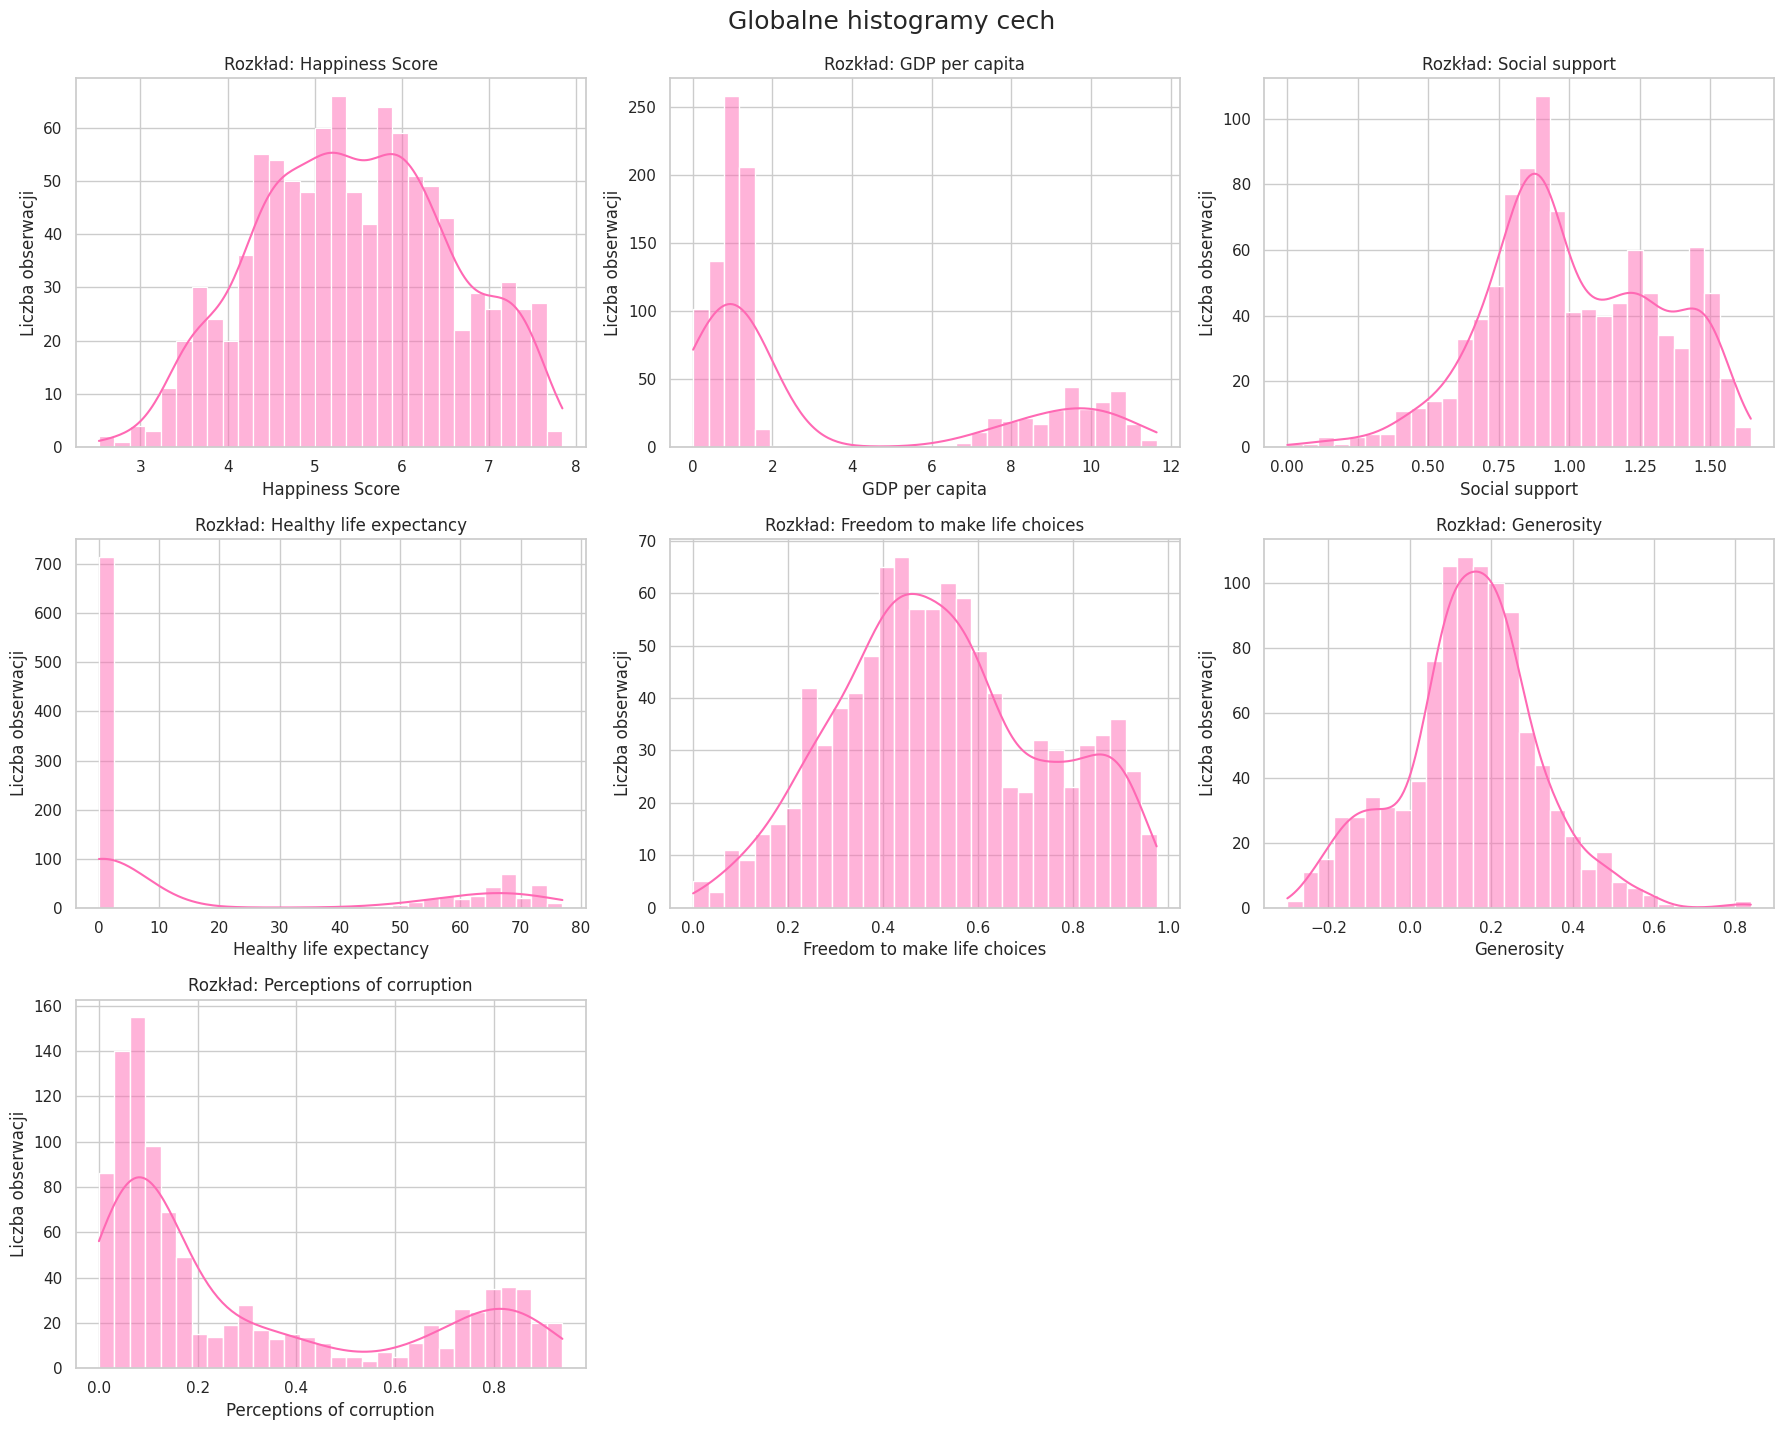

In [ ]:

plt.figure(figsize=(18, 14))

for i, cecha in enumerate(cechy, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[cecha], kde=True, bins=30, color="#FF69B4")
    plt.title(f"Rozkład: {cecha}")
    plt.xlabel(cecha)
    plt.ylabel("Liczba obserwacji")
    plt.tight_layout()

plt.suptitle("Globalne histogramy cech", fontsize=18, y=1.02)
plt.show()


In [ ]:
df = df_final_no2022.copy()

### Histogramy cech według lat

Dokonaliśmy wizualizacji opisując rozkład, opis, wnioski dla wykresu:
- Happiness Score
- GDP per capita
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perceptions of corruption


W ramach utworzenia niniejszejszych histogramów podjeliśmy następujące kroki:
- Usunięcie kolumny 'Happiness Rank' z danych
- Przekształcenie danych na długi format
- Utworzenie wykresów typu FacetGrid
- Wnioski wynikające z histogramów

Poniżej znajduję sie kod opisujący każdy z kroków.

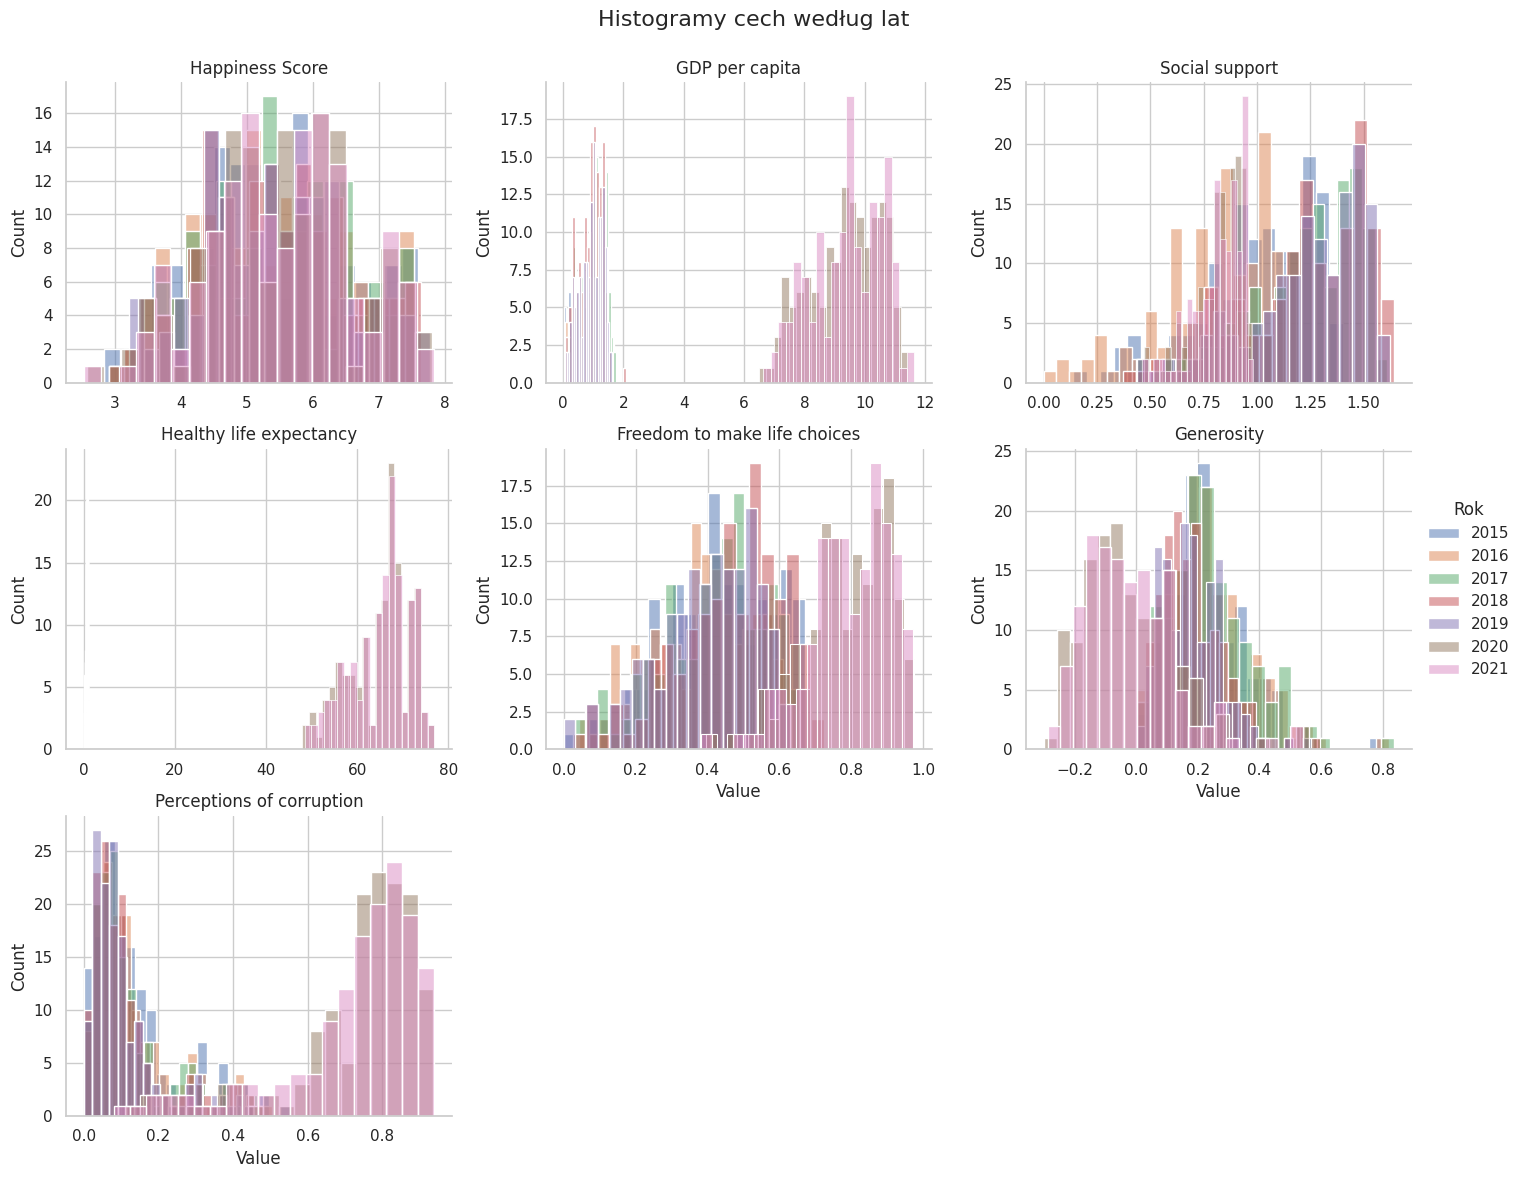

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
columns_to_plot = [col for col in numeric_columns if col != 'Year']
# Usunięcie kolumny 'Happiness Rank' z danych
columns_to_plot_filtered = [col for col in columns_to_plot if col != 'Happiness Rank']

# Przekształcenie danych na długi format
df_long_filtered = df.melt(id_vars=["Year"], value_vars=columns_to_plot_filtered, var_name="Feature", value_name="Value")

# Utworzenie wykresów typu FacetGrid
g = sns.FacetGrid(df_long_filtered, col="Feature", col_wrap=3, hue="Year", sharex=False, sharey=False, height=4, aspect=1.2)
g.map(sns.histplot, "Value", bins=20, alpha=0.5)
g.add_legend(title="Rok")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Histogramy cech według lat", fontsize=16)
plt.show()

### Happiness Score
- ``Rozkład``: Lekko lewoskośny
- ``Opis wykresu``: Większość krajów ma wyniki w zakresie 4–6, niewiele krajów jest ekstremalnie szczęśliwych (powyżej 7) lub bardzo nieszczęśliwych (poniżej 3).
- ``Wnioski``: Dane są stosunkowo równomiernie rozłożone ze skłonnością do środka.



### GDP per capita
- ``Rozkład``: bimodalny - dane są skupione wokół dwóch poziomów szczęścia
- ``Opis wykresu``: Większość krajów ma niski dochód na osobę, a tylko kilka ma bardzo wysokie wartości (np. Luksemburg, Norwegia).
- ``Wnioski``: Transformacja logarytmiczna może być pomocna, np. w regresji.


Sprawdźmy zakres wartości GDP per capita dla każdego roku osobno

In [ ]:
gdp_by_year = df.groupby("Year")["GDP per capita"].agg(["min", "max", "median", "mean", "std", "count"])
gdp_by_year

min        max    median      mean       std  count
Year                                                          
2015  0.015300   1.563910  0.920490  0.859113  0.391672    143
2016  0.068310   1.697520  1.032345  0.971170  0.396384    142
2017  0.091623   1.741944  1.074988  1.003159  0.401965    143
2018  0.076000   2.096000  0.970000  0.909083  0.376490    144
2019  0.046000   1.609000  0.986000  0.928986  0.375981    144
2020  6.492642  11.450681  9.505480  9.354137  1.162669    144
2021  6.635000  11.647000  9.573000  9.445937  1.158824    144

Wniosek: Radykalna zmiana skali w 2020 i 2021

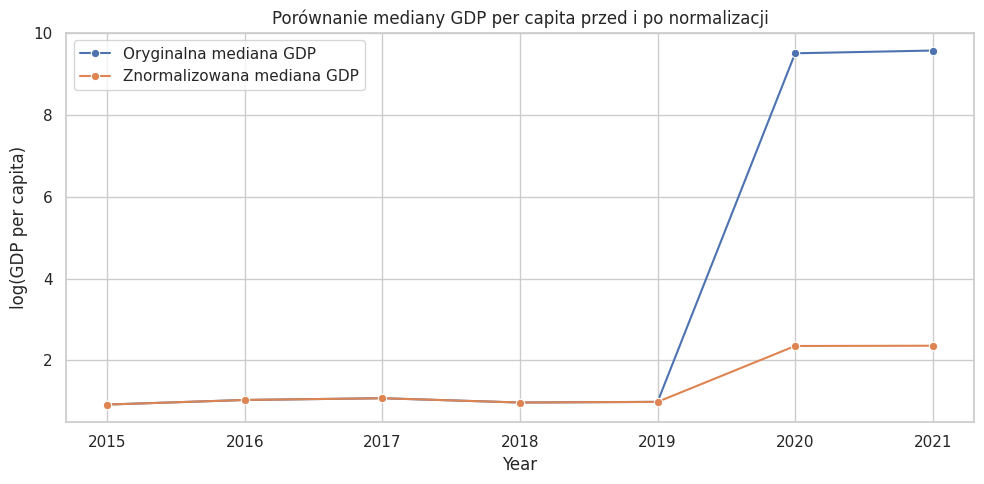

In [ ]:
# Utwórz nową kolumnę GDP_log_consistent w df_final_no2022 z uwzględnieniem różnic w latach
df["GDP_log_consistent"] = df.apply(
    lambda row: np.log1p(row["GDP per capita"]) if row["Year"] >= 2020 else row["GDP per capita"],
    axis=1
)

# Obliczamy medianę dla każdej wersji GDP w podziale na rok
gdp_medians = df.groupby("Year")[["GDP per capita", "GDP_log_consistent"]].median().reset_index()

# Wykres porównawczy mediany w czasie
plt.figure(figsize=(10, 5))
sns.lineplot(data=gdp_medians, x="Year", y="GDP per capita", marker="o", label="Oryginalna mediana GDP")
sns.lineplot(data=gdp_medians, x="Year", y="GDP_log_consistent", marker="o", label="Znormalizowana mediana GDP")
plt.title("Porównanie mediany GDP per capita przed i po normalizacji")
plt.ylabel("log(GDP per capita)")
plt.grid(True)
plt.tight_layout()
plt.show()

Podjeliśmy decyzję o usunięciu oryginalnej kolumny i przypisanie wersji logarytmicznej pod nazwą 'GDP per capita'

In [ ]:

if "GDP_log_consistent" in df.columns:
    df = df.drop(columns=["GDP per capita"], errors="ignore")
    df["GDP per capita"] = df["GDP_log_consistent"]
    df = df.drop(columns=["GDP_log_consistent"])
# Potwierdzenie zmian
df.columns


Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'GDP per capita'],
      dtype='object')

In [ ]:
df

Year      Country                 Region  Happiness Rank  \
0     2015  Switzerland         Western Europe             1.0   
1     2015      Iceland         Western Europe             2.0   
2     2015      Denmark         Western Europe             3.0   
3     2015       Norway         Western Europe             4.0   
4     2015       Canada  North America and ANZ             5.0   
...    ...          ...                    ...             ...   
999   2021      Lesotho     Sub-Saharan Africa           145.0   
1000  2021     Botswana     Sub-Saharan Africa           146.0   
1001  2021       Rwanda     Sub-Saharan Africa           147.0   
1002  2021     Zimbabwe     Sub-Saharan Africa           148.0   
1003  2021  Afghanistan             South Asia           149.0   

      Happiness Score  Social support  Healthy life expectancy  \
0               7.587         1.34951                  0.94143   
1               7.561         1.40223                  0.94784   
2               7.527         1.36058                  0.87464   
3               7.522         1.33095                  0.88521   
4               7.427         1.32261                  0.90563   
...               ...             ...                      ...   
999             3.512         0.78700                 48.70000   
1000            3.467         0.78400                 59.26900   
1001            3.415         0.55200                 61.40000   
1002            3.145         0.75000                 56.20100   
1003            2.523         0.46300                 52.49300   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
0                          0.66557     0.29678                    0.41978   
1                          0.62877     0.43630                    0.14145   
2                          0.64938     0.34139                    0.48357   
3                          0.66973     0.34699                    0.36503   
4                          0.63297     0.45811                    0.32957   
...                            ...         ...                        ...   
999                        0.71500    -0.13100                    0.91500   
1000                       0.82400    -0.24600                    0.80100   
1001                       0.89700     0.06100                    0.16700   
1002                       0.67700    -0.04700                    0.82100   
1003                       0.38200    -0.10200                    0.92400   

      GDP per capita  
0           1.396510  
1           1.302320  
2           1.325480  
3           1.459000  
4           1.326290  
...              ...  
999         2.188968  
1000        2.377878  
1001        2.160561  
1002        2.190871  
1003        2.162748  

[1004 rows x 11 columns]

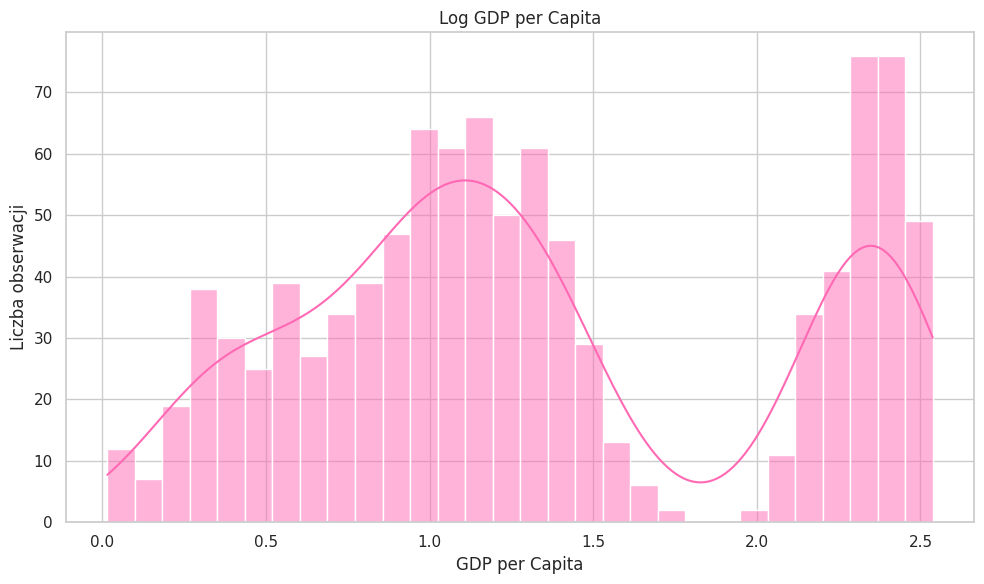

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df["GDP per capita"], kde=True, bins=30, color="#FF69B4")
plt.title("Log GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Liczba obserwacji")
plt.tight_layout()
plt.show()

Na postawie powyższego wykresu Widać wciąż dwa główne skupiska:
- jedno przy wartościach około 0.3–1.3 (prawdopodobnie kraje o niskim lub średnim dochodzie),
- drugie przy około 2.1–2.5 (kraje wysokodochodowe)
- przerwa między nimi (1.5–2.0), gdzie występuje niższa liczba obserwacji.


### Social support
- ``Rozkład``: Dość symetryczny, lekko lewoskośny
- ``Opis``: Większość wartości oscyluje w granicach 0.7–0.9, ale są wyjątki z bardzo niskim wsparciem społecznym.
- ``Wnioski``: Dobrze zdefiniowana cecha z kilkoma ekstremami.

### Healthy life expectancy
- ``Rozkład``: Bimodalny: Wyraźny, nienaturalny pik przy wartości bliskiej 0.
- ``Opis``: To najprawdopodobniej brakujące dane zakodowane jako 0, a nie rzeczywiste wartości. Wartości 0 należy uznać za braki danych (NaN).
Reszta wartości mieści się głównie w zakresie 60–75 lat.

Poniżej dalsza analiza wykresu.


In [ ]:
df["Healthy life expectancy"].describe()

count    1004.000000
mean       19.090196
std        29.339900
min         0.000000
25%         0.582855
50%         0.790780
75%        56.097485
max        76.953000
Name: Healthy life expectancy, dtype: float64

In [ ]:
# Obserwacje poniżej 1
below_1 = df[df["Healthy life expectancy"] < 1]
num_below_1 = below_1.shape[0]
countries_below_1 = below_1[["Country", "Year", "Region", "Healthy life expectancy"]]

# Oczyszczenie danych (wartości większe lub równe 1)
df_cleaned = df[df["Healthy life expectancy"] >= 1]

# Kraje z najniższą i najwyższą wartością po oczyszczeniu
min_hle = df_cleaned.nsmallest(5, "Healthy life expectancy")[["Country", "Year", "Region", "Healthy life expectancy"]]
max_hle = df_cleaned.nlargest(5, "Healthy life expectancy")[["Country", "Year", "Region", "Healthy life expectancy"]]


In [ ]:
min_hle

Country  Year          Region  Healthy life expectancy
460   Singapore  2018  Southeast Asia                  1.00800
578      Sweden  2019  Western Europe                  1.00900
585  Luxembourg  2019  Western Europe                  1.01200
66    Hong Kong  2015       East Asia                  1.01328
581     Austria  2019  Western Europe                  1.01600

In [ ]:
max_hle

Country  Year          Region  Healthy life expectancy
891  Singapore  2021  Southeast Asia                76.953000
935  Hong Kong  2021       East Asia                76.820000
746  Singapore  2020  Southeast Asia                76.804581
791  Hong Kong  2020       East Asia                76.771706
915      Japan  2021       East Asia                75.100000

``Wnioski`` po dalszym zapoznaniu się z danymi:
- Zuważono, że rekordy z wartościami ok. 1 roku u krajów rozwiniętych (jak np. Singapur) są niespójne z innymi latami dla tych samych krajów, co sugeruje błąd w danych (np. tylko fragment oryginalnej liczby został zaimportowany).
- Dobrym rozwiązaniem byłoby usunąć lub uzupełnić dane < 30 lat, jako że oczekiwana długość życia w zdrowiu w rzeczywistości nigdzie na świecie nie wynosi 1 rok.

Poniżej kod opisujący czyszczenie danych, weryfikacja skali usuniętych danych, sprawdzenie próbki danych.

In [ ]:
# Automatyczne czyszczenie danych: wartości < 30 traktujemy jako brak danych (NaN)
df_cleaned_threshold = df.copy()
df_cleaned_threshold.loc[df_cleaned_threshold["Healthy life expectancy"] < 30, "Healthy life expectancy"] = pd.NA

# Sprawdzenie ile danych zostało usuniętych
num_cleaned = df.shape[0] - df_cleaned_threshold["Healthy life expectancy"].count()

# Wyświetlenie kilku przykładów po czyszczeniu
sample_after_cleaning = df_cleaned_threshold[df_cleaned_threshold["Healthy life expectancy"].isna()].head()

num_cleaned, sample_after_cleaning


(np.int64(716),
    Year      Country                 Region  Happiness Rank  Happiness Score  \
 0  2015  Switzerland         Western Europe             1.0            7.587   
 1  2015      Iceland         Western Europe             2.0            7.561   
 2  2015      Denmark         Western Europe             3.0            7.527   
 3  2015       Norway         Western Europe             4.0            7.522   
 4  2015       Canada  North America and ANZ             5.0            7.427   
 
    Social support  Healthy life expectancy  Freedom to make life choices  \
 0         1.34951                      NaN                       0.66557   
 1         1.40223                      NaN                       0.62877   
 2         1.36058                      NaN                       0.64938   
 3         1.33095                      NaN                       0.66973   
 4         1.32261                      NaN                       0.63297   
 
    Generosity  Perceptions of c

Wizualizacja za pośrednitwem histogramu po czyszczeniu (bez wartości < 30)

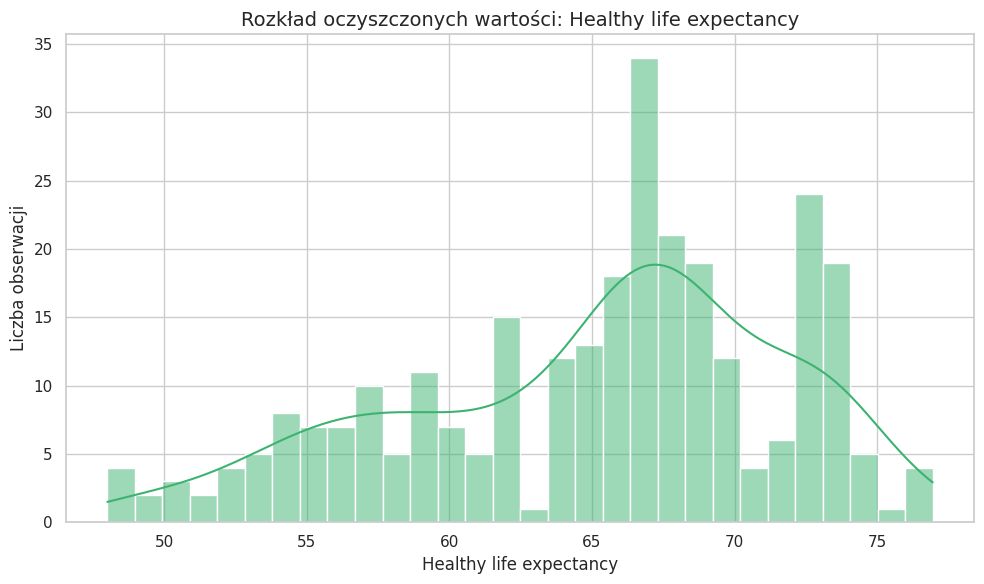

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_threshold["Healthy life expectancy"].dropna(), kde=True, bins=30, color="mediumseagreen")
plt.title("Rozkład oczyszczonych wartości: Healthy life expectancy", fontsize=14)
plt.xlabel("Healthy life expectancy")
plt.ylabel("Liczba obserwacji")
plt.tight_layout()
plt.show()


Intepretacja do powyższego wykresu:

- Zakres wartości mieści się teraz w realistycznym przedziale ok. 53–77 lat.
- Rozkład ma kształt lekko lewoskośny – więcej krajów znajduje się w wyższych przedziałach oczekiwanej długości życia w zdrowiu.
- Szczyt rozkładu występuje w okolicach 72–75 lat, co odpowiada wysokiemu poziomowi zdrowia publicznego w wielu krajach rozwiniętych.

Poniżej akutalizacja cechy w naszej ramce:

In [ ]:
df_cleaned_threshold
df = df_cleaned_threshold.copy()

In [ ]:
df

Year      Country                 Region  Happiness Rank  \
0     2015  Switzerland         Western Europe             1.0   
1     2015      Iceland         Western Europe             2.0   
2     2015      Denmark         Western Europe             3.0   
3     2015       Norway         Western Europe             4.0   
4     2015       Canada  North America and ANZ             5.0   
...    ...          ...                    ...             ...   
999   2021      Lesotho     Sub-Saharan Africa           145.0   
1000  2021     Botswana     Sub-Saharan Africa           146.0   
1001  2021       Rwanda     Sub-Saharan Africa           147.0   
1002  2021     Zimbabwe     Sub-Saharan Africa           148.0   
1003  2021  Afghanistan             South Asia           149.0   

      Happiness Score  Social support  Healthy life expectancy  \
0               7.587         1.34951                      NaN   
1               7.561         1.40223                      NaN   
2               7.527         1.36058                      NaN   
3               7.522         1.33095                      NaN   
4               7.427         1.32261                      NaN   
...               ...             ...                      ...   
999             3.512         0.78700                   48.700   
1000            3.467         0.78400                   59.269   
1001            3.415         0.55200                   61.400   
1002            3.145         0.75000                   56.201   
1003            2.523         0.46300                   52.493   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
0                          0.66557     0.29678                    0.41978   
1                          0.62877     0.43630                    0.14145   
2                          0.64938     0.34139                    0.48357   
3                          0.66973     0.34699                    0.36503   
4                          0.63297     0.45811                    0.32957   
...                            ...         ...                        ...   
999                        0.71500    -0.13100                    0.91500   
1000                       0.82400    -0.24600                    0.80100   
1001                       0.89700     0.06100                    0.16700   
1002                       0.67700    -0.04700                    0.82100   
1003                       0.38200    -0.10200                    0.92400   

      GDP per capita  
0           1.396510  
1           1.302320  
2           1.325480  
3           1.459000  
4           1.326290  
...              ...  
999         2.188968  
1000        2.377878  
1001        2.160561  
1002        2.190871  
1003        2.162748  

[1004 rows x 11 columns]


### Freedom to make life choices
- ``Rozkład``: Lekko prawoskośny
- ``Opis``: Większość krajów ma umiarkowaną wolność, ale kilka krajów (zwłaszcza skandynawskich) ma bardzo wysokie wartości.
- ``Wnioski``: Może być powiązany z kulturą polityczną i poziomem demokracji.

### Generosity
- ``Rozkład``: Silnie prawoskośny
- ``Opis``: Większość krajów ma wartości bliskie 0 lub nawet ujemne, a tylko kilka ma bardzo wysoką hojność (np. Myanmar, Tajlandia).
- ``Wnioski``: Ta cecha jest bardzo nierównomierna, trudna do modelowania — może wymagać np. winsoryzacji, czyli przycięcia skrajnych wartości:

Poniżej znajduję się kod opisujący podstawowe statystyki zmiennej ``Generosity``.

In [ ]:
generosity_stats = df_final["Generosity"].describe(percentiles=[.01, .25, .5, .75, .99])
generosity_stats

count    1004.000000
mean        0.147727
std         0.168196
min        -0.300907
1%         -0.235846
25%         0.058307
50%         0.153000
75%         0.247251
99%         0.565125
max         0.838075
Name: Generosity, dtype: float64

Ponżej kod przedstawiający winosoryzacje dla zmiennej Generosity.

Winsoryzacja jest technika statystyczna, która bazuje na ograniczaniu wartości odstających w danym zbiorze danych w celu zminimalizowazacji ich wpływu na wyniki naszej analizy.

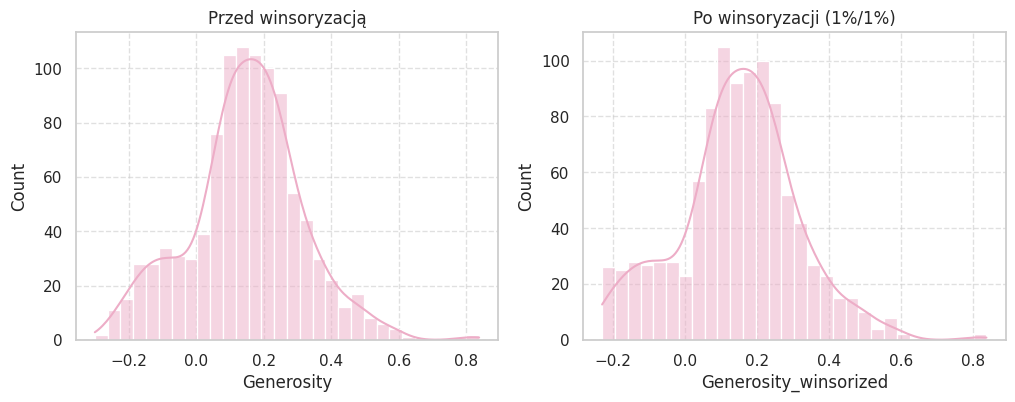

In [ ]:

# Winsoryzacja: przycinamy 1% wartości z lewej i prawej strony
generosity_winsorized = winsorize(df_final["Generosity"], limits=[0.01, 0.01])

# Dodajemy nową kolumne do ramki danych
df_final["Generosity_winsorized"] = generosity_winsorized

# Dodajemy wizualizację przed i po winsoryzacji
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_final["Generosity"], bins=30, kde=True, color="#EDADC7", ax=axes[0])
axes[0].set_title("Przed winsoryzacją")
axes[0].grid(True, linestyle='--', alpha=0.6)

sns.histplot(df_final["Generosity_winsorized"], bins=30, kde=True, color="#EDADC7", ax=axes[1])
axes[1].set_title("Po winsoryzacji (1%/1%)")
axes[1].grid(True, linestyle='--', alpha=0.6)



### Histogramy Cech według lat - Wykres: Perceptions of corruption
- ``Rozkład``: Silnie prawoskośny
- ``Opis``: Większość krajów ocenia korupcję jako wysoką (niskie wartości), tylko nieliczne uznawane są za transparentne (wysokie wartości).
- ``Wnioski``: Silna asymetria, co może wpływać na analizę korelacyjną i regresję.

---

## Wartości odstajace

Zauwazyliśmy, że istnieją wartości, które znacząco różnią się od pozostałych dla wszystkich zdefiniowanych cech:
- ``Hapiness Rank``
- ``Hapiness Score``
- ``GDP per capita``
- ``Social Suppor``
- ``Healthy life support``
- ``Freedom to make life choices``
- ``Generosity``
- ``Perceptions of corruptions``
- ``Generosity_winzorised``


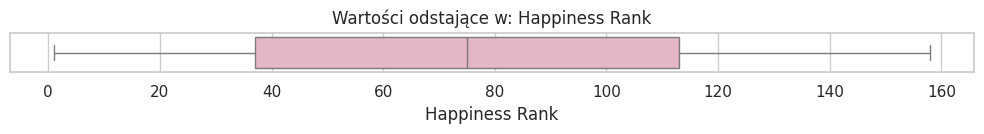

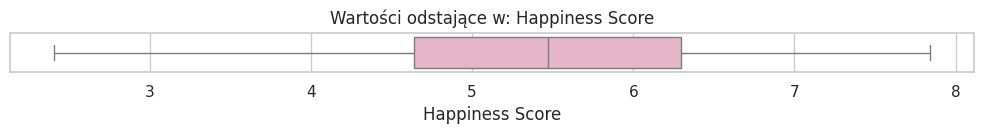

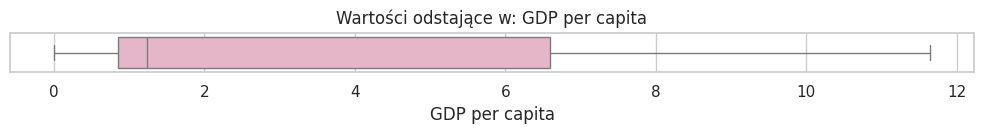

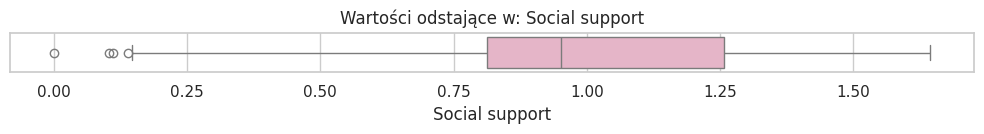

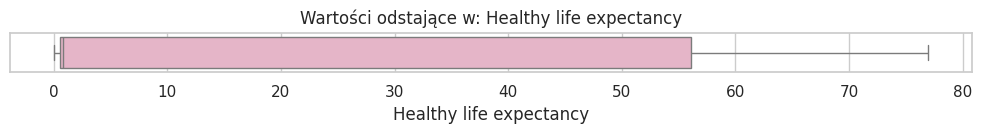

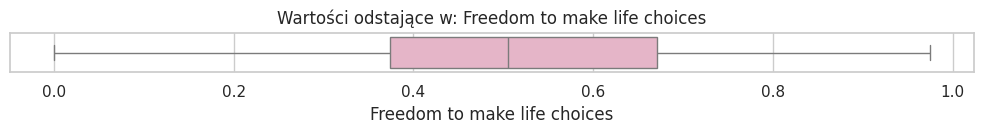

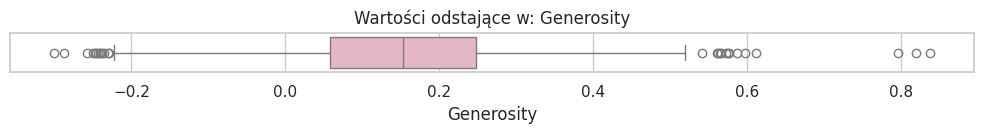

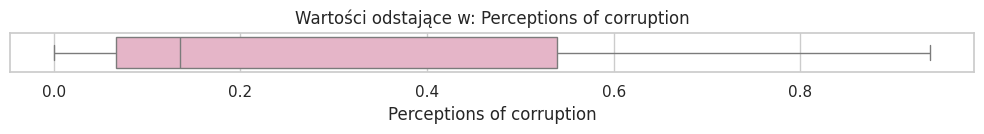

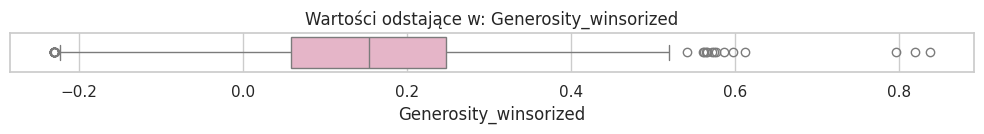

In [ ]:
numeric_columns = df_final.select_dtypes(include='number').columns.drop('Year') # Outliery

for col in numeric_columns: # Tworzenie wykresów boxplot (bez 'Year')
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(data=df_final, x=col, color="#EDADC7")
    plt.title(f'Wartości odstające w: {col}')
    plt.tight_layout()
    plt.show()

Cechy, takie jak Freedom czy Healthy life expectancy, zawierają niewielką liczbę outlierów, jednak nie mają one istotnego wpływu na rozkład – mogą pozostać w danych bez dodatkowych transformacji.

Przyjrzyjmy się tzlko cechom, z największą liczbą outlierów:

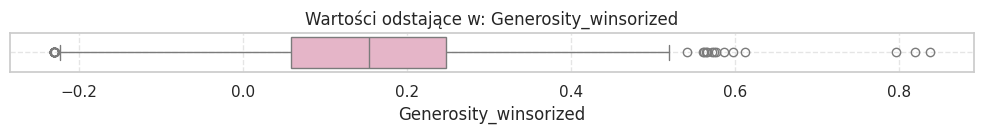

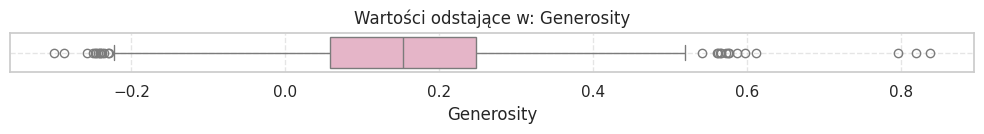

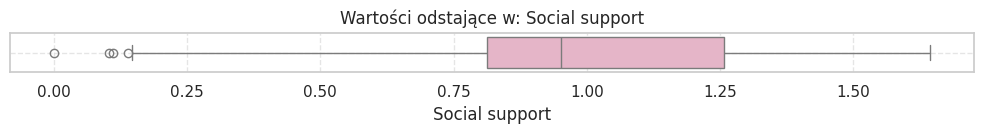

In [ ]:
#  Zdefiniowanie danych z analizy outlierów
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((series < lower_bound) | (series > upper_bound)).sum()
    return outliers, lower_bound, upper_bound

# Potwierdzenie, że funkcja została załadowana
"Funkcja detect_outliers_iqr zdefiniowana."


outlier_summary = []

for col in numeric_columns:
    series = df_final[col].dropna()
    count, low, high = detect_outliers_iqr(series)
    outlier_summary.append({
        "Cecha": col,
        "Liczba outlierów": count,
        "Dół (min bezpieczny)": round(low, 3),
        "Góra (max bezpieczny)": round(high, 3),
        "Procent danych jako outliery": round(100 * count / len(series), 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values(by="Procent danych jako outliery", ascending=False)

# Teraz wybieramy kolumny z outlierami
columns_with_outliers = outlier_df[outlier_df["Liczba outlierów"] > 0]["Cecha"].tolist()

# Tworzenie wykresów boxplot
for col in columns_with_outliers:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(data=df_final, x=col, color="#EDADC7")
    plt.title(f'Wartości odstające w: {col}')
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


Wnioski z powyższych wykresów:

- Generosity to zmienna o największej liczbie wartości odstających (ponad 2,6% danych). Wartości te silnie odstają od reszty i zaburzają analizę – dlatego można zastosować winsoryzację (1%/1%).

- Perceptions of corruption również wykazuje znaczną prawoskośność i obecność outlierów, by uzyskać zwartą dystrybucję. Nadal jest dużo odstępst w szczególności po stronie wysokich wartości.


---

---

## Analiza opisowa

**W tym rozdziale zbadamy następujące zagadnienia**
- Indeks szczęścia na mapie świata
- Jego rozkład w regionach
- Korelacje poszczególnych cech
- To 10 krajów z największym wzrostem i spadkiem indkesu szczęścia
- Które cechy różnicują najbardziej i najmniej szczęśliwe kraje
- Trend zmian indeksu szczęścia
- Zmiana średniego poziomu szczęścia w regionach (2019 → 2021) - czy widać wpływ pandemii?

---

### Indeks szczęścia na mapie świata


In [ ]:
# 8) Mapa świata (choropleth) – średni poziom szczęścia

mean_scores = (
    df.groupby("Country")["Happiness Score"]
      .mean()
      .reset_index()
)

fig = px.choropleth(
    mean_scores,
    locations="Country",
    locationmode="country names",
    color="Happiness Score",
    color_continuous_scale="Pinkyl",
    title="Średni (2015‑2021) Happiness Score – mapa świata"
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


Najszczęśliwsze obszary to Europa Północna, Ameryka Północna i Oceania; najniższe wyniki koncentrują się w Afryce Subsaharyjskiej i w kilku państwach Azji Południowej.
Jest to ciekawe biorąc pod uwagę, że na liście państ z najwyższym happiness score (ukazane na jednym z wcześniejszych wykresów) domunują pńastwa z Afryki oraz krajów rozwijających się.

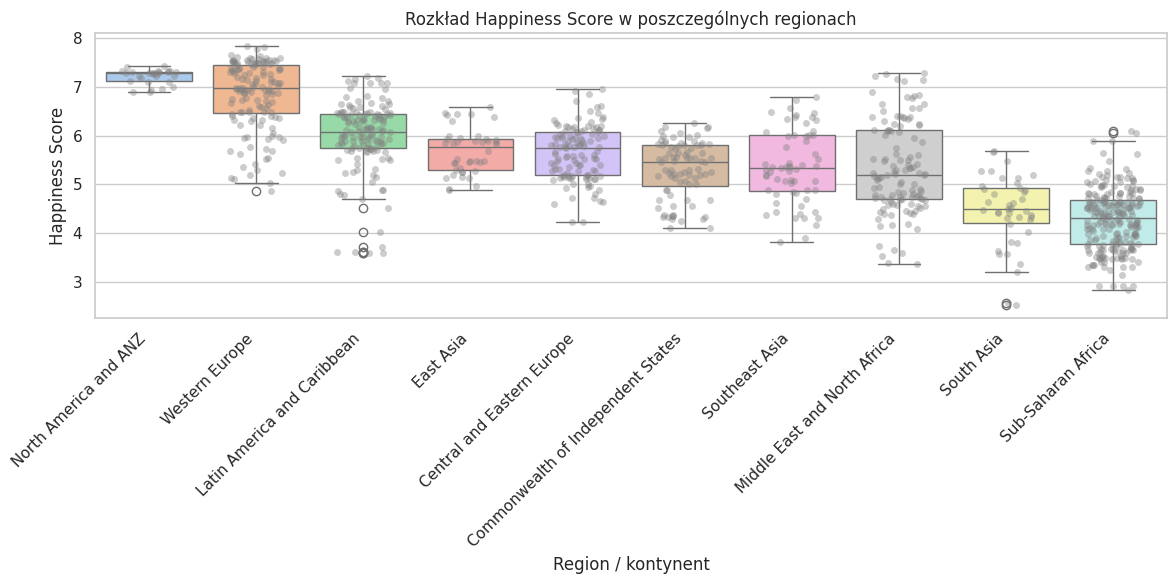

In [ ]:
# 6) Kolejność regionów wg mediany Happiness Score (żeby łatwiej porównać)
median_by_region = (
    df.groupby("Region")["Happiness Score"]
      .median()
      .sort_values(ascending=False)
)
ordered_regions = median_by_region.index.tolist()

# (2) Boxplot + punkty dla każdego kraju
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="Region",
    y="Happiness Score",
    order=ordered_regions,
    palette="pastel"
)
sns.stripplot(
    data=df,
    x="Region",
    y="Happiness Score",
    order=ordered_regions,
    color="gray",
    alpha=0.4,
    jitter=0.25
)

plt.title("Rozkład Happiness Score w poszczególnych regionach")
plt.xlabel("Region / kontynent")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

``Wnioski``:
- Najwyższe mediany mają zazwyczaj regiony Europy Zachodniej i Ameryki Północnej, co potwierdza, że kraje o wysokim PKB, dobrych systemach opieki społecznej i stabilnych instytucjach osiągają najwyższy poziom szczęścia.

- Największa rozpiętość (długie „pudełka” i wąsy) występuje w Azji oraz Ameryce Łacińskiej, co wskazuje na znaczne wewnętrzne zróżnicowanie dobrostanu – obok bardzo szczęśliwych państw (np. Singapur, Kostaryka) istnieją kraje o dużo niższym wyniku.

- Regiony Afryki Subsaharyjskiej i Azji Południowej charakteryzują się najniższą medianą i relatywnie wąskim rozkładem – większość państw w tych regionach osiąga podobnie niskie wyniki, co sugeruje wspólne wyzwania rozwojowe (bieda, konflikty, ograniczony dostęp do opieki zdrowotnej).

- Outliers – punkty skrajne ujawniają wyjątkowe przypadki: np. niektóre kraje europejskie nadal górują zdecydowanie nad medianą, zaś kilka państw w bogatszych regionach (np. Europa Południowa) wypada poniżej typowego poziomu swoich sąsiadów, co podkreśla znaczenie czynników kulturowych i politycznych oprócz czysto ekonomicznych.

---

### Macierz korelacji

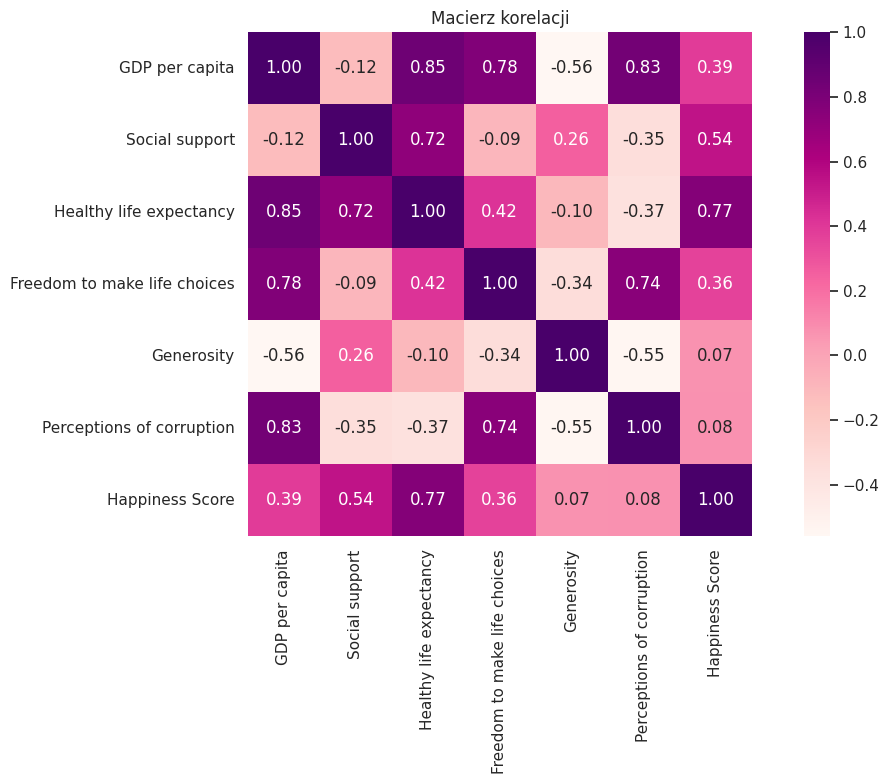

In [ ]:
# Wybór tylko kolumn do analizy korelacji
cols_corr = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Happiness Score']


# Obliczenie macierzy korelacji
correlation_matrix = df[cols_corr].corr()

# Wizualizacja
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdPu", square=True)
plt.title("Macierz korelacji")
plt.tight_layout()
plt.show()



Na postawie powyższego wykresy wynika, że poziom szczęścia jest silnie skorelowany z:
- Social support (0.54)
- GDP per capita (0.39)
- Healthy life expectancy (0.77)

a najmniej z Perceptions of corruption (0.08) i Generosity (0.07)

---

### Top 10 wzrostów i spadków Happiness Score

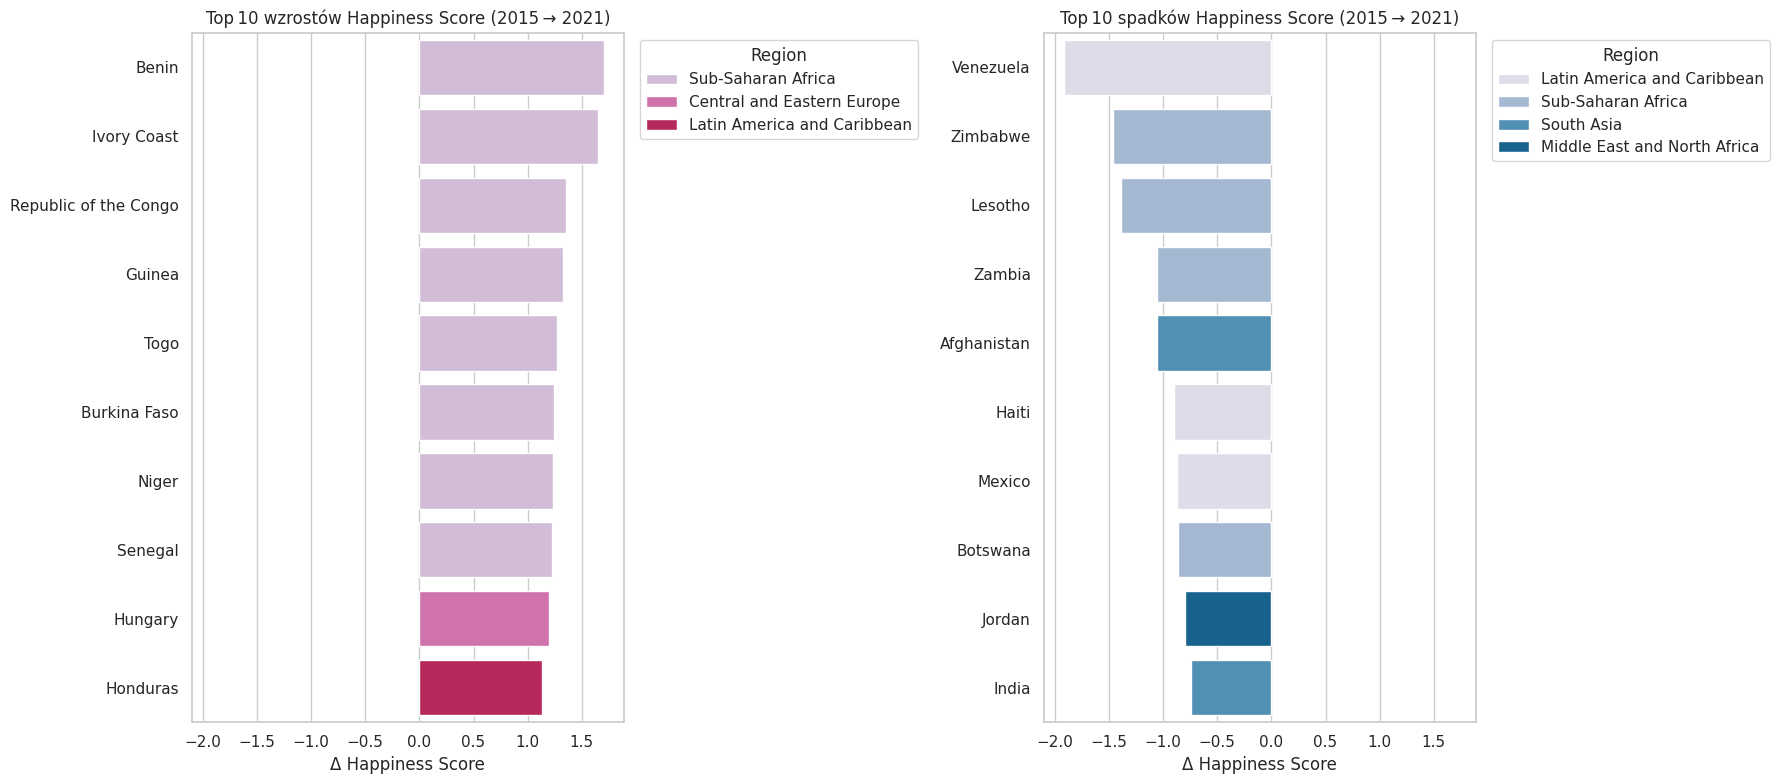

In [ ]:
# Obliczenie zakresu lat
first_year = df["Year"].min()
last_year = df["Year"].max()

# Pivot i obliczenie zmiany
pivot = (
    df.pivot(index="Country", columns="Year", values="Happiness Score")
      .dropna(subset=[first_year, last_year])
)
pivot["Delta"] = pivot[last_year] - pivot[first_year]

# Top 10 wzrostów i spadków
top10_inc = pivot.sort_values("Delta", ascending=False).head(10).reset_index()
top10_dec = pivot.sort_values("Delta", ascending=True).head(10).reset_index()

# Dołączenie regionu
region_df = df[["Country", "Region"]].drop_duplicates()
top10_inc = top10_inc.merge(region_df, on="Country", how="left")
top10_dec = top10_dec.merge(region_df, on="Country", how="left")

# Ustawienia stylu
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True)

# Wzrost
sns.barplot(
    data=top10_inc,
    y="Country",
    x="Delta",
    hue="Region",
    dodge=False,
    palette="PuRd",
    ax=axes[0]
)
axes[0].set_title(f"Top 10 wzrostów Happiness Score ({first_year} → {last_year})")
axes[0].set_xlabel("Δ Happiness Score")
axes[0].set_ylabel("")
axes[0].legend(title="Region", bbox_to_anchor=(1.02, 1), loc="upper left")

# Spadek
sns.barplot(
    data=top10_dec,
    y="Country",
    x="Delta",
    hue="Region",
    dodge=False,
    palette="PuBu",
    ax=axes[1]
)
axes[1].set_title(f"Top 10 spadków Happiness Score ({first_year} → {last_year})")
axes[1].set_xlabel("Δ Happiness Score")
axes[1].set_ylabel("")
axes[1].legend(title="Region", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Top 10 krajów z największym wzrostem Happiness Score (2015 → 2021)**

- Dominują kraje z Afryki Subsaharyjskiej (Benin, Togo, Niger, Guinea itd.).

- Średni wzrost w tej grupie przekracza +1 punkt, co jest bardzo wysokim wynikiem w tego typu indeksach.

- Sugeruje poprawę warunków życia lub stabilizacji społeczno-politycznej w regionie.

**Top 10 krajów z największym spadkiem Happiness Score**

- Największy spadek zaliczyła Wenezuela, a tuż za nią kraje z Afryki, Azji Południowej i Bliskiego Wschodu.

- Spadki sięgają nawet -2 punktów, co wskazuje na głębokie kryzysy społeczne, gospodarcze lub polityczne.

- Wśród krajów takich jak Haiti, Afganistan czy Zimbabwe można podejrzewać wpływ niestabilności, konfliktów lub kryzysów ekonomicznych.


---

### Które cechy różnicują najbardziej i najmniej szczęśliwe kraje

Obliczyliśmy dolny kwartyl (Q25) i górny kwartyl (Q75) poziomu szczęścia i dla każdej z dwóch grup krajów obliczono średnią wartość cech

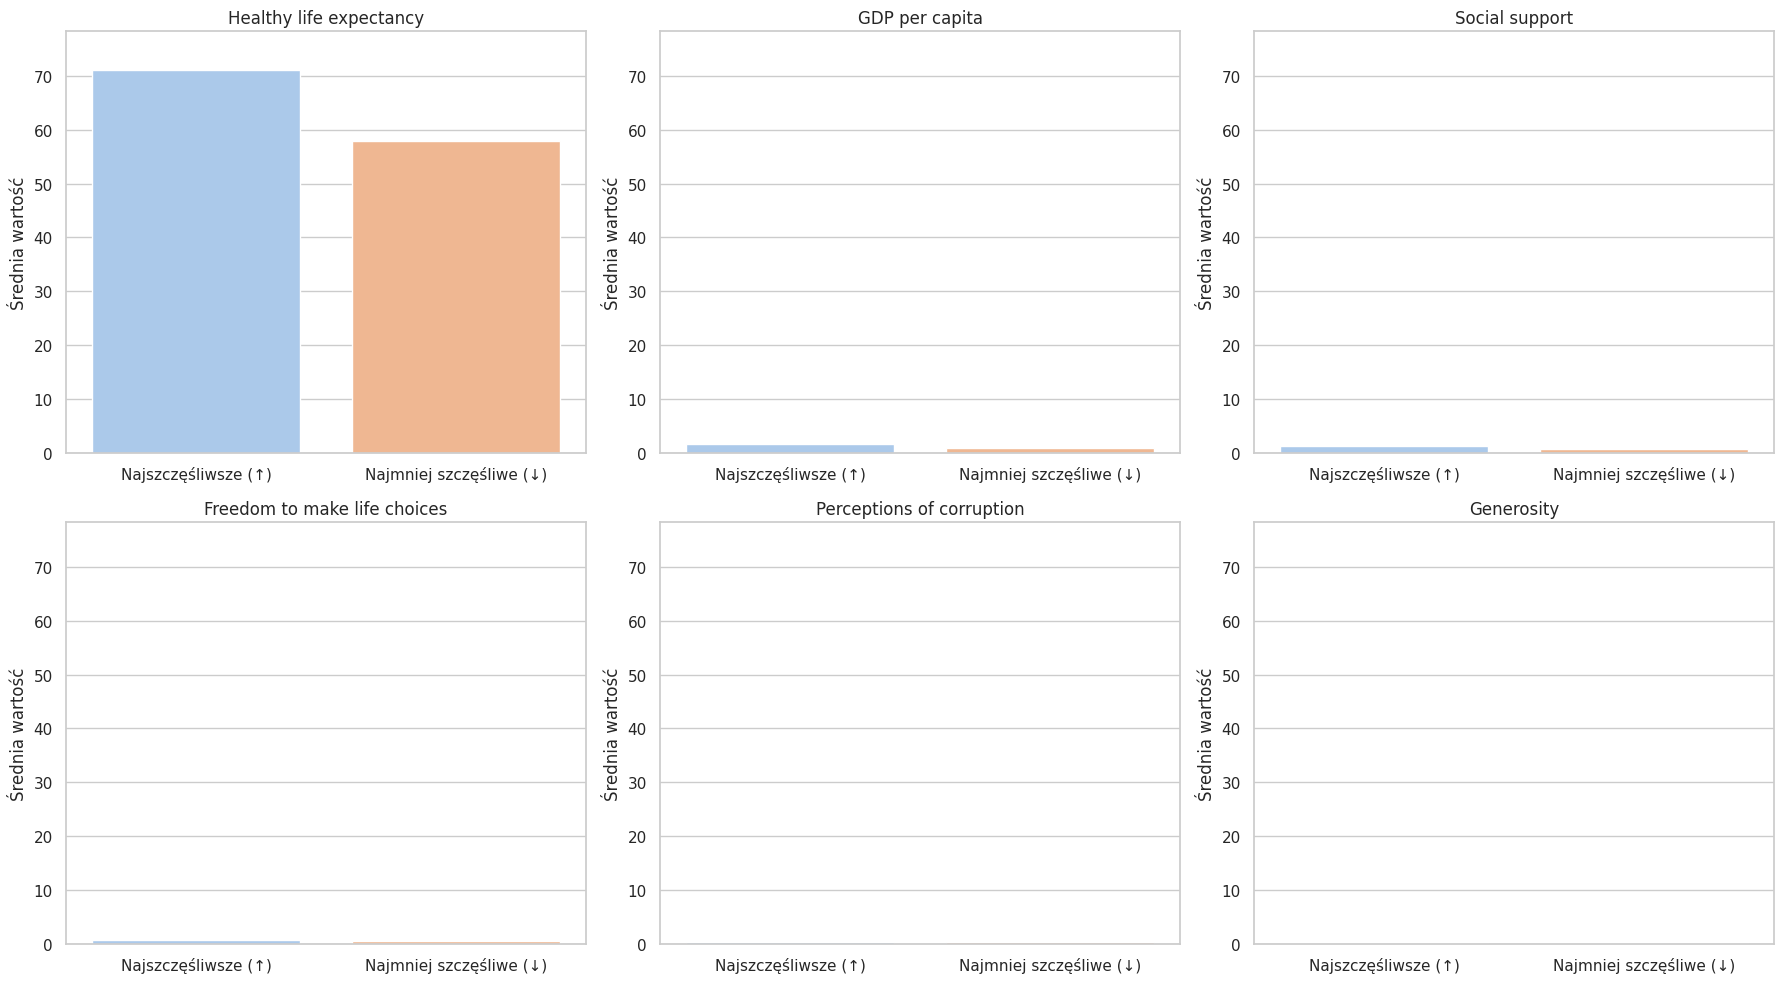

In [ ]:
# Lista predyktorów
PREDICTORS = [
    "Healthy life expectancy",
    "Social support",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
    "GDP per capita"
]

# Oblicz średnie wartości predyktorów w dwóch grupach
q75 = df["Happiness Score"].quantile(0.75)
q25 = df["Happiness Score"].quantile(0.25)

top = df[df["Happiness Score"] >= q75][PREDICTORS].mean()
bot = df[df["Happiness Score"] <= q25][PREDICTORS].mean()

# Różnica dla sortowania
diff = (top - bot).abs()
sorted_features = diff.sort_values(ascending=False).index.tolist()

# Budowa tabeli dla wykresu
config = (
    pd.DataFrame({"Najszczęśliwsze (↑)": top, "Najmniej szczęśliwe (↓)": bot})
    .loc[sorted_features]
    .reset_index()
    .rename(columns={"index": "Czynnik"})
    .melt(id_vars="Czynnik", var_name="Grupa", value_name="Średnia")
)

# Tworzenie osobnych wykresów dla każdej cechy
num_features = config["Czynnik"].nunique()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

palette = sns.color_palette("pastel")

for i, feature in enumerate(sorted_features):
    ax = axes[i]
    sns.barplot(
        data=config[config["Czynnik"] == feature],
        x="Grupa",
        y="Średnia",
        ax=ax,
        palette=palette
    )
    ax.set_title(feature)
    ax.set_ylabel("Średnia wartość")
    ax.set_xlabel("")
    ax.set_ylim(0, config["Średnia"].max() * 1.1)

plt.tight_layout()
plt.show()


In [ ]:
# Tabela z różnicami
summary_table = pd.DataFrame({
    "Top 25%": top,
    "Bottom 25%": bot,
    "Różnica": top - bot
}).sort_values("Różnica", ascending=False)



In [ ]:
summary_table

Top 25%  Bottom 25%    Różnica
Healthy life expectancy       71.162592   57.877521  13.285070
GDP per capita                 1.651035    0.895920   0.755115
Social support                 1.201813    0.796603   0.405209
Freedom to make life choices   0.634697    0.434200   0.200497
Perceptions of corruption      0.323360    0.255625   0.067735
Generosity                     0.197199    0.173188   0.024011

Na podstawie powyższych informacji wynika, że:
- Największe różnice między grupami występują w: oczekiwanej długości życia, PKB per capita i wsparciu społecznym.
    - Healthy life expectancy: różnica aż +13,3 lat
    - GDP per capita: różnica +0,75 jednostki logarytmicznej
    - Social support: różnica +0,41

- Wolność wyboru i niskie postrzeganie korupcji również wyraźnie różnicują kraje.
    - Freedom to make life choices: różnica +0,20
    - Perceptions of corruption: różnica +0,07

- Hojność (Generosity) wydaje się mieć mniejsze znaczenie różnicujące.
    - Generosity: różnica +0,02

---

### Wolność wzboru życiowego w regionach

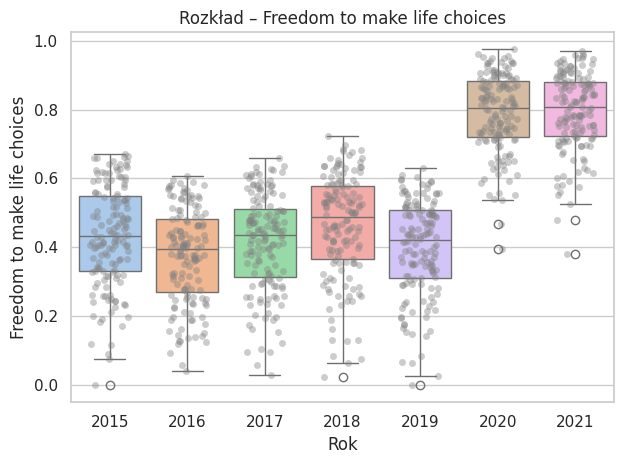

In [ ]:
# 7) Whiskers (boxplot) – Freedom to make life choices

plt.figure()
sns.boxplot(data=df, x="Year", y="Freedom to make life choices", palette="pastel")
sns.stripplot(data=df, x="Year", y="Freedom to make life choices",
              color="gray", alpha=0.4, jitter=0.25)
plt.title("Rozkład – Freedom to make life choices")
plt.xlabel("Rok")
plt.ylabel("Freedom to make life choices")
plt.tight_layout()
plt.subplots_adjust()

plt.show()

``Wnioski``:
Rozrzut wolności wyboru życiowego jest największy w latach o skrajnych zdarzeniach politycznych (np. 2020, pandemia) – część krajów notuje spadki wolności, inne utrzymują wysoki poziom. Zmienność wolności wyboru wzrosła w 2020 r.; niektóre państwa ograniczyły swobody obywatelskie, inne utrzymały status quo.

---

### Trend zmian Happiness Index

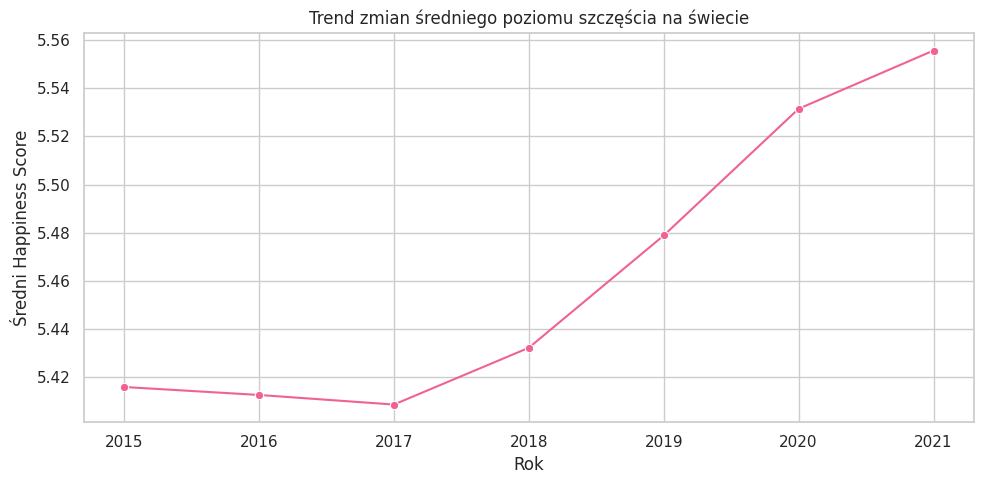

In [ ]:
#  5- Oblicz średni Happiness Score dla każdego roku
mean_by_year = (
    df.groupby("Year")["Happiness Score"]
    .mean()
    .reset_index()
)

# Liniowy wykres trendu
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=mean_by_year,
    x="Year",
    y="Happiness Score",
    marker="o",
    color="#f06292"
)

plt.title("Trend zmian średniego poziomu szczęścia na świecie")
plt.xlabel("Rok")
plt.ylabel("Średni Happiness Score")
plt.tight_layout()
plt.show()


Wniosek: Widoczna jest tendencja wzrostowa postrzegania poziomu szczęścia wraz z upływem lat.
Z drugiej storny, obserwujemy tylko niewielkie zmiany (rzędu setnych punktu) globalnego poziomu szczęścia pomiędzy kolejnymi latami.
Może to wskazywać, że poprawa lub pogorszenie dobrostanu w części krajów jest równoważone przez zmiany o przeciwnym wektorze w innych regionach lub oznaczać rosnące wymagania społeczeństwa i tendencje do zachowawczości w ocenie szczęścia.

### Zmiana średniego poziomu szczęścia w regionach (2019 → 2021) - czy pandemia wpłynełą na poziom szczęścia?

Jak zmieniał się poziom szczęścia w regionach w pierwszych latach pandemii

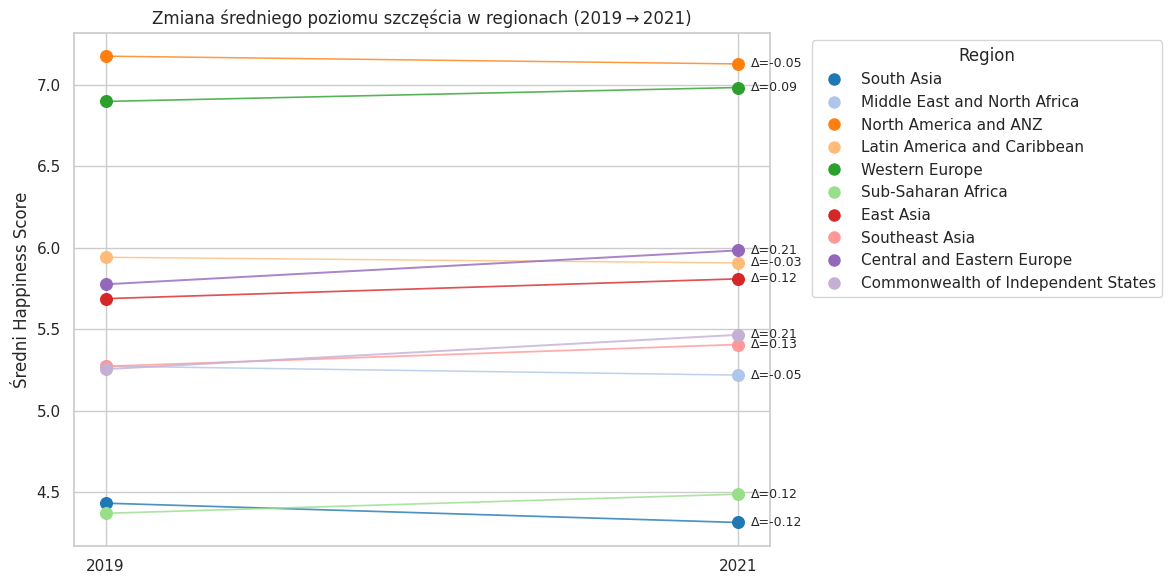

In [ ]:

# Przygotowanie danych
years = [2019, 2021]
df = df_final_no2022[df_final_no2022["Year"].isin(years)]

mean_by_region = (
    df.groupby(["Region", "Year"])["Happiness Score"]
      .mean()
      .unstack()
      .reset_index()
      .rename(columns={2019: "Score_2019", 2021: "Score_2021"})
)

mean_by_region["Delta"] = mean_by_region["Score_2021"] - mean_by_region["Score_2019"]
mean_by_region = mean_by_region.sort_values("Delta")

# Przygotowanie unikalnych, kontrastowych kolorów dla regionów
unique_regions = mean_by_region["Region"].unique()
palette = sns.color_palette("tab20", len(unique_regions))
region_colors = dict(zip(unique_regions, palette))

# Wykres z wartościami Δ
plt.figure(figsize=(12, 6))
for idx, row in mean_by_region.iterrows():
    color = region_colors[row["Region"]]
    plt.plot([0, 1], [row["Score_2019"], row["Score_2021"]],
             color=color, linewidth=1 + abs(row["Delta"]) * 2, alpha=0.8)
    plt.scatter(0, row["Score_2019"], color=color, s=70, zorder=3)
    plt.scatter(1, row["Score_2021"], color=color, s=70, zorder=3)
    plt.text(1.02, row["Score_2021"], f"Δ={row['Delta']:.2f}",
             va="center", ha="left", fontsize=9)

# Oś x
plt.xticks([0, 1], ["2019", "2021"])
plt.xlabel("")
plt.ylabel("Średni Happiness Score")
plt.title("Zmiana średniego poziomu szczęścia w regionach (2019 → 2021)")

# Legenda
handles = [plt.Line2D([0], [0], marker='o', color='w', label=region,
                      markerfacecolor=color, markersize=10)
           for region, color in region_colors.items()]
plt.legend(title="Region", handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Spadek globalnego szczęścia w 2021. nie był równomierny. Regiony z wyższą jakością służby zdrowia i większym wsparciem społecznym ograniczyły negatywny wpływ pandemii, podczas gdy obszary z już niskim poziomem zamożności lub silnymi lockdownami mogły odczuć pandemię bardziej dotkliwie.

**🔺 Największy wzrost poziomu szczęścia:**

- Commonwealth of Independent States oraz Central and Eastern Europe: 0.21

- Southeast Asia: 0.13

- East Asia i Sub-Saharan Africa: 0.12

**🔻 Spadek poziomu szczęścia:**

- South Asia: -0.12




## Wnioski

1. Najszczęśliwsze obszary to Europa Północna, Ameryka Północna i Oceania. Najmniej szczęśliwe kraje koncentrują się w Afryce i Azji. Jednak to w krajach rozwijających się poziom szczęścia notuje najwyższe wzrosty.

2. Najsilniejszy związek ze szczęściem ma długość życia w zdrowiu, wsparcie społeczne i PKB per Capita

3. Trend poziomu szczęścia na świecie jest rosnący, ale bardzo powolny

4. Wpływ pandemii COVID-19 nie był jednoznacznie negatywny. W większości regionów zmiany są niewielkie, a niektóre regiony dnotowały wzrost poziomu szczęścia.
  To sugeruje, że pandemia miała zróżnicowany wpływ regionalny, a czynniki takie jak wsparcie społeczne, stabilność polityczna i reakcja instytucji mogły amortyzować skutki kryzysu w niektórych częściach świata.


**Dane**

  Problematyka wartości odstających i jakości rozkładów
  Podczas eksploracyjnej analizy danych zauważono, że nie wszystkie cechy można traktować jednakowo – zarówno pod względem rozkładu, jak i jakości:

  GDP per capita: dane z lat 2020–2021 pierwotnie nie były logarytmizowane, w przeciwieństwie do wcześniejszych lat. Wyrównano je przez transformację logarytmiczną, co pozwoliło uniknąć zaburzeń w analizie i zapewniło spójność międzylatową.

  Healthy life expectancy: zmienna została znormalizowana, a wartości poniżej 30 lat życia uznano za nielogiczne i zastąpiono NaN. Pozostałe dane miały dość stabilny rozkład, co pozwala na ich dalsze wykorzystanie w modelach.

  Generosity: zmienna o bardzo niestandardowym rozkładzie. Występowały wartości zarówno ujemne, jak i dodatnie znacznie odstające od reszty. Przeprowadzono symulację winsoryzacji (1%/1%), ale nie została ona uwzględniona w głównej analizie. Zmienna ta nadal wymaga ostrożnego traktowania – zarówno ze względu na rozkład, jak i kontekst kulturowy, który może wpływać na dane wskaźniki hojności. Rekomenduje się nie opierać wniosków na tej zmiennej bez wcześniejszej transformacji.

  Perceptions of corruption: Dodatkowo zmienna wykazuje silnie skośny rozkład oraz obecność skrajnych wartości,
  wykonanie winsoryzacji, a następnie ponowne sprawdzenie korelacji i wpływu na Happiness Score.

  Pozostałe zmienne: takie jak Freedom, Social support miały stabilne rozkłady i niewielką liczbę outlierów. Są one dobrze skalibrowane i mogą być użyte w dalszym modelowaniu bez konieczności transformacji.


**Rekomendacje i możliwe rozszerzenia**
1. Dane są gotowe do dalszego modelowania – można przeprowadzić regresję lub użyć modeli uczenia maszynowego w celu przewidywania Happiness Score.

2. Warto kontynuować eksplorację cech o większej zmienności i asymetrii (np.  hojność, korupcja), badając kontekst społeczny i polityczny tych różnic.